## INFO 2950 Final Project
Larrisa Chen (lc949), Michelle Li (myl39), Christina Jin (cej65), Jade Eggleston (jce76)

### Research question
***Do the criteria for a successful Airbnb differ in U.S. regions?***

Where success is defined as:
- high number of bookings combined with high listing rating

and criteria is defined by:
- Price
- Number of Beds
- Number of Baths
- Host ratings
- Number of reviews 
- Private or Public
- Proximity to urban center (most popular neighborhood)
- Neighborhood
- Keywords in names
- Keywords in description
- Host response rate / time
- Room type
- Amenities (binary)
    - varies by region

The list of amenities is scraped from each of the cities listed below and aggregated to find the top 15 in each region. 

Ultimately, we want to deduce the attributes that contribute to a successful Airbnb listing and compare these listings across different regions in the U.S. (Northeast, Southeast, Southeast, West, Northwest, and Midwest).

We realized that this question was too straightfoward as we could simply order by the ratings and number of bookings for each data set and see which criteria suits each city. So, we revised our question.

**Revised question: How do US regions differ on the demographic and lifestyle of a consumer they attract?**


### Data Origin/Description

Our datasets explore all recorded Airbnb locations within the largest cities of 9 US regions. We compiled Airbnb rental data in Boston, NYC, Chicago, The Twin Cities, DC, Nashville, Dallas, Las Vegas (represented by Clark County), and Los Angeles, measuring across 26 criteria that US consumers consider when choosing the optimal Airbnb. By analyzing the average values within each criteria, we hope to identify the demographics and lifestyles of Airbnb consumers that each US region attracts and determine key differences amongst them. We believe this data could be useful in creating target consumer profiles for Airbnb hosts to account for when providing their services; our analyses could also have further implications influencing tourism services in each major city…. (include more potential uses if necessary)

The source of our datasets comes from the Inside Airbnb database, which is an independent project run by data activists to provide information about Airbnb’s impact in residential communities. As this information is collected directly from the Airbnb platform, this data is directly observable from the website. Additionally, it holds some identifiable information involving Airbnb hosts, who have consented to publicly displaying their data. However, for our project purposes, we have taken a smaller sample of data from the database and cleaned/merged it according to our needs (explained in the Data Cleaning section). 

We cleaned/merged multiple datasets so that each city would have a single dataset displaying all relevant information in it (creating a total of 9 datasets for our project). All instances within each dataset are either a quantifiable number, price, percentage, date, review score, word description, or boolean. 8 of the criteria’s instances are quantifiable numbers, 1 criteria’s instance is price, 2 criteria’s instances are percentages, 2 criteria’s instances are dates, 1 criteria’s instance is a review score, 7 of the criteria’s instances are a word description, and 4 of the criteria’s instances are a boolean. The data of each instance is raw data?? Further explained in our Data Cleaning section, some instances were missing under certain criteria due to lack of available data. This occurs since every Airbnb listing varies with including or excluding optional information (such as host descriptions or amenities). 

Each of our datasets are defined by a city, and include all the available listings within the city and their criteria. Each listing  is defined by its unique numeric ID, display name, and informational description showcased on the website’s listing. The first few columns of criteria involve the Airbnb host, including when they became a host (host_since); their personal background (host_about); response rate and response time to customer queries; acceptance rate of new tenants (host_acceptance_rate); whether they are a host with outstanding experience (host_is_superhost); amount of listings they own (host_listings_count); whether they have a public profile picture (host_has_profile_pic); and whether they are verified on Airbnb (host_identity_verified). Additionally, the next criteria involve the logistical aspects of the unit, including the neighborhood it is located in (neighborhood_cleansed); the type of room (room_type); how many people it can house (accommodates); number of bathrooms (bathrooms_text), bedrooms, and beds; amenities available; price per night (price); and the minimum and maximum number of nights it can be booked (minimum_nights and maximum_nights). Furthermore, the next criteria involve customer reviews for the unit, including the number of reviews, most recently posted review (last_review), and review rating out of 5 (review_scores_rating). The final criteria indicates whether the listing can be booked without needing the host’s approval (instant_bookable).

Since our datasets could include identifiable information about the Airbnb hosts (within listing description and host description), there could be a risk of using this information to draw unfounding  analyses that discriminate against minority identifying Airbnb hosts. Hence, our dataset should not be used to profile Airbnb hosts based upon their demographics.  


### Data Collection & Cleaning
**Collection**:
We began the data collection process by identifying the cities with the largest inbound tourism within each US region.  After compiling the set list of cities we wanted to analyze, we found a large database containing detailed quarterly datasets of Airbnb listings in cities around the globe. We ended up having to replace a few of the cities on our list with alternatives (discussed in Data Limitations section) due to lack of available data. Using the Airbnb database, we downloaded each selected city’s relevant datasets that contained information about the Airbnb listings, calendar data, reviews, and neighborhood data.  

**Cleaning**:
We began the data cleaning process by tackling the listings datasets as they contained the most information we needed. Since many of the cells had missing values and were of type object, we used the notna function to pull out only the non-missing rows from each of our selected columns (host_about, host_response_time, host_response_rate, host_acceptance_rate, last_review, review_scores_rating, description, beds, bedrooms, bathrooms_text). So, any row that had any information missing in the above columns were removed.

Many of the Airbnbs’ names, host descriptions, and listing information descriptions are showcased in various fonts and contain emoji symbols within them. However, we needed to make sure names and descriptions were uniform to make scraping for common words easier. Hence, we created the is_string helper function to run through every letter in the strings of these columns and ensure that it is within the ranges of ASCII characters of ‘A’ - ‘Z’, ASCII characters of ‘a-z’, or ASCII characters of 0-9. This removed the names and descriptions with special characters or fonts and ensured that all characters in descriptions or names were alphanumeric.

For the following columns, we needed to convert the object types within our data into more exact data types that are valuable to our data analysis and exploration. Since host_response_rate and host_acceptance_rate were in a percentage format as a string, they were turned into type objects. Hence, we created the percent_to_float helper function to remove the percentage symbol and change the values into floats for these two columns. Additionally, the price column had a dollar sign in its values to represent dollar amounts, which were turned into type objects. Hence, we created the dollar_to_float helper function to remove the dollar symbol and change the values into floats for this column. 

Moreover, the values under columns instant_bookable, host_identity_verified, host_has_profile_pic, and host_is_superhost were either “t” and “f”, which all became identified as type string or object. Hence, we created the str_to_bool helper function to convert the “t” and “f” into boolean expressions. We converted the “t” to True and “f” to False.

There were categorical values under column host_response_time of “within an hour,” “within a few hours,” “within a day,” “a few days or more,” or “None”. To convert these values into an exact type, we decided to assign the categories to an int value within the range 0-4. The range would indicate the amount of time taken for the host response, with 0 indicating the shortest amount of time to 4 taking the longest amount of time. We created the host_response_time_to_int helper function to change the values “within an hour” to 0, “within a few hours” to 1, “within a day” to 2, “a few days or more” to 3, and “None” to 4. This would make it easier to numerically identify how long the host response takes and we can more easily quantify how long the host response takes.

Each description under the amenities columns was a single string, but we needed to turn them into lists of strings to scrape and identify common amenities among the listings. Hence, we created the amenities_to_list helper function, which uses a json library that automatically parses strings into a json format, and applied it to the amenities column.

The values under columns host_since and last_review were type objects. We wanted to convert these values into datetime format to help with our visualizations, so we created the to_datetime helper function to turn the values into type datatime. 

Next, we wanted to create a privacy criteria of each listing dependent on whether users have to use a shared space. Although the room_type column labels listings as private rooms, there was still the possibility that the listing had a shared bathroom, making it not private. To resolve this, we decided that if bathroom_text had the word “shared” in it, the listing would be considered as a shared space.  In order to implement this, we first created the room_type_to_bool helper function to search through the room_type values and identify if the word “shared” was in it. We then created a new column called is_private_room to hold the room_type values after room_type_to_bool was applied to them. If the room_type value contained “shared,” then the room_type_to_bool function would return as True; if the room_type value did not contain “shared,” then the room_type_to_bool function would return as False. Next, we completed the same process for bathrooms_text, creating the helper function bathrooms_text_to_bool to search through the bathrooms_text values and identify if “shared” was in it. We made a new column called is_private_bath to hold the resulting True/False values. Finally, we created a new column called is_private_overall to determine whether the listing is private based on whether both values in the is_private_room and is_private bathroom columns are True.

In addition, we wanted to turn the bathrooms_text column values (1 bathroom, 1.5 bathrooms, or half-bath) into type ints to make visualizations easier. We created the bathrooms_text_to_int helper function to parse through bathrooms_text and identify the “half-bath” values and return it as 0.5. If the value did not include “half-bath,” the function would just use regex to return only the number. The resulting values from the bathrooms_text_to_int helper function were then added to a new column called baths.

After finishing the cleaning in the listings data sets, we began cleaning the calendar data sets. We used the drop function to remove the price and adjusted_price columns since we already had the same information in our listings data sets. 

Additionally, we converted the date column values to type datetime and the available column values to boolean using the str_to_bool helper function.

Because the data sets for each city were similar in data format in terms of the columns and the types we wanted the columns to be, we used the same process for data cleaning for every city. 

In [1]:
import numpy as np
import pandas as pd
import regex as re
import json

import ast
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

In [3]:
def percent_to_float(x):
    return float(x.strip("%"))/100.0

def dollar_to_float(x):
    x = x.replace(",", "")
    x = x.replace("$", "")
    return float(x)

def str_to_bool(x):
    if(x == "f"):
        return False
    else:
        return True
    
def room_type_to_bool(x):
    if(x == "Shared room"):
        return False
    return True

def bathrooms_text_to_bool(x):
    if(str(x).find("shared") != -1 or str(x).find("Shared") != -1):
        return False
    return True
    
def amenities_to_list(x):
    return json.loads(x)
    
def host_response_time_to_int(x):
    if(x == "within an hour"):
        return 0
    elif(x == "within a few hours"):
        return 1
    elif(x == "within a day"):
        return 2
    elif(x == "a few days or more"):
        return 3
    elif(x == "None"):
        return 4
    
def bathroom_text_to_float(x):
    if(x.find("half-bath") != -1 or x.find("Half-bath") != -1):
        return 0.5
    elif(re.search(r"d+\.\d+", x) != None):
        return float(re.search(r"d+\.\d+", x).group())
    return int(re.search(r"\d+", x).group())

def is_string(x):
    for letter in x:
        if((letter >= "A" and letter <= "Z") or (letter >= "a" and letter <="z") or (letter >= "0" and letter <= "9")):
            return True;
    return False;

In [4]:
# NEW YORK CLEANING

nyc_listings_df = pd.read_csv("listings/nyc_listings.csv")

nyc_listings_df = nyc_listings_df[nyc_listings_df["host_about"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["host_response_time"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["host_response_rate"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["host_acceptance_rate"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["last_review"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["review_scores_rating"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["description"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["beds"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["bedrooms"].notna()]
nyc_listings_df = nyc_listings_df[nyc_listings_df["bathrooms_text"].notna()]

nyc_listings_df = nyc_listings_df[nyc_listings_df["host_about"].apply(is_string)]
nyc_listings_df = nyc_listings_df[nyc_listings_df["name"].apply(is_string)]
nyc_listings_df = nyc_listings_df[nyc_listings_df["description"].apply(is_string)]

nyc_listings_df["host_response_rate"] = nyc_listings_df["host_response_rate"].apply(percent_to_float)
nyc_listings_df["host_acceptance_rate"] = nyc_listings_df["host_acceptance_rate"].apply(percent_to_float)
nyc_listings_df["price"] = nyc_listings_df["price"].apply(dollar_to_float)
nyc_listings_df["instant_bookable"] = nyc_listings_df["instant_bookable"].apply(str_to_bool)
nyc_listings_df["host_identity_verified"] = nyc_listings_df["host_identity_verified"].apply(str_to_bool)
nyc_listings_df["host_has_profile_pic"] = nyc_listings_df["host_has_profile_pic"].apply(str_to_bool)
nyc_listings_df["host_is_superhost"] = nyc_listings_df["host_is_superhost"].apply(str_to_bool)
nyc_listings_df["host_response_time"] = nyc_listings_df["host_response_time"].apply(host_response_time_to_int)
nyc_listings_df["amenities"] = nyc_listings_df["amenities"].apply(amenities_to_list)

nyc_listings_df["is_private_room"] = nyc_listings_df["room_type"].apply(room_type_to_bool)
nyc_listings_df["is_private_bath"] = nyc_listings_df["bathrooms_text"].apply(bathrooms_text_to_bool)
nyc_listings_df["baths"] = nyc_listings_df["bathrooms_text"].apply(bathroom_text_to_float)
nyc_listings_df["is_private_overall"] = nyc_listings_df["is_private_room"] & nyc_listings_df["is_private_bath"]

nyc_listings_df["host_since"] = pd.to_datetime(nyc_listings_df["host_since"])
nyc_listings_df["last_review"] = pd.to_datetime(nyc_listings_df["last_review"])

print(nyc_listings_df.dtypes)
print(nyc_listings_df.shape)
print(nyc_listings_df)

nyc_calendar_df = pd.read_csv("calendars/nyc_calendar.csv")
nyc_calendar_df = nyc_calendar_df.drop("price", axis=1)
nyc_calendar_df = nyc_calendar_df.drop("adjusted_price", axis=1)
nyc_calendar_df["date"] = pd.to_datetime(nyc_calendar_df["date"])
nyc_calendar_df["available"] = nyc_calendar_df["available"].apply(str_to_bool)

print(nyc_calendar_df)
print(nyc_calendar_df.dtypes)

id                               float64
name                              object
description                       object
host_since                datetime64[ns]
host_about                        object
host_response_time                 int64
host_response_rate               float64
host_acceptance_rate             float64
host_is_superhost                   bool
host_listings_count              float64
host_has_profile_pic                bool
host_identity_verified              bool
neighbourhood_cleansed            object
room_type                         object
accommodates                       int64
bathrooms_text                    object
bedrooms                         float64
beds                             float64
amenities                         object
price                            float64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
last_review               datetime64[ns]
review_scores_ra

In [5]:
%sql nyc_bookings_df << (SELECT listing_id, COUNT(available) AS days_booked FROM nyc_calendar_df WHERE available = False GROUP BY listing_id)
%sql nyc_combined_df << (SELECT * FROM nyc_listings_df LEFT JOIN nyc_bookings_df ON nyc_listings_df.id = nyc_bookings_df.listing_id)
%sql nyc_listings_df << SELECT * FROM nyc_listings_df ORDER BY price 
%sql nyc_combined_df << SELECT * FROM nyc_combined_df ORDER BY price 
%sql nyc_price_reviews_df << SELECT AVG(price) as average_price, review_scores_rating FROM nyc_combined_df GROUP BY review_scores_rating ORDER BY review_scores_rating
%sql nyc_review_booking_df << SELECT SUM(days_booked) AS total_days_booked, review_scores_rating FROM nyc_combined_df GROUP BY review_scores_rating
%sql nyc_price_booking_df << SELECT days_booked, price FROM nyc_combined_df GROUP BY price, days_booked ORDER BY days_booked

Returning data to local variable nyc_bookings_df
Returning data to local variable nyc_combined_df
Returning data to local variable nyc_listings_df
Returning data to local variable nyc_combined_df
Returning data to local variable nyc_price_reviews_df
Returning data to local variable nyc_review_booking_df
Returning data to local variable nyc_price_booking_df


In [6]:
%sql nyc_price_booking_df_1 << SELECT * FROM nyc_price_booking_df FETCH FIRST 4631 ROWS ONLY

Returning data to local variable nyc_price_booking_df_1


In [7]:
%sql nyc_price_booking_df << SELECT days_booked, price FROM nyc_combined_df GROUP BY price, days_booked ORDER BY days_booked DESC
%sql nyc_price_booking_df_2 << SELECT * FROM nyc_price_booking_df FETCH FIRST 4621 ROWS ONLY

Returning data to local variable nyc_price_booking_df
Returning data to local variable nyc_price_booking_df_2


In [8]:
nyc_combined_df = nyc_combined_df.drop(columns = 'listing_id')
nyc_listings_df = nyc_listings_df.drop([11094, 11095, 11096])
nyc_combined_df = nyc_combined_df.drop([11094, 11095, 11096])

#### NYC Amenity Scraping

In [9]:
nyc_amenities_df = pd.DataFrame(nyc_combined_df['amenities'])
nyc_amenities_list_accum = []
df_len = len(nyc_amenities_df.index)
for i in range(0,df_len):
    x = ast.literal_eval(nyc_amenities_df.iloc[i, 0])
    nyc_amenities_list_accum.append(x)

In [10]:
nyc_amenities_frequency={}
for list in nyc_amenities_list_accum:
    for item in list:
        if item in nyc_amenities_frequency:
            nyc_amenities_frequency[item] += 1
        else:
            nyc_amenities_frequency[item] = 1

In [11]:
nyc_amenities_df = pd.DataFrame(nyc_amenities_frequency, index=[0])
nyc_amenities_list = nyc_amenities_df.columns

In [12]:
nyc_amenities_df = pd.melt(nyc_amenities_df, value_vars=nyc_amenities_list, value_name='amenity_count')

In [13]:
%sql nyc_amenities_df << SELECT * FROM nyc_amenities_df ORDER BY amenity_count DESC FETCH FIRST 30 ROWS ONLY;

Returning data to local variable nyc_amenities_df


In [14]:
# BOSTON CLEANING

bos_listings_df = pd.read_csv("listings/bos_listings.csv")

bos_listings_df = bos_listings_df[bos_listings_df["host_about"].notna()]
bos_listings_df = bos_listings_df[bos_listings_df["host_response_time"].notna()]
bos_listings_df = bos_listings_df[bos_listings_df["host_response_rate"].notna()]
bos_listings_df = bos_listings_df[bos_listings_df["host_acceptance_rate"].notna()]
bos_listings_df = bos_listings_df[bos_listings_df["last_review"].notna()]
bos_listings_df = bos_listings_df[bos_listings_df["review_scores_rating"].notna()]
bos_listings_df = bos_listings_df[bos_listings_df["description"].notna()]
bos_listings_df = bos_listings_df[bos_listings_df["beds"].notna()]
bos_listings_df = bos_listings_df[bos_listings_df["bedrooms"].notna()]
bos_listings_df = bos_listings_df[bos_listings_df["bathrooms_text"].notna()]

bos_listings_df = bos_listings_df[bos_listings_df["host_about"].apply(is_string)]
bos_listings_df = bos_listings_df[bos_listings_df["name"].apply(is_string)]
bos_listings_df = bos_listings_df[bos_listings_df["description"].apply(is_string)]

bos_listings_df["host_response_rate"] = bos_listings_df["host_response_rate"].apply(percent_to_float)
bos_listings_df["host_acceptance_rate"] = bos_listings_df["host_acceptance_rate"].apply(percent_to_float)
bos_listings_df["price"] = bos_listings_df["price"].apply(dollar_to_float)
bos_listings_df["instant_bookable"] = bos_listings_df["instant_bookable"].apply(str_to_bool)
bos_listings_df["host_identity_verified"] = bos_listings_df["host_identity_verified"].apply(str_to_bool)
bos_listings_df["host_has_profile_pic"] = bos_listings_df["host_has_profile_pic"].apply(str_to_bool)
bos_listings_df["host_is_superhost"] = bos_listings_df["host_is_superhost"].apply(str_to_bool)
bos_listings_df["host_response_time"] = bos_listings_df["host_response_time"].apply(host_response_time_to_int)
bos_listings_df["amenities"] = bos_listings_df["amenities"].apply(amenities_to_list)

bos_listings_df["is_private_room"] = bos_listings_df["room_type"].apply(room_type_to_bool)
bos_listings_df["is_private_bath"] = bos_listings_df["bathrooms_text"].apply(bathrooms_text_to_bool)
bos_listings_df["baths"] = bos_listings_df["bathrooms_text"].apply(bathroom_text_to_float)
bos_listings_df["is_private_overall"] = bos_listings_df["is_private_room"] & bos_listings_df["is_private_bath"]

bos_listings_df["host_since"] = pd.to_datetime(bos_listings_df["host_since"])
bos_listings_df["last_review"] = pd.to_datetime(bos_listings_df["last_review"])

print(bos_listings_df.dtypes)
print(bos_listings_df.shape)
print(bos_listings_df)

bos_calendar_df = pd.read_csv("calendars/bos_calendar.csv")
bos_calendar_df = bos_calendar_df.drop("price", axis=1)
bos_calendar_df = bos_calendar_df.drop("adjusted_price", axis=1)
bos_calendar_df["date"] = pd.to_datetime(bos_calendar_df["date"])
bos_calendar_df["available"] = bos_calendar_df["available"].apply(str_to_bool)

print(bos_calendar_df)
print(bos_calendar_df.dtypes)

id                               float64
name                              object
description                       object
host_since                datetime64[ns]
host_about                        object
host_response_time                 int64
host_response_rate               float64
host_acceptance_rate             float64
host_is_superhost                   bool
host_listings_count                int64
host_has_profile_pic                bool
host_identity_verified              bool
neighbourhood_cleansed            object
room_type                         object
accommodates                       int64
bathrooms_text                    object
bedrooms                         float64
beds                             float64
amenities                         object
price                            float64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
last_review               datetime64[ns]
review_scores_ra

In [15]:
%sql bos_bookings_df << (SELECT listing_id, COUNT(available) AS days_booked FROM bos_calendar_df WHERE available = False GROUP BY listing_id)
%sql bos_combined_df << (SELECT * FROM bos_listings_df LEFT JOIN bos_bookings_df ON bos_listings_df.id = bos_bookings_df.listing_id)
%sql bos_listings_df << SELECT * FROM bos_listings_df ORDER BY price 
%sql bos_combined_df << SELECT * FROM bos_combined_df ORDER BY price 
%sql bos_price_reviews_df << SELECT AVG(price) as average_price, review_scores_rating FROM bos_combined_df GROUP BY review_scores_rating ORDER BY review_scores_rating
%sql bos_review_booking_df << SELECT SUM(days_booked) AS total_days_booked, review_scores_rating FROM bos_combined_df GROUP BY review_scores_rating
%sql bos_price_booking_df << SELECT days_booked, price FROM bos_combined_df GROUP BY price, days_booked ORDER BY days_booked

Returning data to local variable bos_bookings_df
Returning data to local variable bos_combined_df
Returning data to local variable bos_listings_df
Returning data to local variable bos_combined_df
Returning data to local variable bos_price_reviews_df
Returning data to local variable bos_review_booking_df
Returning data to local variable bos_price_booking_df


In [16]:
%sql bos_price_booking_df_1 << SELECT * FROM bos_price_booking_df FETCH FIRST 941 ROWS ONLY

Returning data to local variable bos_price_booking_df_1


In [17]:
%sql bos_price_booking_df << SELECT days_booked, price FROM bos_combined_df GROUP BY price, days_booked ORDER BY days_booked DESC
%sql bos_price_booking_df_2 << SELECT * FROM bos_price_booking_df FETCH FIRST 941 ROWS ONLY

Returning data to local variable bos_price_booking_df
Returning data to local variable bos_price_booking_df_2


In [18]:
bos_combined_df = bos_combined_df.drop(columns = 'listing_id')
bos_listings_df = bos_listings_df.drop([1982, 1983])
bos_combined_df = bos_combined_df.drop([1982, 1983])

#### BOS Amenity Scraping

In [19]:
bos_amenities_df = pd.DataFrame(bos_combined_df['amenities'])
bos_amenities_list_accum = []
df_len = len(bos_amenities_df.index)
for i in range(0,df_len):
    x = ast.literal_eval(bos_amenities_df.iloc[i, 0])
    bos_amenities_list_accum.append(x)

In [20]:
bos_amenities_frequency={}
for list in bos_amenities_list_accum:
    for item in list:
        if item in bos_amenities_frequency:
            bos_amenities_frequency[item] += 1
        else:
            bos_amenities_frequency[item] = 1

In [21]:
bos_amenities_df = pd.DataFrame(bos_amenities_frequency, index=[0])
bos_amenities_list = bos_amenities_df.columns

In [22]:
bos_amenities_df = pd.melt(bos_amenities_df, value_vars=bos_amenities_list, value_name='amenity_count')

In [23]:
%sql bos_amenities_df << SELECT * FROM bos_amenities_df ORDER BY amenity_count DESC FETCH FIRST 30 ROWS ONLY;

Returning data to local variable bos_amenities_df


In [24]:
# CHICAGO CLEANING

chi_listings_df = pd.read_csv("listings/chi_listings.csv")

chi_listings_df = chi_listings_df[chi_listings_df["host_about"].notna()]
chi_listings_df = chi_listings_df[chi_listings_df["host_response_time"].notna()]
chi_listings_df = chi_listings_df[chi_listings_df["host_response_rate"].notna()]
chi_listings_df = chi_listings_df[chi_listings_df["host_acceptance_rate"].notna()]
chi_listings_df = chi_listings_df[chi_listings_df["last_review"].notna()]
chi_listings_df = chi_listings_df[chi_listings_df["review_scores_rating"].notna()]
chi_listings_df = chi_listings_df[chi_listings_df["description"].notna()]
chi_listings_df = chi_listings_df[chi_listings_df["beds"].notna()]
chi_listings_df = chi_listings_df[chi_listings_df["bedrooms"].notna()]
chi_listings_df = chi_listings_df[chi_listings_df["bathrooms_text"].notna()]

chi_listings_df = chi_listings_df[chi_listings_df["host_about"].apply(is_string)]
chi_listings_df = chi_listings_df[chi_listings_df["name"].apply(is_string)]
chi_listings_df = chi_listings_df[chi_listings_df["description"].apply(is_string)]

chi_listings_df["host_response_rate"] = chi_listings_df["host_response_rate"].apply(percent_to_float)
chi_listings_df["host_acceptance_rate"] = chi_listings_df["host_acceptance_rate"].apply(percent_to_float)
chi_listings_df["price"] = chi_listings_df["price"].apply(dollar_to_float)
chi_listings_df["instant_bookable"] = chi_listings_df["instant_bookable"].apply(str_to_bool)
chi_listings_df["host_identity_verified"] = chi_listings_df["host_identity_verified"].apply(str_to_bool)
chi_listings_df["host_has_profile_pic"] = chi_listings_df["host_has_profile_pic"].apply(str_to_bool)
chi_listings_df["host_is_superhost"] = chi_listings_df["host_is_superhost"].apply(str_to_bool)
chi_listings_df["host_response_time"] = chi_listings_df["host_response_time"].apply(host_response_time_to_int)
chi_listings_df["amenities"] = chi_listings_df["amenities"].apply(amenities_to_list)

chi_listings_df["is_private_room"] = chi_listings_df["room_type"].apply(room_type_to_bool)
chi_listings_df["is_private_bath"] = chi_listings_df["bathrooms_text"].apply(bathrooms_text_to_bool)
chi_listings_df["baths"] = chi_listings_df["bathrooms_text"].apply(bathroom_text_to_float)
chi_listings_df["is_private_overall"] = chi_listings_df["is_private_room"] & chi_listings_df["is_private_bath"]

chi_listings_df["host_since"] = pd.to_datetime(chi_listings_df["host_since"])
chi_listings_df["last_review"] = pd.to_datetime(chi_listings_df["last_review"])

print(chi_listings_df.dtypes)
print(chi_listings_df.shape)
print(chi_listings_df)

chi_calendar_df = pd.read_csv("calendars/chi_calendar.csv")
chi_calendar_df = chi_calendar_df.drop("price", axis=1)
chi_calendar_df = chi_calendar_df.drop("adjusted_price", axis=1)
chi_calendar_df["date"] = pd.to_datetime(chi_calendar_df["date"])
chi_calendar_df["available"] = chi_calendar_df["available"].apply(str_to_bool)

print(chi_calendar_df)
print(chi_calendar_df.dtypes)

id                               float64
name                              object
description                       object
host_since                datetime64[ns]
host_about                        object
host_response_time                 int64
host_response_rate               float64
host_acceptance_rate             float64
host_is_superhost                   bool
host_listings_count                int64
host_has_profile_pic                bool
host_identity_verified              bool
neighbourhood_cleansed            object
room_type                         object
accommodates                       int64
bathrooms_text                    object
bedrooms                         float64
beds                             float64
amenities                         object
price                            float64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
last_review               datetime64[ns]
review_scores_ra

In [25]:
%sql chi_bookings_df << (SELECT listing_id, COUNT(available) AS days_booked FROM chi_calendar_df WHERE available = False GROUP BY listing_id)
%sql chi_combined_df << (SELECT * FROM chi_listings_df LEFT JOIN chi_bookings_df ON chi_listings_df.id = chi_bookings_df.listing_id)
%sql chi_listings_df << SELECT * FROM chi_listings_df ORDER BY price 
%sql chi_combined_df << SELECT * FROM chi_combined_df ORDER BY price 
%sql chi_price_reviews_df << SELECT AVG(price) as average_price, review_scores_rating FROM chi_combined_df GROUP BY review_scores_rating ORDER BY review_scores_rating
%sql chi_review_booking_df << SELECT SUM(days_booked) AS total_days_booked, review_scores_rating FROM chi_combined_df GROUP BY review_scores_rating
%sql chi_price_booking_df << SELECT days_booked, price FROM chi_combined_df GROUP BY price, days_booked ORDER BY days_booked

Returning data to local variable chi_bookings_df
Returning data to local variable chi_combined_df
Returning data to local variable chi_listings_df
Returning data to local variable chi_combined_df
Returning data to local variable chi_price_reviews_df
Returning data to local variable chi_review_booking_df
Returning data to local variable chi_price_booking_df


In [26]:
%sql chi_price_booking_df_1 << SELECT * FROM chi_price_booking_df FETCH FIRST 1583 ROWS ONLY

Returning data to local variable chi_price_booking_df_1


In [27]:
%sql chi_price_booking_df << SELECT days_booked, price FROM chi_combined_df GROUP BY price, days_booked ORDER BY days_booked DESC
%sql chi_price_booking_df_2 << SELECT * FROM chi_price_booking_df FETCH FIRST 1583 ROWS ONLY

Returning data to local variable chi_price_booking_df
Returning data to local variable chi_price_booking_df_2


In [28]:
chi_combined_df = chi_combined_df.drop(columns = 'listing_id')
chi_listings_df = chi_listings_df.drop([3384])
chi_combined_df = chi_combined_df.drop([3384])

#### CHI Amenity Scraping

In [29]:
chi_amenities_df = pd.DataFrame(chi_combined_df['amenities'])
chi_amenities_list_accum = []
df_len = len(chi_amenities_df.index)
for i in range(0,df_len):
    x = ast.literal_eval(chi_amenities_df.iloc[i, 0])
    chi_amenities_list_accum.append(x)

In [30]:
chi_amenities_frequency={}
for list in chi_amenities_list_accum:
    for item in list:
        if item in chi_amenities_frequency:
            chi_amenities_frequency[item] += 1
        else:
            chi_amenities_frequency[item] = 1

In [31]:
chi_amenities_df = pd.DataFrame(chi_amenities_frequency, index=[0])
chi_amenities_list = chi_amenities_df.columns

In [32]:
chi_amenities_df = pd.melt(chi_amenities_df, value_vars=chi_amenities_list, value_name='amenity_count')

In [33]:
%sql chi_amenities_df << SELECT * FROM chi_amenities_df ORDER BY amenity_count DESC FETCH FIRST 30 ROWS ONLY;

Returning data to local variable chi_amenities_df


In [51]:
# WASHINGTON DC CLEANING

dc_listings_df = pd.read_csv("listings/dc_listings.csv")

dc_listings_df = dc_listings_df[dc_listings_df["host_about"].notna()]
dc_listings_df = dc_listings_df[dc_listings_df["host_response_time"].notna()]
dc_listings_df = dc_listings_df[dc_listings_df["host_response_rate"].notna()]
dc_listings_df = dc_listings_df[dc_listings_df["host_acceptance_rate"].notna()]
dc_listings_df = dc_listings_df[dc_listings_df["last_review"].notna()]
dc_listings_df = dc_listings_df[dc_listings_df["review_scores_rating"].notna()]
dc_listings_df = dc_listings_df[dc_listings_df["description"].notna()]
dc_listings_df = dc_listings_df[dc_listings_df["beds"].notna()]
dc_listings_df = dc_listings_df[dc_listings_df["bedrooms"].notna()]
dc_listings_df = dc_listings_df[dc_listings_df["bathrooms_text"].notna()]

dc_listings_df = dc_listings_df[dc_listings_df["host_about"].apply(is_string)]
dc_listings_df = dc_listings_df[dc_listings_df["name"].apply(is_string)]
dc_listings_df = dc_listings_df[dc_listings_df["description"].apply(is_string)]

dc_listings_df["host_response_rate"] = dc_listings_df["host_response_rate"].apply(percent_to_float)
dc_listings_df["host_acceptance_rate"] = dc_listings_df["host_acceptance_rate"].apply(percent_to_float)
dc_listings_df["price"] = dc_listings_df["price"].apply(dollar_to_float)
dc_listings_df["instant_bookable"] = dc_listings_df["instant_bookable"].apply(str_to_bool)
dc_listings_df["host_identity_verified"] = dc_listings_df["host_identity_verified"].apply(str_to_bool)
dc_listings_df["host_has_profile_pic"] = dc_listings_df["host_has_profile_pic"].apply(str_to_bool)
dc_listings_df["host_is_superhost"] = dc_listings_df["host_is_superhost"].apply(str_to_bool)
dc_listings_df["host_response_time"] = dc_listings_df["host_response_time"].apply(host_response_time_to_int)
dc_listings_df["amenities"] = dc_listings_df["amenities"].apply(amenities_to_list)

dc_listings_df["is_private_room"] = dc_listings_df["room_type"].apply(room_type_to_bool)
dc_listings_df["is_private_bath"] = dc_listings_df["bathrooms_text"].apply(bathrooms_text_to_bool)
dc_listings_df["baths"] = dc_listings_df["bathrooms_text"].apply(bathroom_text_to_float)
dc_listings_df["is_private_overall"] = dc_listings_df["is_private_room"] & dc_listings_df["is_private_bath"]

dc_listings_df["host_since"] = pd.to_datetime(dc_listings_df["host_since"])
dc_listings_df["last_review"] = pd.to_datetime(dc_listings_df["last_review"])

print(dc_listings_df.dtypes)
print(dc_listings_df.shape)
print(dc_listings_df)

dc_calendar_df = pd.read_csv("calendars/dc_calendar.csv")
dc_calendar_df = dc_calendar_df.drop("price", axis=1)
dc_calendar_df = dc_calendar_df.drop("adjusted_price", axis=1)
dc_calendar_df["date"] = pd.to_datetime(dc_calendar_df["date"])
dc_calendar_df["available"] = dc_calendar_df["available"].apply(str_to_bool)

print(dc_calendar_df)
print(dc_calendar_df.dtypes)

id                               float64
name                              object
description                       object
host_since                datetime64[ns]
host_about                        object
host_response_time                 int64
host_response_rate               float64
host_acceptance_rate             float64
host_is_superhost                   bool
host_listings_count              float64
host_has_profile_pic                bool
host_identity_verified              bool
neighbourhood_cleansed            object
room_type                         object
accommodates                       int64
bathrooms_text                    object
bedrooms                         float64
beds                             float64
amenities                         object
price                            float64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
last_review               datetime64[ns]
review_scores_ra

In [53]:
%sql dc_bookings_df << (SELECT listing_id, COUNT(available) AS days_booked FROM dc_calendar_df WHERE available = False GROUP BY listing_id)
%sql dc_combined_df << (SELECT * FROM dc_listings_df LEFT JOIN dc_bookings_df ON dc_listings_df.id = dc_bookings_df.listing_id)
%sql dc_listings_df << SELECT * FROM dc_listings_df ORDER BY price 
%sql dc_combined_df << SELECT * FROM dc_combined_df ORDER BY price 
%sql dc_price_reviews_df << SELECT AVG(price) as average_price, review_scores_rating FROM dc_combined_df GROUP BY review_scores_rating ORDER BY review_scores_rating
%sql dc_review_booking_df << SELECT SUM(days_booked) AS total_days_booked, review_scores_rating FROM dc_combined_df GROUP BY review_scores_rating
%sql dc_price_booking_df << SELECT days_booked, price FROM dc_combined_df GROUP BY price, days_booked ORDER BY days_booked

Returning data to local variable dc_bookings_df
Returning data to local variable dc_combined_df
Returning data to local variable dc_listings_df
Returning data to local variable dc_combined_df
Returning data to local variable dc_price_reviews_df
Returning data to local variable dc_review_booking_df
Returning data to local variable dc_price_booking_df


In [54]:
%sql dc_price_booking_df_1 << SELECT * FROM dc_price_booking_df FETCH FIRST 1582 ROWS ONLY

Returning data to local variable dc_price_booking_df_1


In [55]:
%sql dc_price_booking_df << SELECT days_booked, price FROM dc_combined_df GROUP BY price, days_booked ORDER BY days_booked DESC
%sql dc_price_booking_df_2 << SELECT * FROM dc_price_booking_df FETCH FIRST 1583 ROWS ONLY

Returning data to local variable dc_price_booking_df
Returning data to local variable dc_price_booking_df_2


In [56]:
dc_combined_df = dc_combined_df.drop(columns = 'listing_id')
dc_listings_df = dc_listings_df.drop([2493, 2494])
dc_combined_df = dc_combined_df.drop([2493, 2494])

#### DC Amenity Scraping

In [57]:
dc_amenities_df = pd.DataFrame(dc_combined_df['amenities'])
dc_amenities_list_accum = []
df_len = len(dc_amenities_df.index)
for i in range(0,df_len):
    x = ast.literal_eval(dc_amenities_df.iloc[i, 0])
    dc_amenities_list_accum.append(x)

In [58]:
dc_amenities_frequency={}
for list in dc_amenities_list_accum:
    for item in list:
        if item in dc_amenities_frequency:
            dc_amenities_frequency[item] += 1
        else:
            dc_amenities_frequency[item] = 1

In [59]:
dc_amenities_df = pd.DataFrame(dc_amenities_frequency, index=[0])
dc_amenities_list = dc_amenities_df.columns

In [60]:
dc_amenities_df = pd.melt(dc_amenities_df, value_vars=dc_amenities_list, value_name='amenity_count')

In [61]:
%sql dc_amenities_df << SELECT * FROM dc_amenities_df ORDER BY amenity_count DESC FETCH FIRST 30 ROWS ONLY;

Returning data to local variable dc_amenities_df


In [62]:
# DALLAS CLEANING

dal_listings_df = pd.read_csv("listings/dal_listings.csv")

dal_listings_df = dal_listings_df[dal_listings_df["host_about"].notna()]
dal_listings_df = dal_listings_df[dal_listings_df["host_response_time"].notna()]
dal_listings_df = dal_listings_df[dal_listings_df["host_response_rate"].notna()]
dal_listings_df = dal_listings_df[dal_listings_df["host_acceptance_rate"].notna()]
dal_listings_df = dal_listings_df[dal_listings_df["last_review"].notna()]
dal_listings_df = dal_listings_df[dal_listings_df["review_scores_rating"].notna()]
dal_listings_df = dal_listings_df[dal_listings_df["description"].notna()]
dal_listings_df = dal_listings_df[dal_listings_df["beds"].notna()]
dal_listings_df = dal_listings_df[dal_listings_df["bedrooms"].notna()]
dal_listings_df = dal_listings_df[dal_listings_df["bathrooms_text"].notna()]

dal_listings_df = dal_listings_df[dal_listings_df["host_about"].apply(is_string)]
dal_listings_df = dal_listings_df[dal_listings_df["name"].apply(is_string)]
dal_listings_df = dal_listings_df[dal_listings_df["description"].apply(is_string)]

dal_listings_df["host_response_rate"] = dal_listings_df["host_response_rate"].apply(percent_to_float)
dal_listings_df["host_acceptance_rate"] = dal_listings_df["host_acceptance_rate"].apply(percent_to_float)
dal_listings_df["price"] = dal_listings_df["price"].apply(dollar_to_float)
dal_listings_df["instant_bookable"] = dal_listings_df["instant_bookable"].apply(str_to_bool)
dal_listings_df["host_identity_verified"] = dal_listings_df["host_identity_verified"].apply(str_to_bool)
dal_listings_df["host_has_profile_pic"] = dal_listings_df["host_has_profile_pic"].apply(str_to_bool)
dal_listings_df["host_is_superhost"] = dal_listings_df["host_is_superhost"].apply(str_to_bool)
dal_listings_df["host_response_time"] = dal_listings_df["host_response_time"].apply(host_response_time_to_int)
dal_listings_df["amenities"] = dal_listings_df["amenities"].apply(amenities_to_list)

dal_listings_df["is_private_room"] = dal_listings_df["room_type"].apply(room_type_to_bool)
dal_listings_df["is_private_bath"] = dal_listings_df["bathrooms_text"].apply(bathrooms_text_to_bool)
dal_listings_df["baths"] = dal_listings_df["bathrooms_text"].apply(bathroom_text_to_float)
dal_listings_df["is_private_overall"] = dal_listings_df["is_private_room"] & dal_listings_df["is_private_bath"]

dal_listings_df["host_since"] = pd.to_datetime(dal_listings_df["host_since"])
dal_listings_df["last_review"] = pd.to_datetime(dal_listings_df["last_review"])

print(dal_listings_df.dtypes)
print(dal_listings_df.shape)
print(dal_listings_df)

dal_calendar_df = pd.read_csv("calendars/dal_calendar.csv")
dal_calendar_df = dal_calendar_df.drop("price", axis=1)
dal_calendar_df = dal_calendar_df.drop("adjusted_price", axis=1)
dal_calendar_df["date"] = pd.to_datetime(dal_calendar_df["date"])
dal_calendar_df["available"] = dal_calendar_df["available"].apply(str_to_bool)

print(dal_calendar_df)
print(dal_calendar_df.dtypes)

id                               float64
name                              object
description                       object
host_since                datetime64[ns]
host_about                        object
host_response_time                 int64
host_response_rate               float64
host_acceptance_rate             float64
host_is_superhost                   bool
host_listings_count                int64
host_has_profile_pic                bool
host_identity_verified              bool
neighbourhood_cleansed            object
room_type                         object
accommodates                       int64
bathrooms_text                    object
bedrooms                         float64
beds                             float64
amenities                         object
price                            float64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
last_review               datetime64[ns]
review_scores_ra

In [63]:
%sql dal_bookings_df << (SELECT listing_id, COUNT(available) AS days_booked FROM dal_calendar_df WHERE available = False GROUP BY listing_id)
%sql dal_combined_df << (SELECT * FROM dal_listings_df LEFT JOIN dal_bookings_df ON dal_listings_df.id = dal_bookings_df.listing_id)
%sql dal_listings_df << SELECT * FROM dal_listings_df ORDER BY price 
%sql dal_combined_df << SELECT * FROM dal_combined_df ORDER BY price 
%sql dal_price_reviews_df << SELECT AVG(price) as average_price, review_scores_rating FROM dal_combined_df GROUP BY review_scores_rating ORDER BY review_scores_rating
%sql dal_review_booking_df << SELECT SUM(days_booked) AS total_days_booked, review_scores_rating FROM dal_combined_df GROUP BY review_scores_rating
%sql dal_price_booking_df << SELECT days_booked, price FROM dal_combined_df GROUP BY price, days_booked ORDER BY days_booked

Returning data to local variable dal_bookings_df
Returning data to local variable dal_combined_df
Returning data to local variable dal_listings_df
Returning data to local variable dal_combined_df
Returning data to local variable dal_price_reviews_df
Returning data to local variable dal_review_booking_df
Returning data to local variable dal_price_booking_df


In [64]:
%sql dal_price_booking_df_1 << SELECT * FROM dal_price_booking_df FETCH FIRST 1258 ROWS ONLY

Returning data to local variable dal_price_booking_df_1


In [65]:
%sql dal_price_booking_df << SELECT days_booked, price FROM dal_combined_df GROUP BY price, days_booked ORDER BY days_booked DESC
%sql dal_price_booking_df_2 << SELECT * FROM dal_price_booking_df FETCH FIRST 1259 ROWS ONLY

Returning data to local variable dal_price_booking_df
Returning data to local variable dal_price_booking_df_2


In [66]:
dal_combined_df = dal_combined_df.drop(columns = 'listing_id')
dal_listings_df = dal_listings_df.drop([2795])
dal_combined_df = dal_combined_df.drop([2795])

#### DAL Amenity Scraping


In [67]:
dal_amenities_df = pd.DataFrame(dal_combined_df['amenities'])
dal_amenities_list_accum = []
df_len = len(dal_amenities_df.index)
for i in range(0,df_len):
    x = ast.literal_eval(dal_amenities_df.iloc[i, 0])
    dal_amenities_list_accum.append(x)

In [68]:
dal_amenities_frequency={}
for list in dal_amenities_list_accum:
    for item in list:
        if item in dal_amenities_frequency:
            dal_amenities_frequency[item] += 1
        else:
            dal_amenities_frequency[item] = 1

In [69]:
dal_amenities_df = pd.DataFrame(dal_amenities_frequency, index=[0])
dal_amenities_list = dal_amenities_df.columns

In [70]:
dal_amenities_df = pd.melt(dal_amenities_df, value_vars=dal_amenities_list, value_name='amenity_count')

In [71]:
%sql dal_amenities_df << SELECT * FROM dal_amenities_df ORDER BY amenity_count DESC FETCH FIRST 30 ROWS ONLY;

Returning data to local variable dal_amenities_df


In [72]:
# LAS VEGAS CLEANING

lv_listings_df = pd.read_csv("listings/lv_listings.csv")

lv_listings_df = lv_listings_df[lv_listings_df["host_about"].notna()]
lv_listings_df = lv_listings_df[lv_listings_df["host_response_time"].notna()]
lv_listings_df = lv_listings_df[lv_listings_df["host_response_rate"].notna()]
lv_listings_df = lv_listings_df[lv_listings_df["host_acceptance_rate"].notna()]
lv_listings_df = lv_listings_df[lv_listings_df["last_review"].notna()]
lv_listings_df = lv_listings_df[lv_listings_df["review_scores_rating"].notna()]
lv_listings_df = lv_listings_df[lv_listings_df["description"].notna()]
lv_listings_df = lv_listings_df[lv_listings_df["beds"].notna()]
lv_listings_df = lv_listings_df[lv_listings_df["bedrooms"].notna()]
lv_listings_df = lv_listings_df[lv_listings_df["bathrooms_text"].notna()]

lv_listings_df = lv_listings_df[lv_listings_df["host_about"].apply(is_string)]
lv_listings_df = lv_listings_df[lv_listings_df["name"].apply(is_string)]
lv_listings_df = lv_listings_df[lv_listings_df["description"].apply(is_string)]

lv_listings_df["host_response_rate"] = lv_listings_df["host_response_rate"].apply(percent_to_float)
lv_listings_df["host_acceptance_rate"] = lv_listings_df["host_acceptance_rate"].apply(percent_to_float)
lv_listings_df["price"] = lv_listings_df["price"].apply(dollar_to_float)
lv_listings_df["instant_bookable"] = lv_listings_df["instant_bookable"].apply(str_to_bool)
lv_listings_df["host_identity_verified"] = lv_listings_df["host_identity_verified"].apply(str_to_bool)
lv_listings_df["host_has_profile_pic"] = lv_listings_df["host_has_profile_pic"].apply(str_to_bool)
lv_listings_df["host_is_superhost"] = lv_listings_df["host_is_superhost"].apply(str_to_bool)
lv_listings_df["host_response_time"] = lv_listings_df["host_response_time"].apply(host_response_time_to_int)
lv_listings_df["amenities"] = lv_listings_df["amenities"].apply(amenities_to_list)

lv_listings_df["is_private_room"] = lv_listings_df["room_type"].apply(room_type_to_bool)
lv_listings_df["is_private_bath"] = lv_listings_df["bathrooms_text"].apply(bathrooms_text_to_bool)
lv_listings_df["baths"] = lv_listings_df["bathrooms_text"].apply(bathroom_text_to_float)
lv_listings_df["is_private_overall"] = lv_listings_df["is_private_room"] & lv_listings_df["is_private_bath"]

lv_listings_df["host_since"] = pd.to_datetime(lv_listings_df["host_since"])
lv_listings_df["last_review"] = pd.to_datetime(lv_listings_df["last_review"])

print(lv_listings_df.dtypes)
print(lv_listings_df.shape)
print(lv_listings_df)

lv_calendar_df = pd.read_csv("calendars/lv_calendar.csv")
lv_calendar_df = lv_calendar_df.drop("price", axis=1)
lv_calendar_df = lv_calendar_df.drop("adjusted_price", axis=1)
lv_calendar_df["date"] = pd.to_datetime(lv_calendar_df["date"])
lv_calendar_df["available"] = lv_calendar_df["available"].apply(str_to_bool)

print(lv_calendar_df)
print(lv_calendar_df.dtypes)

id                               float64
name                              object
description                       object
host_since                datetime64[ns]
host_about                        object
host_response_time                 int64
host_response_rate               float64
host_acceptance_rate             float64
host_is_superhost                   bool
host_listings_count              float64
host_has_profile_pic                bool
host_identity_verified              bool
neighbourhood_cleansed            object
room_type                         object
accommodates                       int64
bathrooms_text                    object
bedrooms                         float64
beds                             float64
amenities                         object
price                            float64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
last_review               datetime64[ns]
review_scores_ra

In [73]:
%sql lv_bookings_df << (SELECT listing_id, COUNT(available) AS days_booked FROM lv_calendar_df WHERE available = False GROUP BY listing_id)
%sql lv_combined_df << (SELECT * FROM lv_listings_df LEFT JOIN lv_bookings_df ON lv_listings_df.id = lv_bookings_df.listing_id)
%sql lv_listings_df << SELECT * FROM lv_listings_df ORDER BY price 
%sql lv_combined_df << SELECT * FROM lv_combined_df ORDER BY price 
%sql lv_price_reviews_df << SELECT AVG(price) as average_price, review_scores_rating FROM lv_combined_df GROUP BY review_scores_rating ORDER BY review_scores_rating
%sql lv_review_booking_df << SELECT SUM(days_booked) AS total_days_booked, review_scores_rating FROM lv_combined_df GROUP BY review_scores_rating
%sql lv_price_booking_df << SELECT days_booked, price FROM lv_combined_df GROUP BY price, days_booked ORDER BY days_booked

Returning data to local variable lv_bookings_df
Returning data to local variable lv_combined_df
Returning data to local variable lv_listings_df
Returning data to local variable lv_combined_df
Returning data to local variable lv_price_reviews_df
Returning data to local variable lv_review_booking_df
Returning data to local variable lv_price_booking_df


In [74]:
%sql lv_price_booking_df_1 << SELECT * FROM lv_price_booking_df FETCH FIRST 2148 ROWS ONLY

Returning data to local variable lv_price_booking_df_1


In [75]:
%sql lv_price_booking_df << SELECT days_booked, price FROM lv_combined_df GROUP BY price, days_booked ORDER BY days_booked DESC
%sql lv_price_booking_df_2 << SELECT * FROM lv_price_booking_df FETCH FIRST 2148 ROWS ONLY

Returning data to local variable lv_price_booking_df
Returning data to local variable lv_price_booking_df_2


In [76]:
lv_combined_df = lv_combined_df.drop(columns = 'listing_id')
lv_listings_df = lv_listings_df.drop([4933, 4932, 4931, 4930, 4829, 4928, 4927])
lv_combined_df = lv_combined_df.drop([4933, 4932, 4931, 4930, 4829, 4928, 4927])

#### LV Amenity Scraping

In [77]:
lv_amenities_df = pd.DataFrame(lv_combined_df['amenities'])
lv_amenities_list_accum = []
df_len = len(lv_amenities_df.index)
for i in range(0,df_len):
    x = ast.literal_eval(lv_amenities_df.iloc[i, 0])
    lv_amenities_list_accum.append(x)

In [78]:
lv_amenities_frequency={}
for list in lv_amenities_list_accum:
    for item in list:
        if item in lv_amenities_frequency:
            lv_amenities_frequency[item] += 1
        else:
            lv_amenities_frequency[item] = 1

In [79]:
lv_amenities_df = pd.DataFrame(lv_amenities_frequency, index=[0])
lv_amenities_list = lv_amenities_df.columns

In [80]:
lv_amenities_df = pd.melt(lv_amenities_df, value_vars=lv_amenities_list, value_name='amenity_count')

In [81]:
%sql lv_amenities_df << SELECT * FROM lv_amenities_df ORDER BY amenity_count DESC FETCH FIRST 30 ROWS ONLY;

Returning data to local variable lv_amenities_df


In [82]:
# LOS ANGELES CLEANING

la_listings_df = pd.read_csv("listings/la_listings.csv")

la_listings_df = la_listings_df[la_listings_df["host_about"].notna()]
la_listings_df = la_listings_df[la_listings_df["host_response_time"].notna()]
la_listings_df = la_listings_df[la_listings_df["host_response_rate"].notna()]
la_listings_df = la_listings_df[la_listings_df["host_acceptance_rate"].notna()]
la_listings_df = la_listings_df[la_listings_df["last_review"].notna()]
la_listings_df = la_listings_df[la_listings_df["review_scores_rating"].notna()]
la_listings_df = la_listings_df[la_listings_df["description"].notna()]
la_listings_df = la_listings_df[la_listings_df["beds"].notna()]
la_listings_df = la_listings_df[la_listings_df["bedrooms"].notna()]
la_listings_df = la_listings_df[la_listings_df["bathrooms_text"].notna()]

la_listings_df = la_listings_df[la_listings_df["host_about"].apply(is_string)]
la_listings_df = la_listings_df[la_listings_df["name"].apply(is_string)]
la_listings_df = la_listings_df[la_listings_df["description"].apply(is_string)]

la_listings_df["host_response_rate"] = la_listings_df["host_response_rate"].apply(percent_to_float)
la_listings_df["host_acceptance_rate"] = la_listings_df["host_acceptance_rate"].apply(percent_to_float)
la_listings_df["price"] = la_listings_df["price"].apply(dollar_to_float)
la_listings_df["instant_bookable"] = la_listings_df["instant_bookable"].apply(str_to_bool)
la_listings_df["host_identity_verified"] = la_listings_df["host_identity_verified"].apply(str_to_bool)
la_listings_df["host_has_profile_pic"] = la_listings_df["host_has_profile_pic"].apply(str_to_bool)
la_listings_df["host_is_superhost"] = la_listings_df["host_is_superhost"].apply(str_to_bool)
la_listings_df["host_response_time"] = la_listings_df["host_response_time"].apply(host_response_time_to_int)
la_listings_df["amenities"] = la_listings_df["amenities"].apply(amenities_to_list)

la_listings_df["is_private_room"] = la_listings_df["room_type"].apply(room_type_to_bool)
la_listings_df["is_private_bath"] = la_listings_df["bathrooms_text"].apply(bathrooms_text_to_bool)
la_listings_df["baths"] = la_listings_df["bathrooms_text"].apply(bathroom_text_to_float)
la_listings_df["is_private_overall"] = la_listings_df["is_private_room"] & la_listings_df["is_private_bath"]

la_listings_df["host_since"] = pd.to_datetime(la_listings_df["host_since"])
la_listings_df["last_review"] = pd.to_datetime(la_listings_df["last_review"])

print(la_listings_df.dtypes)
print(la_listings_df.shape)
print(la_listings_df)

la_calendar_df = pd.read_csv("calendars/la_calendar.csv")
la_calendar_df = la_calendar_df.drop("price", axis=1)
la_calendar_df = la_calendar_df.drop("adjusted_price", axis=1)
la_calendar_df["date"] = pd.to_datetime(la_calendar_df["date"])
la_calendar_df["available"] = la_calendar_df["available"].apply(str_to_bool)

print(la_calendar_df)
print(la_calendar_df.dtypes)

id                               float64
name                              object
description                       object
host_since                datetime64[ns]
host_about                        object
host_response_time                 int64
host_response_rate               float64
host_acceptance_rate             float64
host_is_superhost                   bool
host_listings_count              float64
host_has_profile_pic                bool
host_identity_verified              bool
neighbourhood_cleansed            object
room_type                         object
accommodates                       int64
bathrooms_text                    object
bedrooms                         float64
beds                             float64
amenities                         object
price                            float64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
last_review               datetime64[ns]
review_scores_ra

In [83]:
%sql la_bookings_df << (SELECT listing_id, COUNT(available) AS days_booked FROM la_calendar_df WHERE available = False GROUP BY listing_id)
%sql la_combined_df << (SELECT * FROM la_listings_df LEFT JOIN la_bookings_df ON la_listings_df.id = la_bookings_df.listing_id)
%sql la_listings_df << SELECT * FROM la_listings_df ORDER BY price 
%sql la_combined_df << SELECT * FROM la_combined_df ORDER BY price 
%sql la_price_reviews_df << SELECT AVG(price) as average_price, review_scores_rating FROM la_combined_df GROUP BY review_scores_rating ORDER BY review_scores_rating
%sql la_review_booking_df << SELECT SUM(days_booked) AS total_days_booked, review_scores_rating FROM la_combined_df GROUP BY review_scores_rating
%sql la_price_booking_df << SELECT days_booked, price FROM la_combined_df GROUP BY price, days_booked ORDER BY days_booked

Returning data to local variable la_bookings_df
Returning data to local variable la_combined_df
Returning data to local variable la_listings_df
Returning data to local variable la_combined_df
Returning data to local variable la_price_reviews_df
Returning data to local variable la_review_booking_df
Returning data to local variable la_price_booking_df


In [84]:
%sql la_price_booking_df_1 << SELECT * FROM la_price_booking_df FETCH FIRST 20893 ROWS ONLY

Returning data to local variable la_price_booking_df_1


In [85]:
%sql la_price_booking_df << SELECT days_booked, price FROM la_combined_df GROUP BY price, days_booked ORDER BY days_booked DESC
%sql la_price_booking_df_2 << SELECT * FROM la_price_booking_df FETCH FIRST 20894 ROWS ONLY

Returning data to local variable la_price_booking_df
Returning data to local variable la_price_booking_df_2


In [86]:
la_combined_df = la_combined_df.drop(columns = 'listing_id')
la_listings_df = la_listings_df.drop([15753])
la_combined_df = la_combined_df.drop([15753])

#### LA Amenity Scraping

In [87]:
la_amenities_df = pd.DataFrame(la_combined_df['amenities'])
la_amenities_list_accum = []
df_len = len(la_amenities_df.index)
for i in range(0,df_len):
    x = ast.literal_eval(la_amenities_df.iloc[i, 0])
    la_amenities_list_accum.append(x)

In [88]:
la_amenities_frequency={}
for list in la_amenities_list_accum:
    for item in list:
        if item in la_amenities_frequency:
            la_amenities_frequency[item] += 1
        else:
            la_amenities_frequency[item] = 1

In [89]:
la_amenities_df = pd.DataFrame(la_amenities_frequency, index=[0])
la_amenities_list = la_amenities_df.columns

In [90]:
la_amenities_df = pd.melt(la_amenities_df, value_vars=la_amenities_list, value_name='amenity_count')

In [91]:
%sql la_amenities_df << SELECT * FROM la_amenities_df ORDER BY amenity_count DESC FETCH FIRST 30 ROWS ONLY;

Returning data to local variable la_amenities_df


In [92]:
# NASHVILLE CLEANING

nsh_listings_df = pd.read_csv("listings/nsh_listings.csv")

nsh_listings_df = nsh_listings_df[nsh_listings_df["host_about"].notna()]
nsh_listings_df = nsh_listings_df[nsh_listings_df["host_response_time"].notna()]
nsh_listings_df = nsh_listings_df[nsh_listings_df["host_response_rate"].notna()]
nsh_listings_df = nsh_listings_df[nsh_listings_df["host_acceptance_rate"].notna()]
nsh_listings_df = nsh_listings_df[nsh_listings_df["last_review"].notna()]
nsh_listings_df = nsh_listings_df[nsh_listings_df["review_scores_rating"].notna()]
nsh_listings_df = nsh_listings_df[nsh_listings_df["description"].notna()]
nsh_listings_df = nsh_listings_df[nsh_listings_df["beds"].notna()]
nsh_listings_df = nsh_listings_df[nsh_listings_df["bedrooms"].notna()]
nsh_listings_df = nsh_listings_df[nsh_listings_df["bathrooms_text"].notna()]

nsh_listings_df = nsh_listings_df[nsh_listings_df["host_about"].apply(is_string)]
nsh_listings_df = nsh_listings_df[nsh_listings_df["name"].apply(is_string)]
nsh_listings_df = nsh_listings_df[nsh_listings_df["description"].apply(is_string)]

nsh_listings_df["host_response_rate"] = nsh_listings_df["host_response_rate"].apply(percent_to_float)
nsh_listings_df["host_acceptance_rate"] = nsh_listings_df["host_acceptance_rate"].apply(percent_to_float)
nsh_listings_df["price"] = nsh_listings_df["price"].apply(dollar_to_float)
nsh_listings_df["instant_bookable"] = nsh_listings_df["instant_bookable"].apply(str_to_bool)
nsh_listings_df["host_identity_verified"] = nsh_listings_df["host_identity_verified"].apply(str_to_bool)
nsh_listings_df["host_has_profile_pic"] = nsh_listings_df["host_has_profile_pic"].apply(str_to_bool)
nsh_listings_df["host_is_superhost"] = nsh_listings_df["host_is_superhost"].apply(str_to_bool)
nsh_listings_df["host_response_time"] = nsh_listings_df["host_response_time"].apply(host_response_time_to_int)
nsh_listings_df["amenities"] = nsh_listings_df["amenities"].apply(amenities_to_list)

nsh_listings_df["is_private_room"] = nsh_listings_df["room_type"].apply(room_type_to_bool)
nsh_listings_df["is_private_bath"] = nsh_listings_df["bathrooms_text"].apply(bathrooms_text_to_bool)
nsh_listings_df["baths"] = nsh_listings_df["bathrooms_text"].apply(bathroom_text_to_float)
nsh_listings_df["is_private_overall"] = nsh_listings_df["is_private_room"] & nsh_listings_df["is_private_bath"]

nsh_listings_df["host_since"] = pd.to_datetime(nsh_listings_df["host_since"])
nsh_listings_df["last_review"] = pd.to_datetime(nsh_listings_df["last_review"])

print(nsh_listings_df.dtypes)
print(nsh_listings_df.shape)
print(nsh_listings_df)

nsh_calendar_df = pd.read_csv("calendars/nsh_calendar.csv")
nsh_calendar_df = nsh_calendar_df.drop("price", axis=1)
nsh_calendar_df = nsh_calendar_df.drop("adjusted_price", axis=1)
nsh_calendar_df["date"] = pd.to_datetime(nsh_calendar_df["date"])
nsh_calendar_df["available"] = nsh_calendar_df["available"].apply(str_to_bool)

print(nsh_calendar_df)
print(nsh_calendar_df.dtypes)

id                                 int64
name                              object
description                       object
host_since                datetime64[ns]
host_about                        object
host_response_time                 int64
host_response_rate               float64
host_acceptance_rate             float64
host_is_superhost                   bool
host_listings_count              float64
host_has_profile_pic                bool
host_identity_verified              bool
neighbourhood_cleansed            object
room_type                         object
accommodates                       int64
bathrooms_text                    object
bedrooms                         float64
beds                             float64
amenities                         object
price                            float64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
last_review               datetime64[ns]
review_scores_ra

In [93]:
%sql nsh_bookings_df << (SELECT listing_id, COUNT(available) AS days_booked FROM nsh_calendar_df WHERE available = False GROUP BY listing_id)
%sql nsh_combined_df << (SELECT * FROM nsh_listings_df LEFT JOIN nsh_bookings_df ON nsh_listings_df.id = nsh_bookings_df.listing_id)
%sql nsh_listings_df << SELECT * FROM nsh_listings_df ORDER BY price 
%sql nsh_combined_df << SELECT * FROM nsh_combined_df ORDER BY price 
%sql nsh_price_reviews_df << SELECT AVG(price) as average_price, review_scores_rating FROM nsh_combined_df GROUP BY review_scores_rating ORDER BY review_scores_rating
%sql nsh_review_booking_df << SELECT SUM(days_booked) AS total_days_booked, review_scores_rating FROM nsh_combined_df GROUP BY review_scores_rating
%sql nsh_price_booking_df << SELECT days_booked, price FROM nsh_combined_df GROUP BY price, days_booked ORDER BY days_booked

Returning data to local variable nsh_bookings_df
Returning data to local variable nsh_combined_df
Returning data to local variable nsh_listings_df
Returning data to local variable nsh_combined_df
Returning data to local variable nsh_price_reviews_df
Returning data to local variable nsh_review_booking_df
Returning data to local variable nsh_price_booking_df


In [94]:
%sql nsh_price_booking_df_1 << SELECT * FROM nsh_price_booking_df FETCH FIRST 2062 ROWS ONLY

Returning data to local variable nsh_price_booking_df_1


In [95]:
%sql nsh_price_booking_df << SELECT days_booked, price FROM nsh_combined_df GROUP BY price, days_booked ORDER BY days_booked DESC
%sql nsh_price_booking_df_2 << SELECT * FROM nsh_price_booking_df FETCH FIRST 2062 ROWS ONLY

Returning data to local variable nsh_price_booking_df
Returning data to local variable nsh_price_booking_df_2


In [96]:
nsh_combined_df = nsh_combined_df.drop(columns = 'listing_id')
nsh_listings_df = nsh_listings_df.drop([4260])
nsh_combined_df = nsh_combined_df.drop([4260])

#### NASH Amenity Scraping

In [97]:
nsh_amenities_df = pd.DataFrame(nsh_combined_df['amenities'])
nsh_amenities_list_accum = []
df_len = len(nsh_amenities_df.index)
for i in range(0,df_len):
    x = ast.literal_eval(nsh_amenities_df.iloc[i, 0])
    nsh_amenities_list_accum.append(x)

In [98]:
nsh_amenities_frequency={}
for list in nsh_amenities_list_accum:
    for item in list:
        if item in nsh_amenities_frequency:
            nsh_amenities_frequency[item] += 1
        else:
            nsh_amenities_frequency[item] = 1

In [99]:
nsh_amenities_df = pd.DataFrame(nsh_amenities_frequency, index=[0])
nsh_amenities_list = nsh_amenities_df.columns

In [100]:
nsh_amenities_df = pd.melt(nsh_amenities_df, value_vars=nsh_amenities_list, value_name='amenity_count')

In [101]:
%sql nsh_amenities_df << SELECT * FROM nsh_amenities_df ORDER BY amenity_count DESC FETCH FIRST 30 ROWS ONLY;

Returning data to local variable nsh_amenities_df


In [102]:
# TWIN CITIES CLEANING

msp_listings_df = pd.read_csv("listings/msp_listings.csv")

msp_listings_df = msp_listings_df[msp_listings_df["host_about"].notna()]
msp_listings_df = msp_listings_df[msp_listings_df["host_response_time"].notna()]
msp_listings_df = msp_listings_df[msp_listings_df["host_response_rate"].notna()]
msp_listings_df = msp_listings_df[msp_listings_df["host_acceptance_rate"].notna()]
msp_listings_df = msp_listings_df[msp_listings_df["last_review"].notna()]
msp_listings_df = msp_listings_df[msp_listings_df["review_scores_rating"].notna()]
msp_listings_df = msp_listings_df[msp_listings_df["description"].notna()]
msp_listings_df = msp_listings_df[msp_listings_df["beds"].notna()]
msp_listings_df = msp_listings_df[msp_listings_df["bedrooms"].notna()]
msp_listings_df = msp_listings_df[msp_listings_df["bathrooms_text"].notna()]

msp_listings_df = msp_listings_df[msp_listings_df["host_about"].apply(is_string)]
msp_listings_df = msp_listings_df[msp_listings_df["name"].apply(is_string)]
msp_listings_df = msp_listings_df[msp_listings_df["description"].apply(is_string)]

msp_listings_df["host_response_rate"] = msp_listings_df["host_response_rate"].apply(percent_to_float)
msp_listings_df["host_acceptance_rate"] = msp_listings_df["host_acceptance_rate"].apply(percent_to_float)
msp_listings_df["price"] = msp_listings_df["price"].apply(dollar_to_float)
msp_listings_df["instant_bookable"] = msp_listings_df["instant_bookable"].apply(str_to_bool)
msp_listings_df["host_identity_verified"] = msp_listings_df["host_identity_verified"].apply(str_to_bool)
msp_listings_df["host_has_profile_pic"] = msp_listings_df["host_has_profile_pic"].apply(str_to_bool)
msp_listings_df["host_is_superhost"] = msp_listings_df["host_is_superhost"].apply(str_to_bool)
msp_listings_df["host_response_time"] = msp_listings_df["host_response_time"].apply(host_response_time_to_int)
msp_listings_df["amenities"] = msp_listings_df["amenities"].apply(amenities_to_list)

msp_listings_df["is_private_room"] = msp_listings_df["room_type"].apply(room_type_to_bool)
msp_listings_df["is_private_bath"] = msp_listings_df["bathrooms_text"].apply(bathrooms_text_to_bool)
msp_listings_df["baths"] = msp_listings_df["bathrooms_text"].apply(bathroom_text_to_float)
msp_listings_df["is_private_overall"] = msp_listings_df["is_private_room"] & msp_listings_df["is_private_bath"]

msp_listings_df["host_since"] = pd.to_datetime(msp_listings_df["host_since"])
msp_listings_df["last_review"] = pd.to_datetime(msp_listings_df["last_review"])

print(msp_listings_df.dtypes)
print(msp_listings_df.shape)
print(msp_listings_df)

msp_calendar_df = pd.read_csv("calendars/msp_calendar.csv")
msp_calendar_df = msp_calendar_df.drop("price", axis=1)
msp_calendar_df = msp_calendar_df.drop("adjusted_price", axis=1)
msp_calendar_df["date"] = pd.to_datetime(msp_calendar_df["date"])
msp_calendar_df["available"] = msp_calendar_df["available"].apply(str_to_bool)

print(msp_calendar_df)
print(msp_calendar_df.dtypes)

id                               float64
name                              object
description                       object
host_since                datetime64[ns]
host_about                        object
host_response_time                 int64
host_response_rate               float64
host_acceptance_rate             float64
host_is_superhost                   bool
host_listings_count                int64
host_has_profile_pic                bool
host_identity_verified              bool
neighbourhood_cleansed            object
room_type                         object
accommodates                       int64
bathrooms_text                    object
bedrooms                         float64
beds                             float64
amenities                         object
price                            float64
minimum_nights                     int64
maximum_nights                     int64
number_of_reviews                  int64
last_review               datetime64[ns]
review_scores_ra

In [103]:
%sql msp_bookings_df << (SELECT listing_id, COUNT(available) AS days_booked FROM msp_calendar_df WHERE available = False GROUP BY listing_id)
%sql msp_combined_df << (SELECT * FROM msp_listings_df LEFT JOIN msp_bookings_df ON msp_listings_df.id = msp_bookings_df.listing_id)
%sql msp_listings_df << SELECT * FROM msp_listings_df ORDER BY price 
%sql msp_combined_df << SELECT * FROM msp_combined_df ORDER BY price 
%sql msp_price_reviews_df << SELECT AVG(price) as average_price, review_scores_rating FROM msp_combined_df GROUP BY review_scores_rating ORDER BY review_scores_rating
%sql msp_review_booking_df << SELECT SUM(days_booked) AS total_days_booked, review_scores_rating FROM msp_combined_df GROUP BY review_scores_rating
%sql msp_price_booking_df << SELECT days_booked, price FROM msp_combined_df GROUP BY price, days_booked ORDER BY days_booked

Returning data to local variable msp_bookings_df
Returning data to local variable msp_combined_df
Returning data to local variable msp_listings_df
Returning data to local variable msp_combined_df
Returning data to local variable msp_price_reviews_df
Returning data to local variable msp_review_booking_df
Returning data to local variable msp_price_booking_df


In [104]:
%sql msp_price_booking_df_1 << SELECT * FROM msp_price_booking_df FETCH FIRST 850 ROWS ONLY

Returning data to local variable msp_price_booking_df_1


In [105]:
%sql msp_price_booking_df << SELECT days_booked, price FROM msp_combined_df GROUP BY price, days_booked ORDER BY days_booked DESC
%sql msp_price_booking_df_2 << SELECT * FROM msp_price_booking_df FETCH FIRST 851 ROWS ONLY

Returning data to local variable msp_price_booking_df
Returning data to local variable msp_price_booking_df_2


In [106]:
msp_combined_df = msp_combined_df.drop(columns = 'listing_id')
msp_listings_df = msp_listings_df.drop([1771])
msp_combined_df = msp_combined_df.drop([1771])

#### MSP Amenity Scraping

In [107]:
msp_amenities_df = pd.DataFrame(msp_combined_df['amenities'])
msp_amenities_list_accum = []
df_len = len(msp_amenities_df.index)
for i in range(0,df_len):
    x = ast.literal_eval(msp_amenities_df.iloc[i, 0])
    msp_amenities_list_accum.append(x)

In [108]:
msp_amenities_frequency={}
for list in msp_amenities_list_accum:
    for item in list:
        if item in msp_amenities_frequency:
            msp_amenities_frequency[item] += 1
        else:
            msp_amenities_frequency[item] = 1

In [109]:
msp_amenities_df = pd.DataFrame(msp_amenities_frequency, index=[0])
msp_amenities_list = msp_amenities_df.columns

In [110]:
msp_amenities_df = pd.melt(msp_amenities_df, value_vars=msp_amenities_list, value_name='amenity_count')

In [111]:
%sql msp_amenities_df << SELECT * FROM msp_amenities_df ORDER BY amenity_count DESC FETCH FIRST 30 ROWS ONLY;

Returning data to local variable msp_amenities_df


### Data Limitations


**Limitation 1:** The cities we selected do not capture the full picture of the U.S. domestic tourism market. At first, we planned to select the city from each U.S. geographic region with the most inbound tourism, using the regions defined by the CDC. These cities would have been:
   - New England: Boston, Massachusetts
   - Middle Atlantic: New York, New York
   - East North Central: Chicago, Illinois
   - West North Central: The Twin Cities (Minneapolis and St. Paul)
   - South Atlantic: Orlando, Florida
   - East South Central: Nashville, Tennessee
   - West South Central: San Antonio, Texas
   - Mountain: Las Vegas, Nevada
   - Pacific: Los Angeles, California

However, after checking the available Airbnb databases, we realized that there was no data for two of these cities: Orlando and San Antonio. As a result, we had to select the next largest cities with available data: Washington DC and Dallas. Additionally, rather than Las Vegas, Airbnb had data for Clark County, Nevada, which contains Vegas. This data may capture some data points outside of the target metropolitan area. Overall, these data limitations made it so that we cannot analyze some target cities for our research question. 

**Limitation 2:** Another limitation is that we had to delete many columns from the datasets, solely because there were inconsistencies between cities. For instance, The dataset for New York City had a column called “neighborhood group (cleansed)”, which showed the borough that Airbnb was located in. This data would have been helpful for our analysis of NYC, but there was no  data in “neighborhood group (cleansed)” for the remaining cities. We had to delete several other columns, like “bathrooms” and “license”, because they were empty for many cities. Had these columns been populated for all of the cities, we could have used them in our analysis. 

**Limitation 3:** A final limitation with our data was that we had to set a definition for what makes a listing “private”. In the raw data, there were two columns that suggested the degree of privacy of the listing: 1) “room type” which indicated whether the listing is a private room, shared room, or entire home/apartment, and 2) “bathroom text”, which included the number of bathrooms, and occasionally, whether the bathrooms were shared or private. Since we were missing a lot of data for whether bathrooms were shared or private, we had to create a single variable “is_private” which aggregates info from both columns to determine whether the overall listing is private or not. This is a limitation, as it would have been helpful to know how the separate factors, bedroom privacy and bathroom privacy, influence users’ decisions.

### Exploratory Data Analysis

In [112]:
%sql SELECT * FROM nyc_listings_df WHERE review_scores_rating IS NOT NULL ORDER BY review_scores_rating ASC 

,id,name,description,host_since,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,minimum_nights,maximum_nights,number_of_reviews,last_review,review_scores_rating,instant_bookable,is_private_room,is_private_bath,baths,is_private_overall
0,3.388395e+07,New Building Room 6 from 1,"CLEAN, NEW ROOMS (BRAND NEW HOUSE):<br />Acces...",2018-07-18,"Cool, calm and collected!! ......"" I go out of...",0,0.90,0.88,False,6.0,...,15,1125,2,2019-07-26,0.0,True,True,False,1.0,False
1,3.515857e+07,"Modern, Peaceful Room In Lively East Williamsb...",Sitting right on bustling Grand St in the up-a...,2016-02-17,"We are a privately-held, US-base technology co...",0,1.00,1.00,False,2.0,...,30,150,2,2020-03-10,0.0,True,True,False,1.0,False
2,1.597414e+07,100$,I am renting my super cozy and very spacious 1...,2015-09-29,A happy Brazilian girl leaving in the capitol ...,2,1.00,0.67,False,1.0,...,30,30,1,2018-01-07,0.0,False,True,False,1.0,False
3,2.758348e+07,River View!,"Spacious, neat, beautiful, and quiet one-bedro...",2013-01-02,"cool easy going,",1,1.00,0.00,False,1.0,...,30,120,1,2018-08-08,0.0,False,True,True,1.0,True
4,3.292336e+07,"Guest Room in a Warm, friendly Artist's Home",Beautiful Artist's apartment situated on a tre...,2014-01-04,"making my way around the world, sprinkling lov...",3,0.00,0.00,False,1.0,...,30,1125,1,2019-09-17,0.0,False,True,False,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11089,6.331134e+17,HISTORIC $10MLN MANSION IN THE HEART OF PARK S...,ECCENTRIC SOPHISTICATED 18TH CENTURY MANSION<b...,2012-08-29,"Dear Travelers,\n\nWelcome to our exclusive co...",1,0.93,0.53,True,27.0,...,3,365,1,2022-05-28,5.0,False,True,True,3.0,True
11090,1.440811e+07,Unparalleled Luxury in Midtown Manhattan,"Boasting unparalleled luxury, this one-bedroom...",2011-07-18,Henry prides himself on offering superb accomm...,0,1.00,1.00,False,14.0,...,30,1125,4,2017-04-17,5.0,False,True,True,2.0,True
11091,3.448529e+07,"Horizon Suite w/ sofa bed, your sanctuary in SoHo",The Horizon Suite can accommodate up to four p...,2019-05-09,Welcome to 27 Grand Street Hotel\n\n27 Grand S...,1,1.00,0.88,False,2.0,...,1,28,2,2021-07-11,5.0,True,True,True,1.0,True
11092,1.585726e+07,5 Star Luxury 2 BR Suite Heart of Manhattan,Experience unparalleled luxury at the iconic S...,2015-01-22,We're Alyssa and Justin. We love to travel wit...,0,1.00,0.29,True,6.0,...,2,90,9,2022-06-14,5.0,False,True,True,2.0,True


In [113]:
%sql SELECT listing_id, COUNT(available) AS days_booked FROM nyc_calendar_df WHERE available = 'f' GROUP BY listing_id ORDER BY days_booked DESC

,listing_id,days_booked
0,64015,366
1,1197899,365
2,1198874,365
3,1291245,365
4,1312228,365
...,...,...
39075,36907176,1
39076,51824559,1
39077,6799692,1
39078,6787310,1


#### NYC GRAPHS

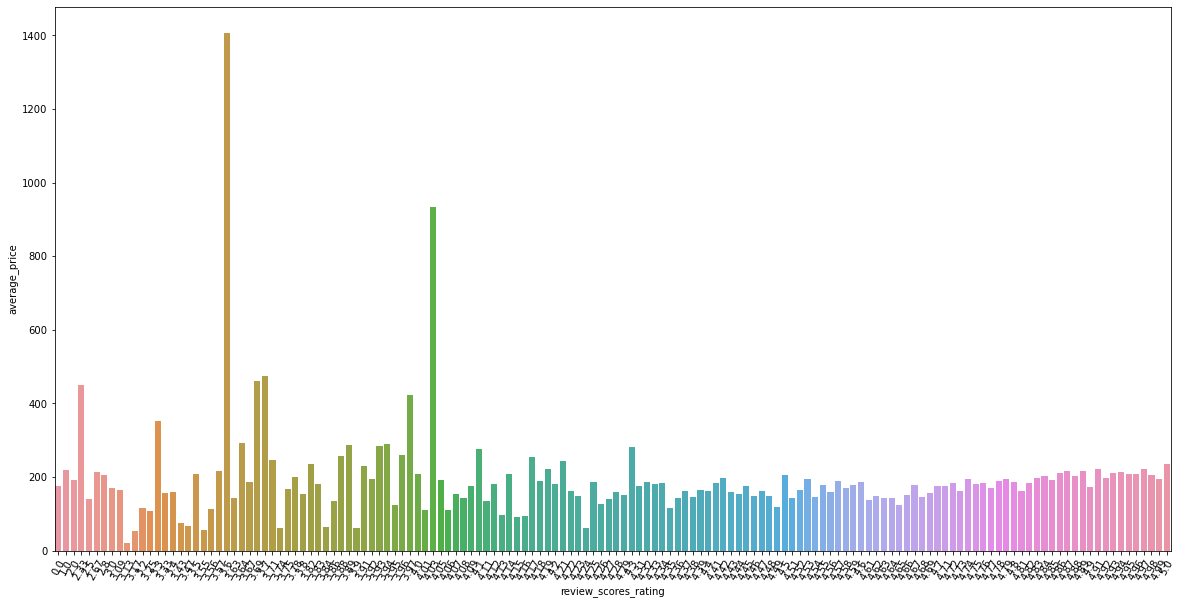

In [114]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=nyc_price_reviews_df, x="review_scores_rating", y="average_price", ax = ax)
plt.xticks(rotation=60)
plt.show()

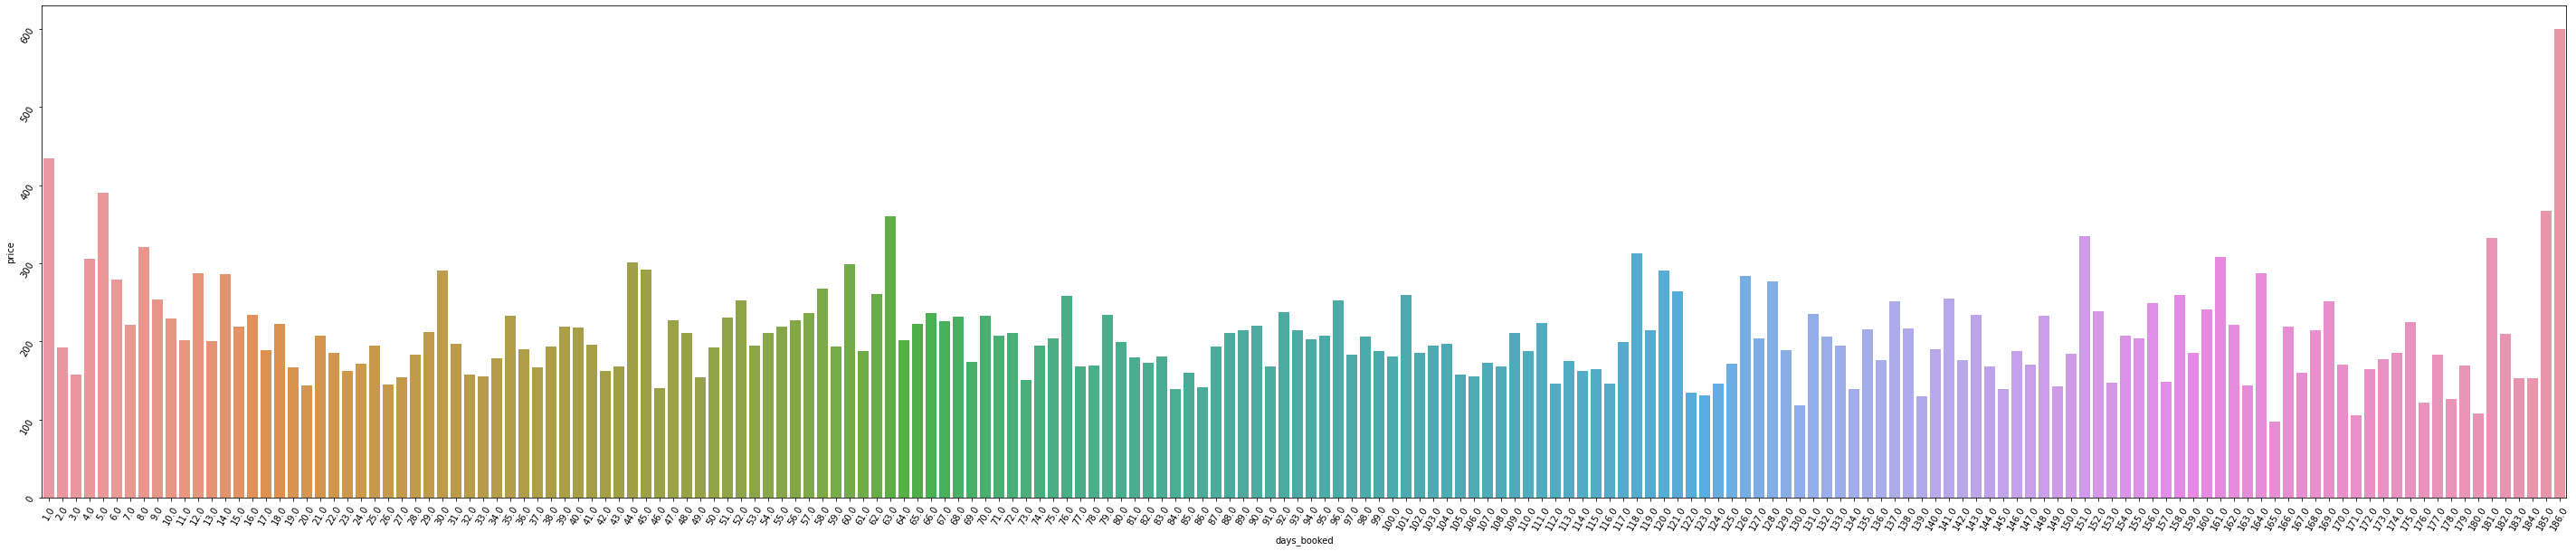

In [115]:
#split up
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=nyc_price_booking_df_1, x="days_booked", y="price", ci=None, ax = ax)
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

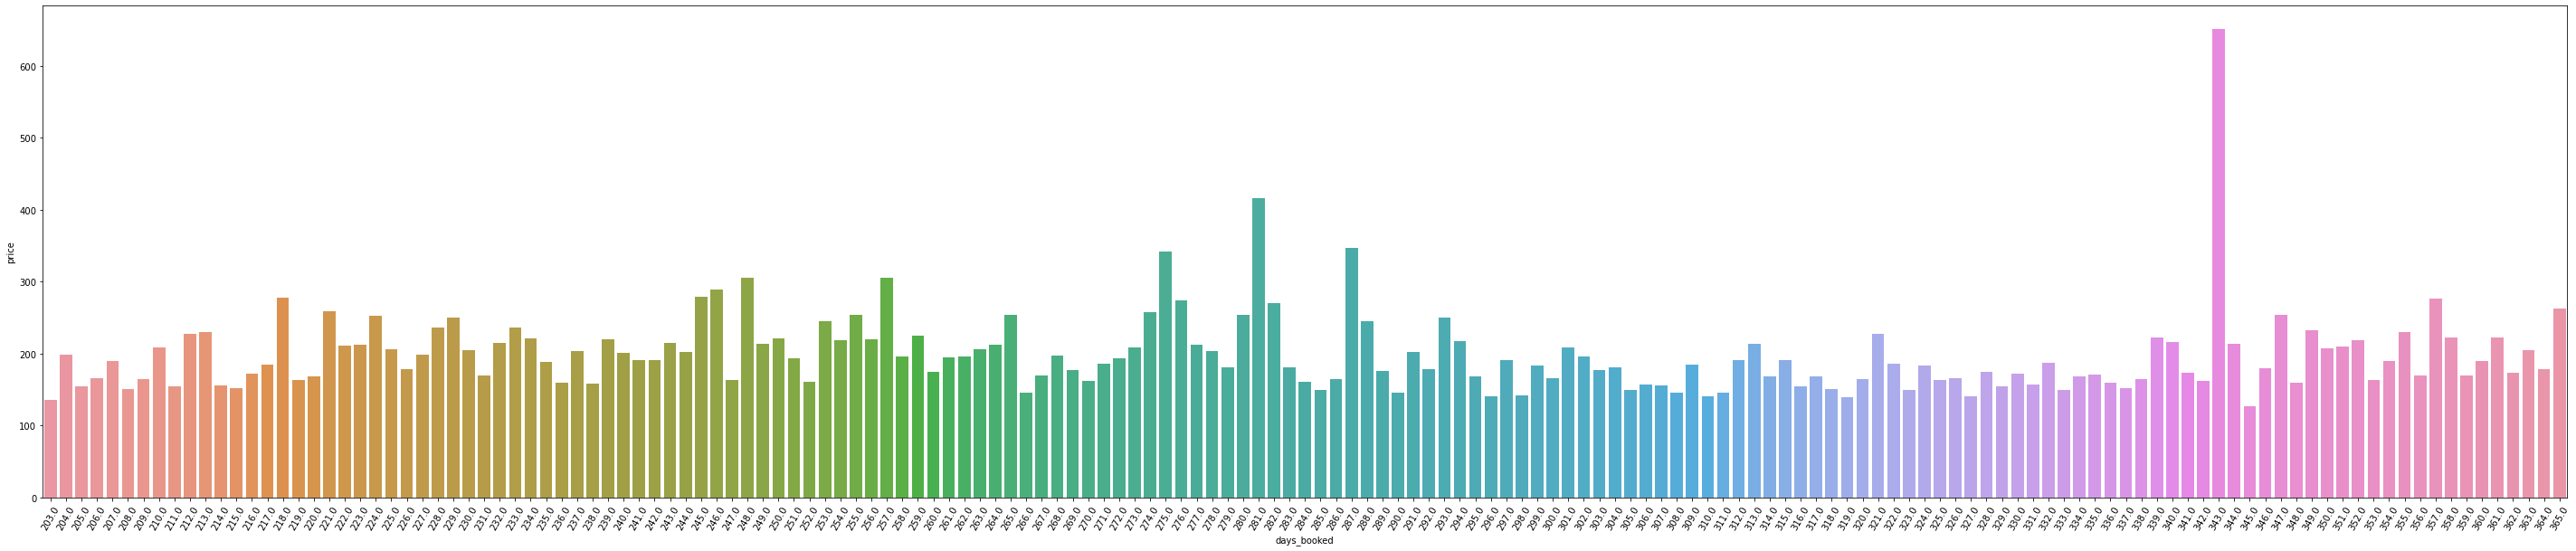

In [116]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=nyc_price_booking_df_2, x="days_booked", y="price", ci = None, ax = ax)
plt.xticks(rotation=60)
plt.show()

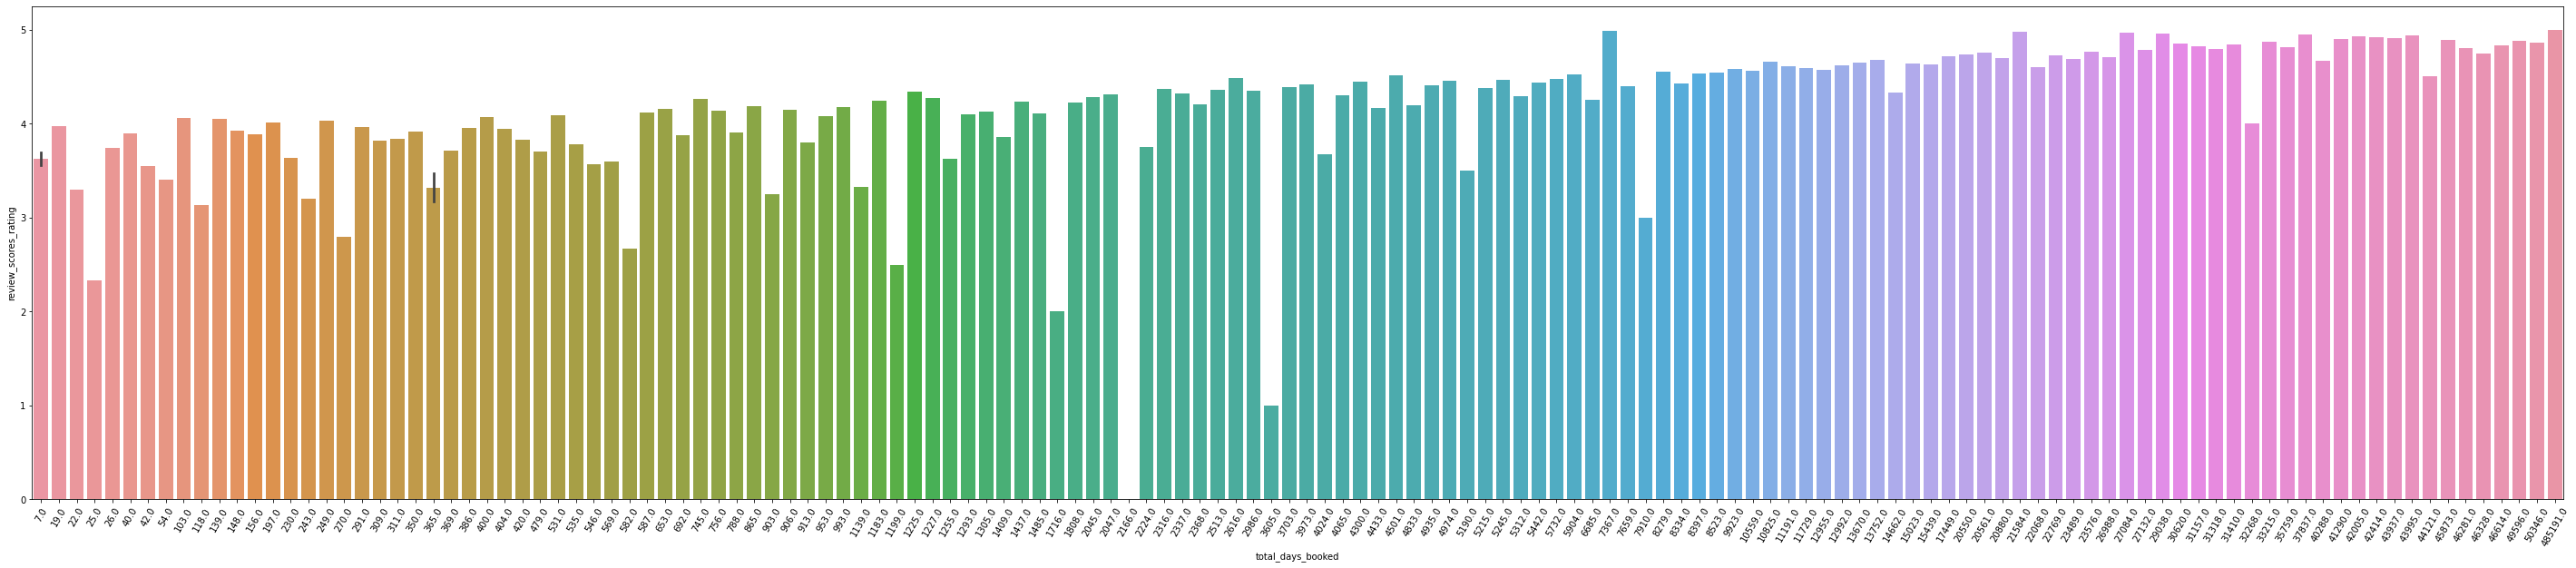

In [117]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=nyc_review_booking_df, x="total_days_booked", y="review_scores_rating", ax = ax)
plt.xticks(rotation=60)
plt.show()

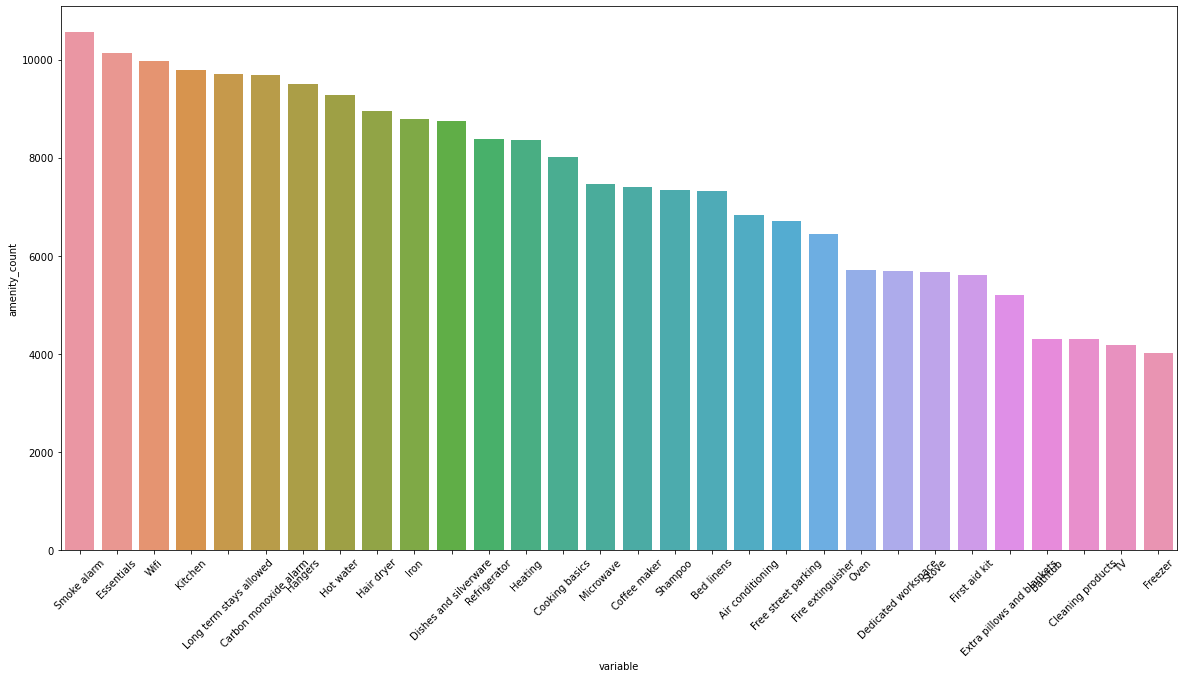

In [118]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=nyc_amenities_df, x="variable", y="amenity_count", ax = ax)
plt.xticks(rotation=45)
plt.show()

From the above graphs we see that the pricing for each listing around 200 dollars a day tends to have consistently high review scors while higher prices such as around 400 dolalrs a night and above tend to have lower reviews scores. In addition, the listings with pricing around 200 dollars a day have a higher amount of bookings within a year besides some listings that are considered outliers as they have extremely high prices. In general, we see that there is a positive relationship between the number of bookings and the average review rating for each booking with the baseline starting at 3 stars. The amenities that are more essential are smoke alarms, living essentials, wifi, long term stays, and carbon monoxide alarms, while the amenities valued less are freezers, TV, cleaning products, bathrubs, extra pillows and blankets. 

#### BOS GRAPHS

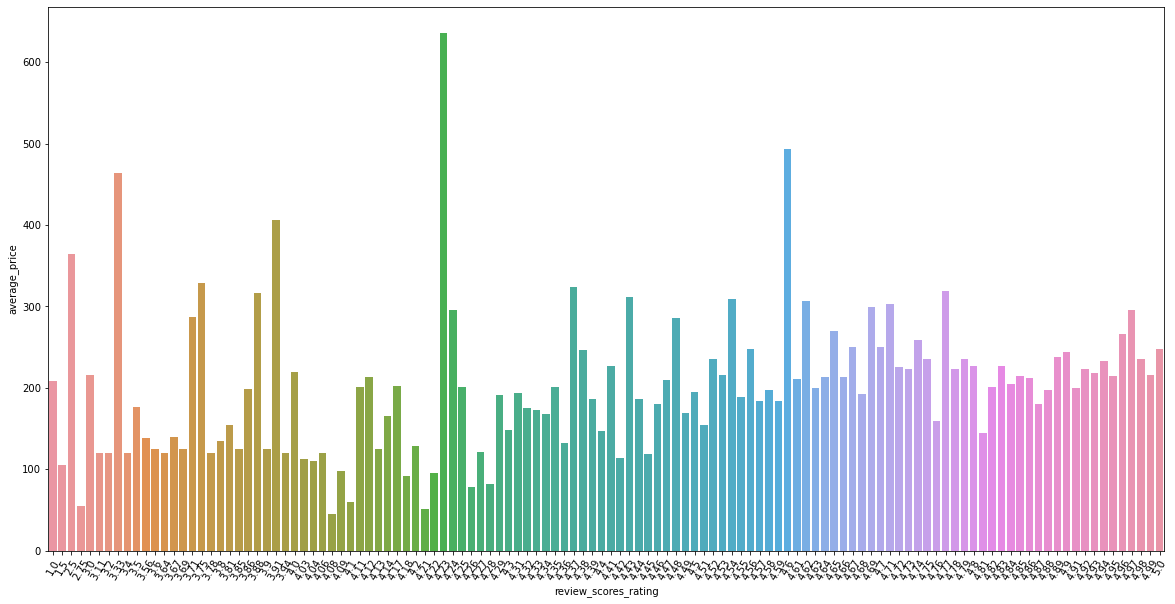

In [119]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=bos_price_reviews_df, x="review_scores_rating", y="average_price", ax = ax)
plt.xticks(rotation=60)
plt.show()

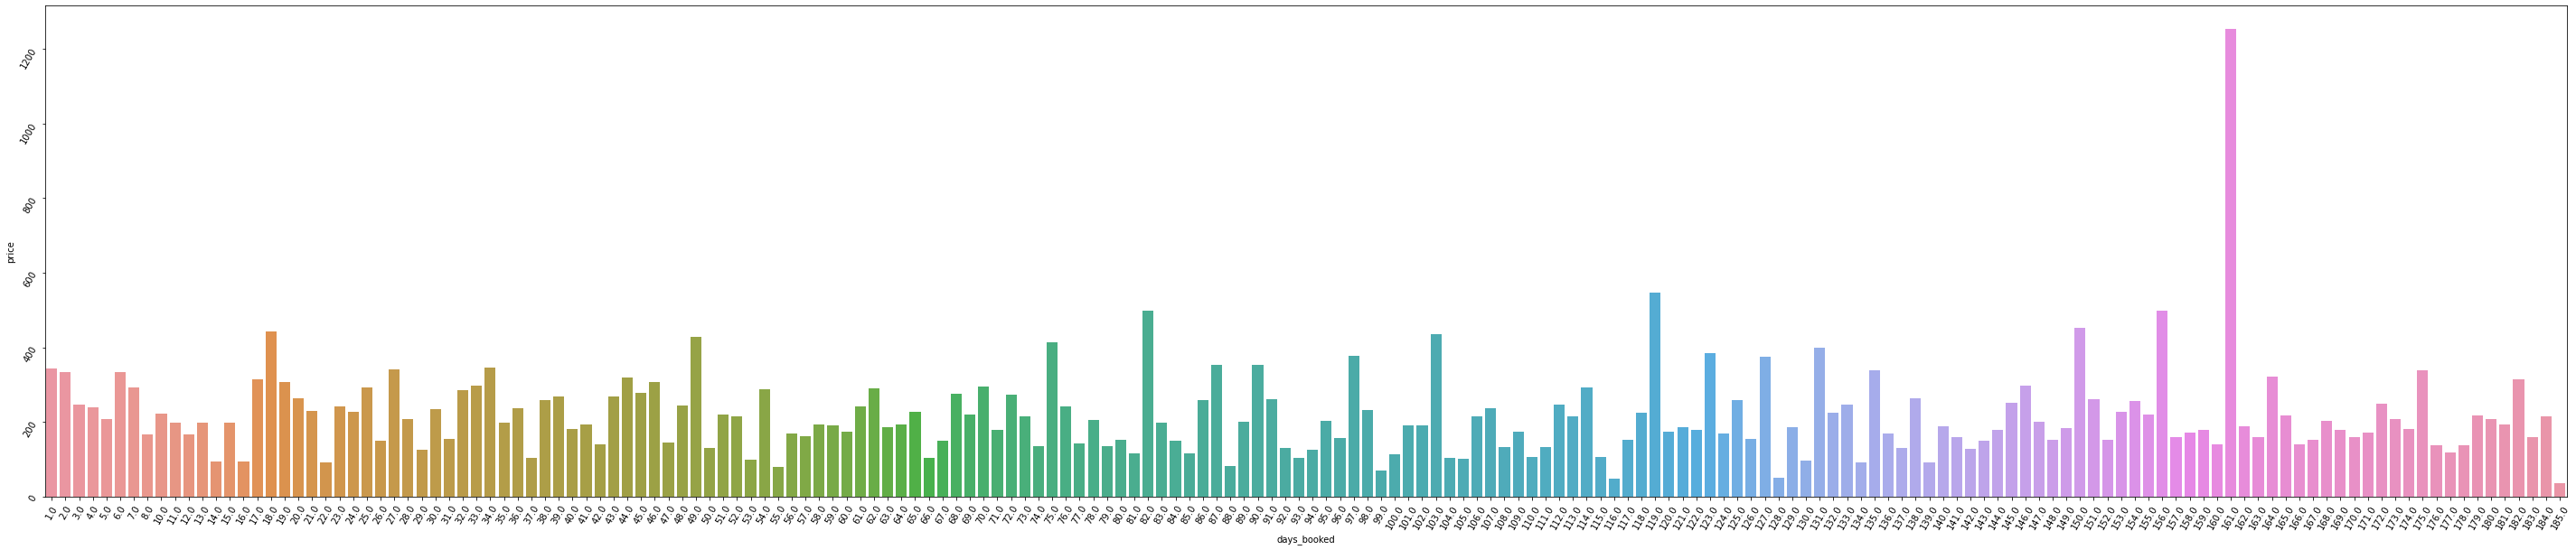

In [120]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=bos_price_booking_df_1, x="days_booked", y="price", ci=None, ax = ax)
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

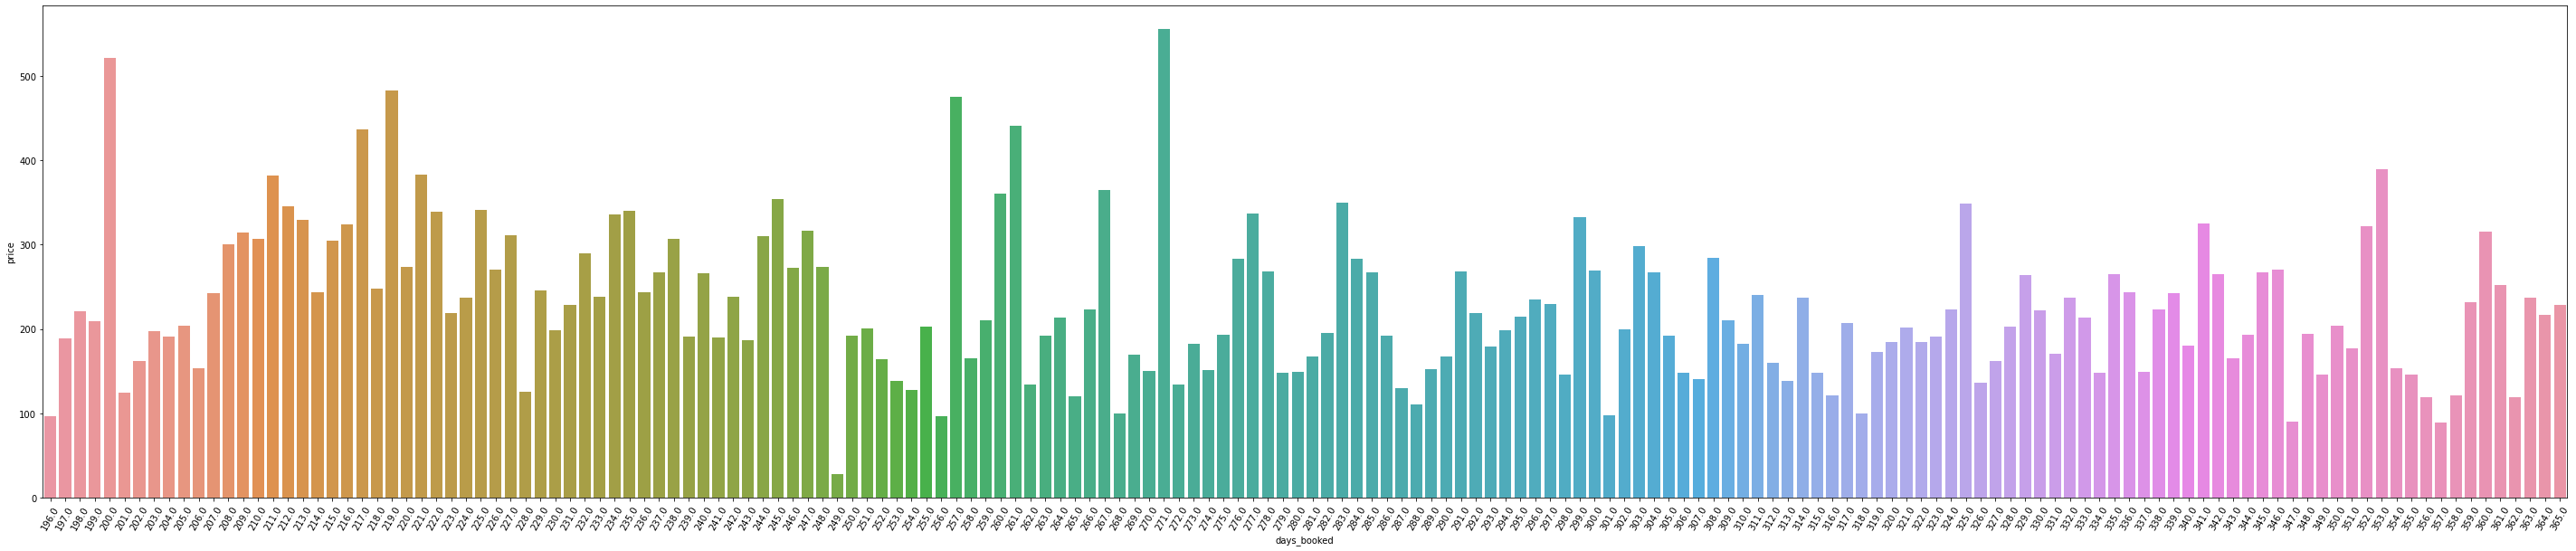

In [121]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=bos_price_booking_df_2, x="days_booked", y="price", ci = None, ax = ax)
plt.xticks(rotation=60)
plt.show()

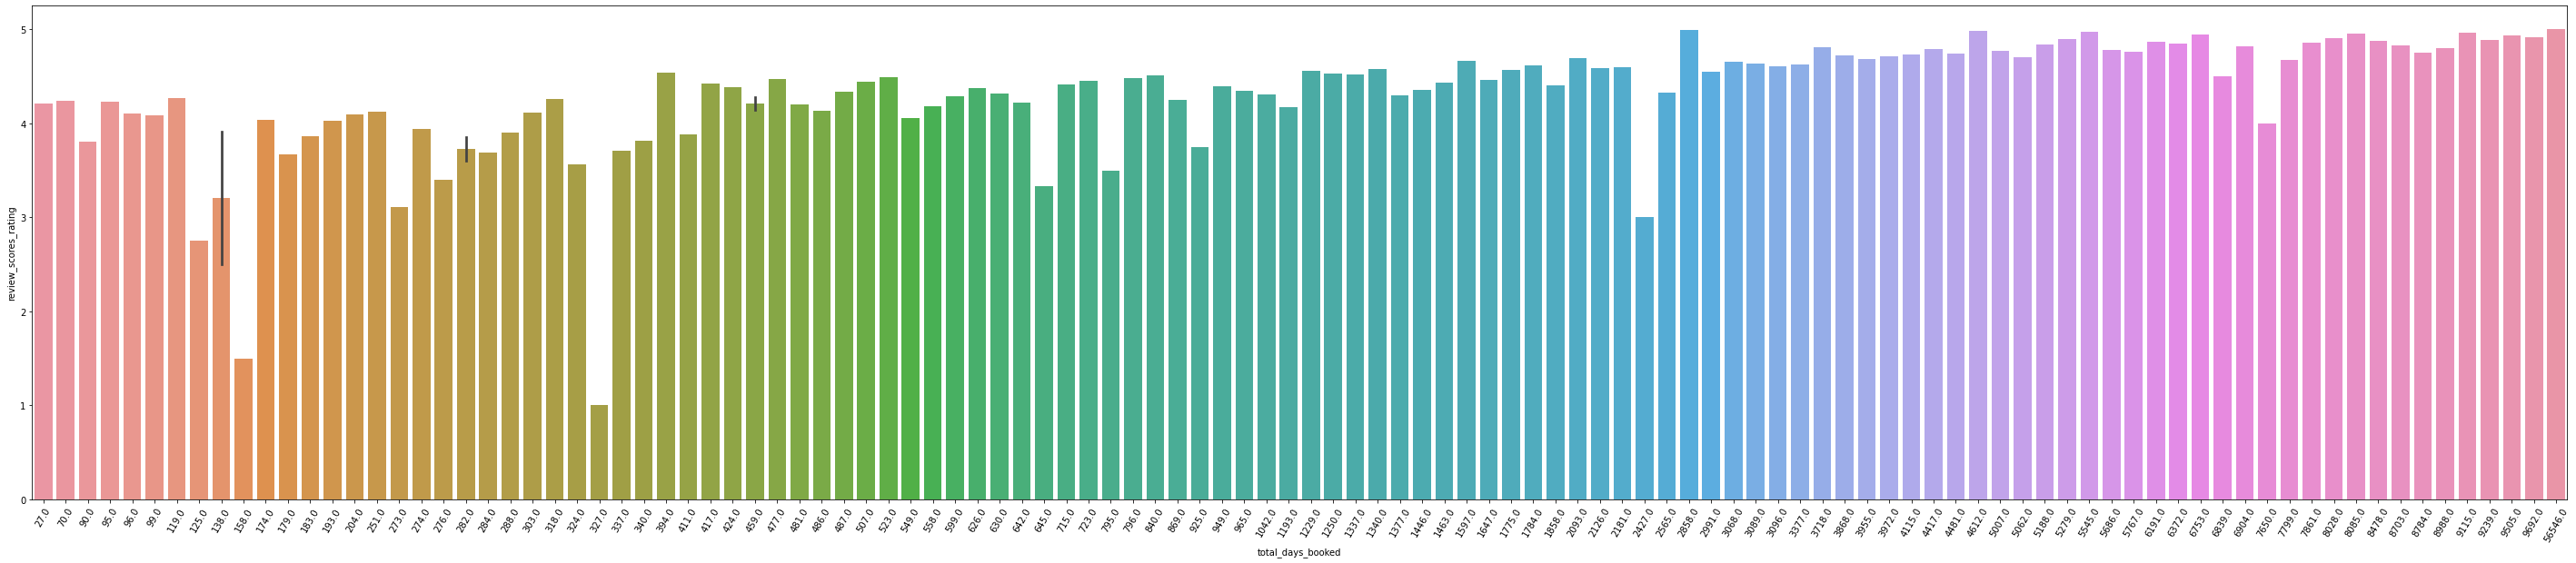

In [122]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=bos_review_booking_df, x="total_days_booked", y="review_scores_rating", ax = ax)
plt.xticks(rotation=60)
plt.show()

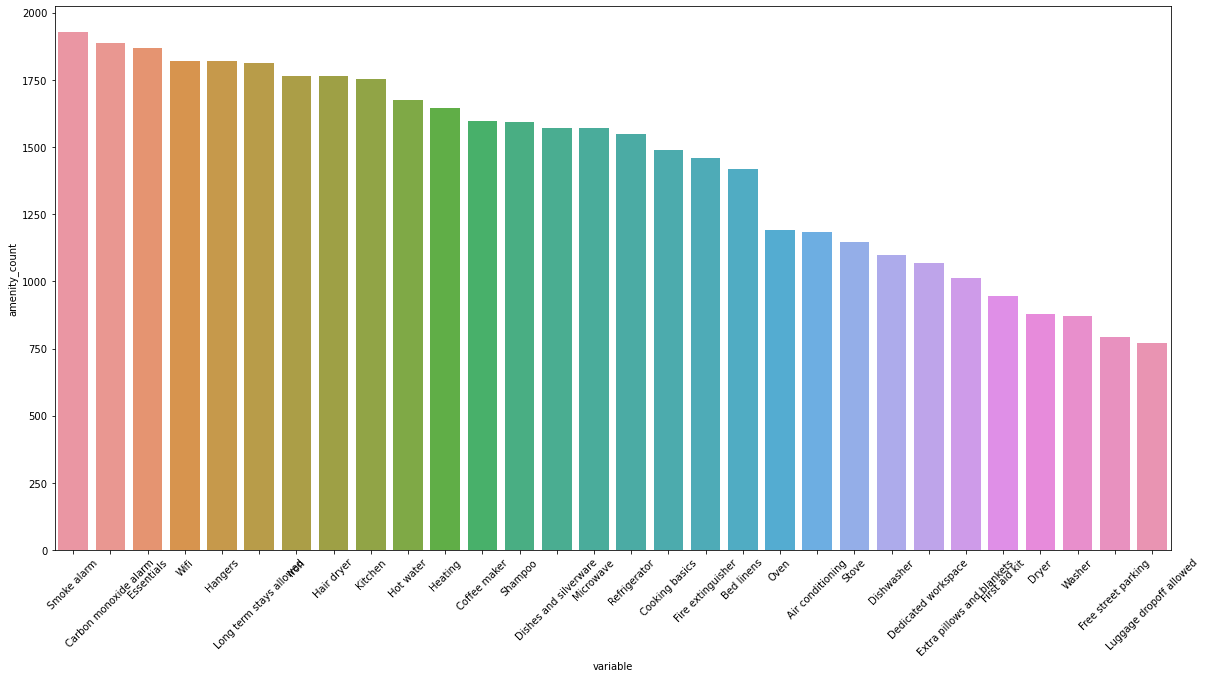

In [123]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=bos_amenities_df, x="variable", y="amenity_count", ax = ax)
plt.xticks(rotation=45)
plt.show()

There is a much larger disparity compared to New York City, but again pricing around 200-300 have higher review scores while prices at around 100 dollars a night have low ratings at 3 stars. In addition to the ratings, there is a larger disparity in the number of bookings in Boston as the listings with prices around 200 dolalrs have higher number of days booked. There is also a positve relationship between the number of bookings and the higher review rating with the baseline starting at 4 stars. If a booking has a higher number of bookings, it will generally also have a higher review rating. The essential amenities in Boston are the smoke alarm, carbok monoxide alarm, living essentials, wifi, and haners, while the less essential amenities are luggage dropoff, free street parking, washer and drying, first aid, and extra pillows and blankets. Already, we can see differences between the top 30 amenities for New York City and Boston as free street parking is more valued or common in New York City. This could suggest that parking in New York City is more expensive, or less common in New York City than Boston, which is why it is listed more commonly on listings as a means to appeal to customers. 

#### CHI GRAPHS

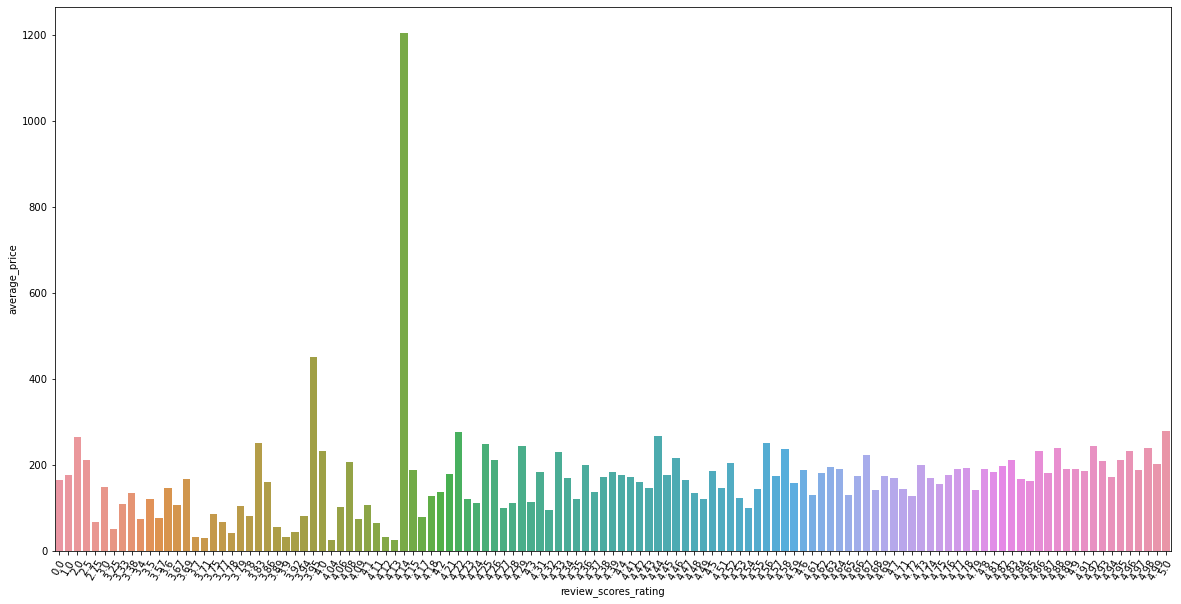

In [124]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=chi_price_reviews_df, x="review_scores_rating", y="average_price", ax = ax)
plt.xticks(rotation=60)
plt.show()

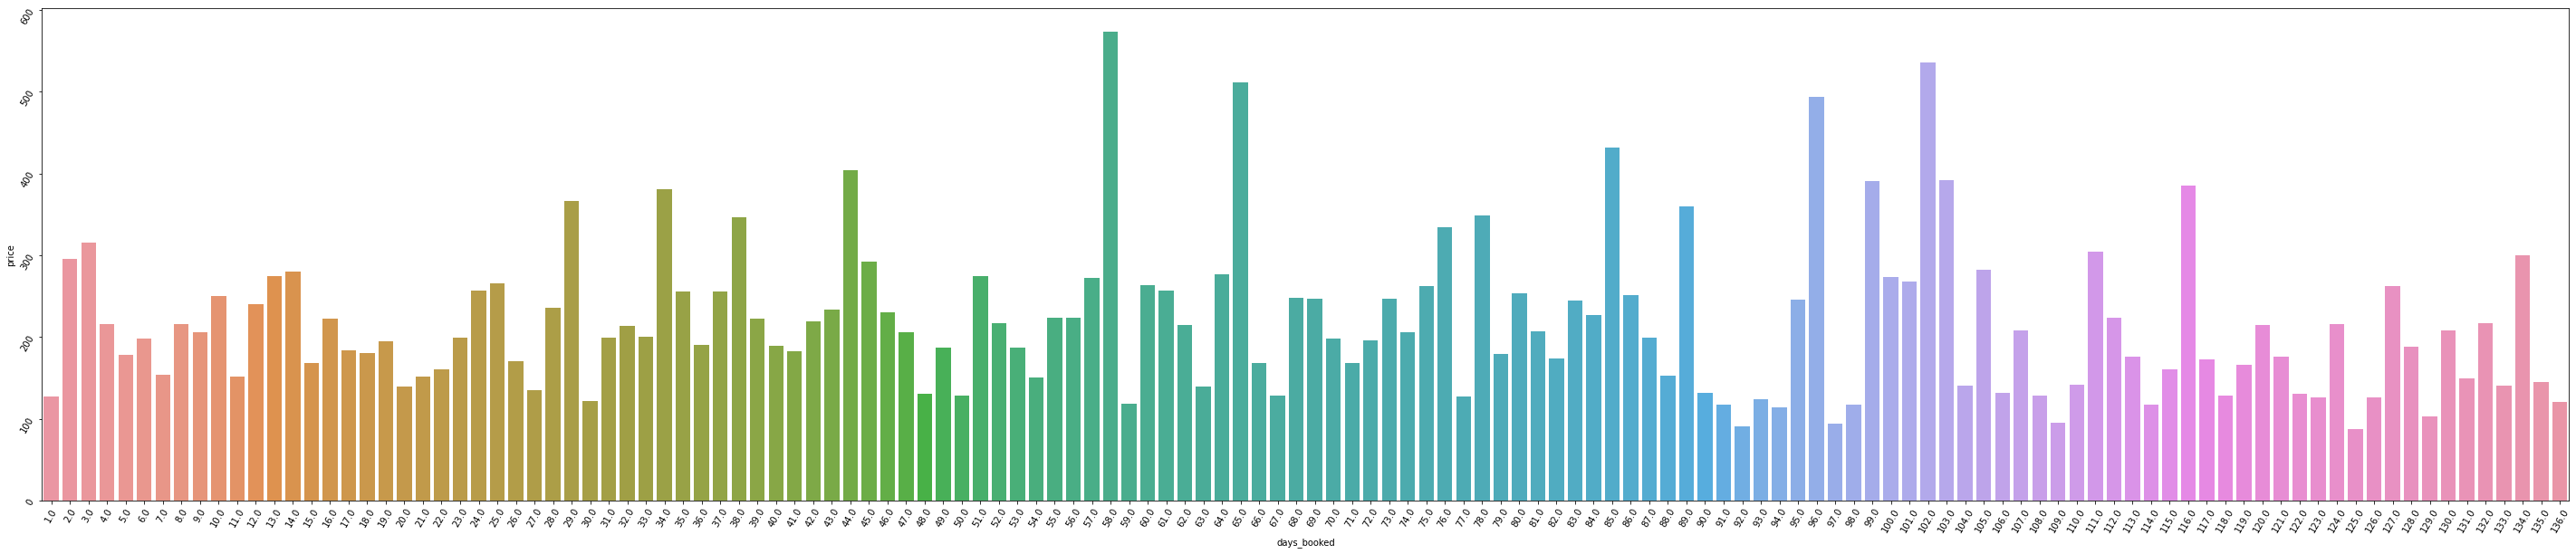

In [125]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=chi_price_booking_df_1, x="days_booked", y="price", ci=None, ax = ax)
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

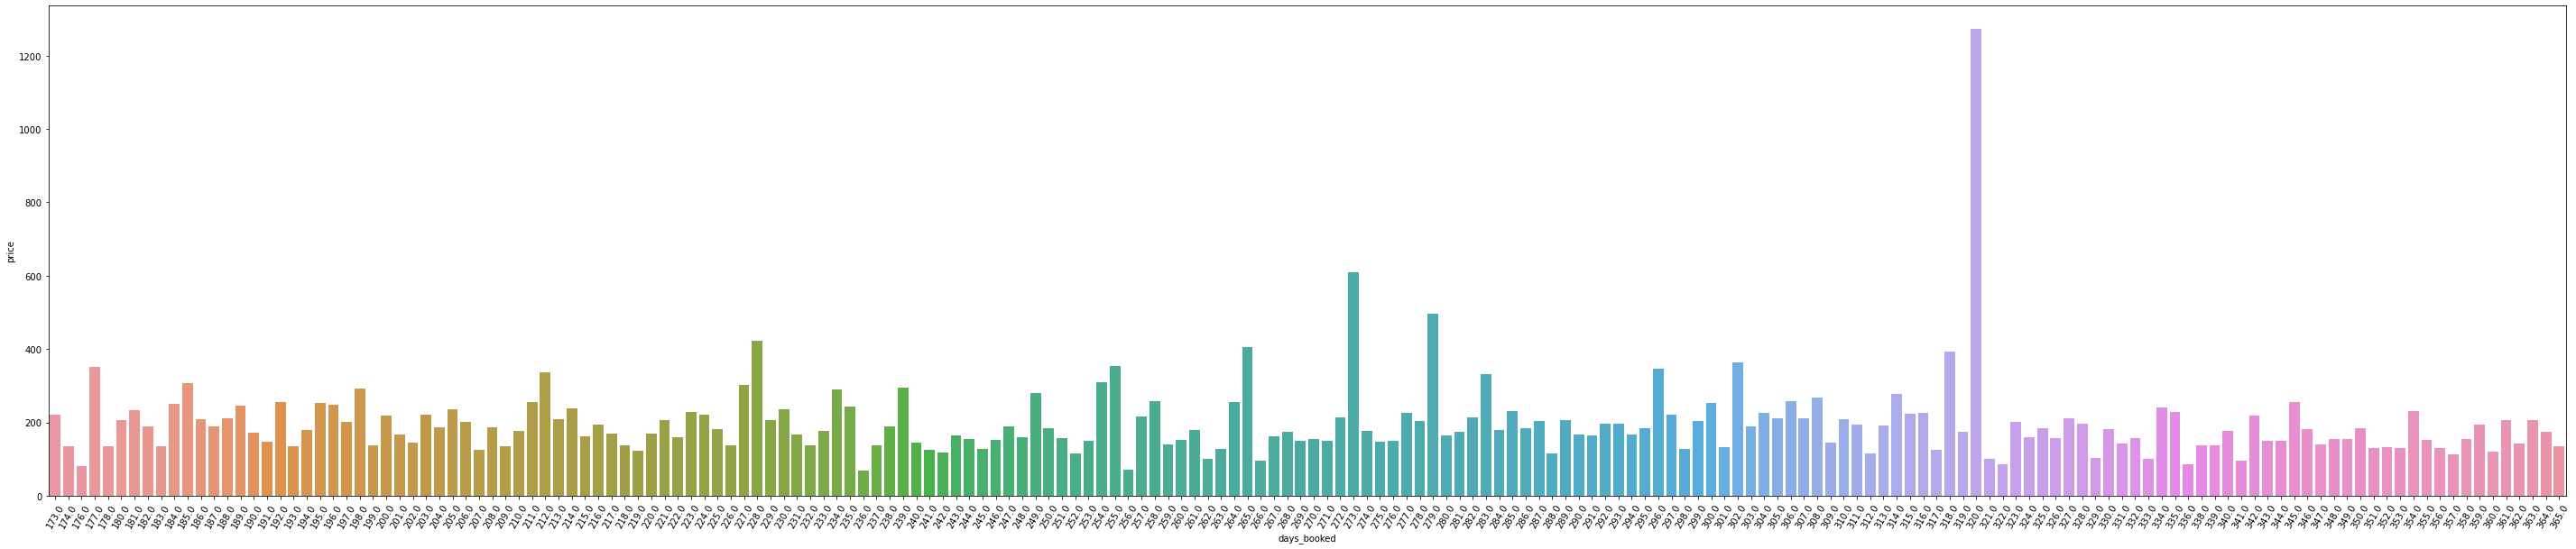

In [126]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=chi_price_booking_df_2, x="days_booked", y="price", ci = None, ax = ax)
plt.xticks(rotation=60)
plt.show()

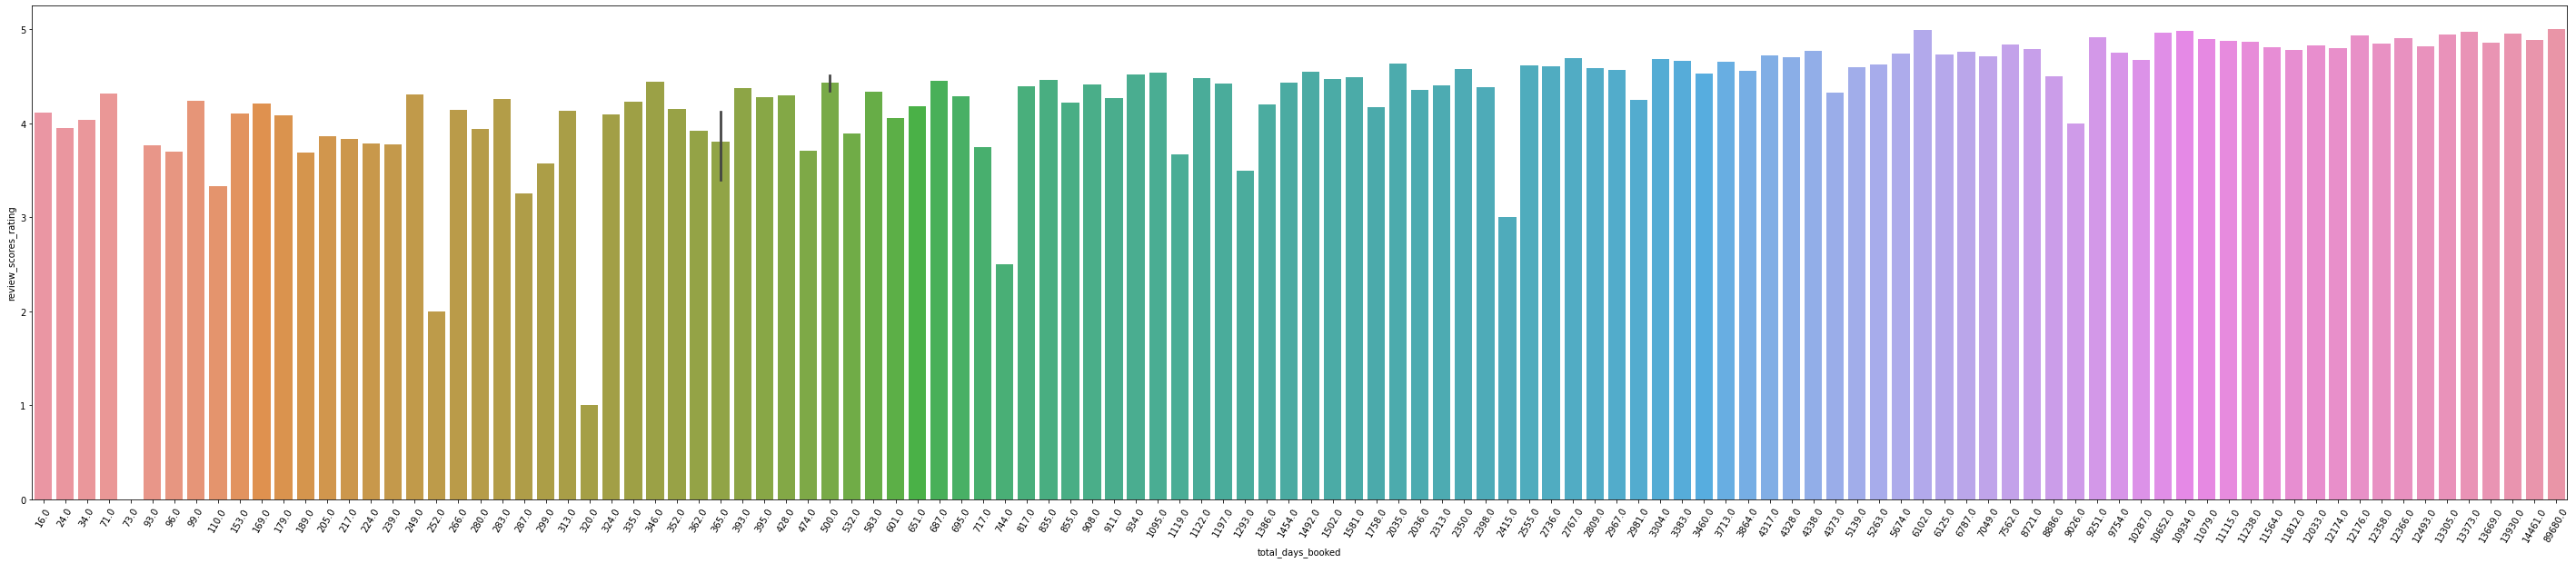

In [127]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=chi_review_booking_df, x="total_days_booked", y="review_scores_rating", ax = ax)
plt.xticks(rotation=60)
plt.show()

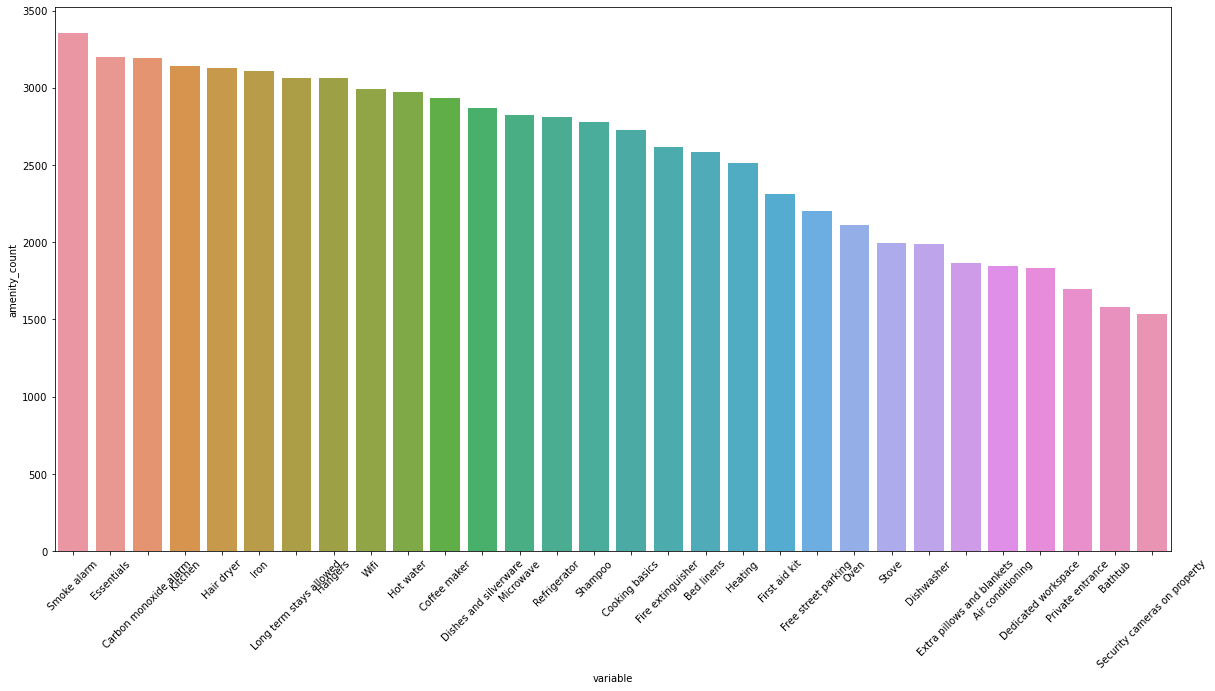

In [128]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=chi_amenities_df, x="variable", y="amenity_count", ax = ax)
plt.xticks(rotation=45)
plt.show()

There are higher review scores at around listings with prices at around 200 dollars a night, while listings at 100 dollars per night tend to have 3 stars to lower. Listings with the price at high 100 dollars per night tend to have the highest amount of days booked, while prices above 300 have less days booked. Similar to NYC and BOS, there are unusually highly priced listing that are booking frequently as well. The most essential amenities in Chicago are smoke alarm, living essentials, carbon monoxide alarms, and kitchen, while the less essential amenities in Chicago are security cameras, private entrance, bathtub, dedicated work space, and air conditioning.

#### DC GRAPHS

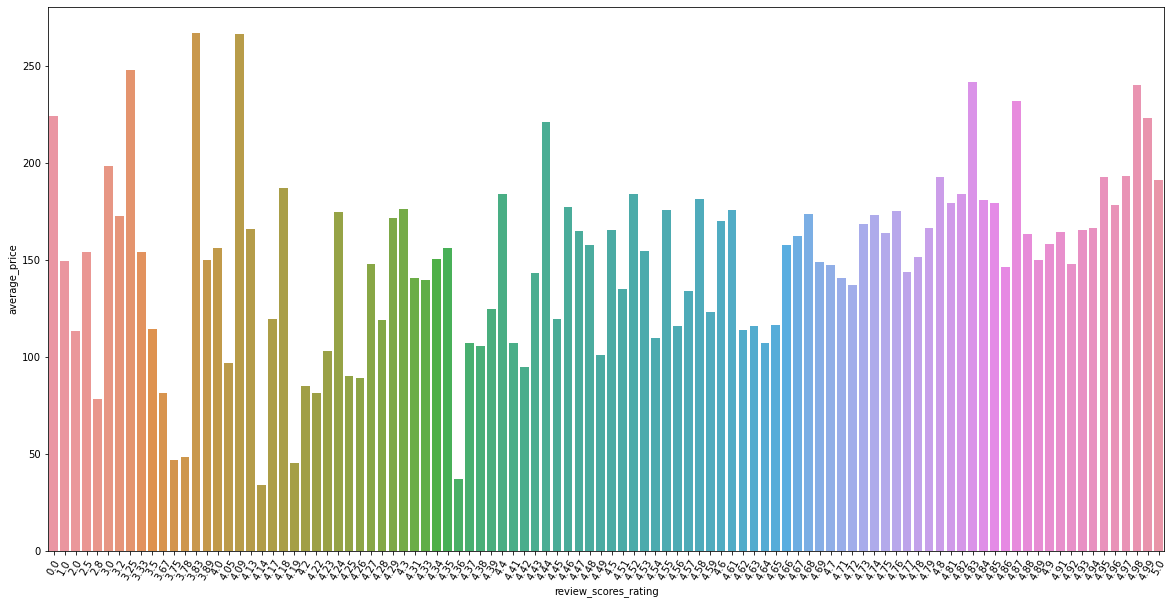

In [129]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=dc_price_reviews_df, x="review_scores_rating", y="average_price", ax = ax)
plt.xticks(rotation=60)
plt.show()

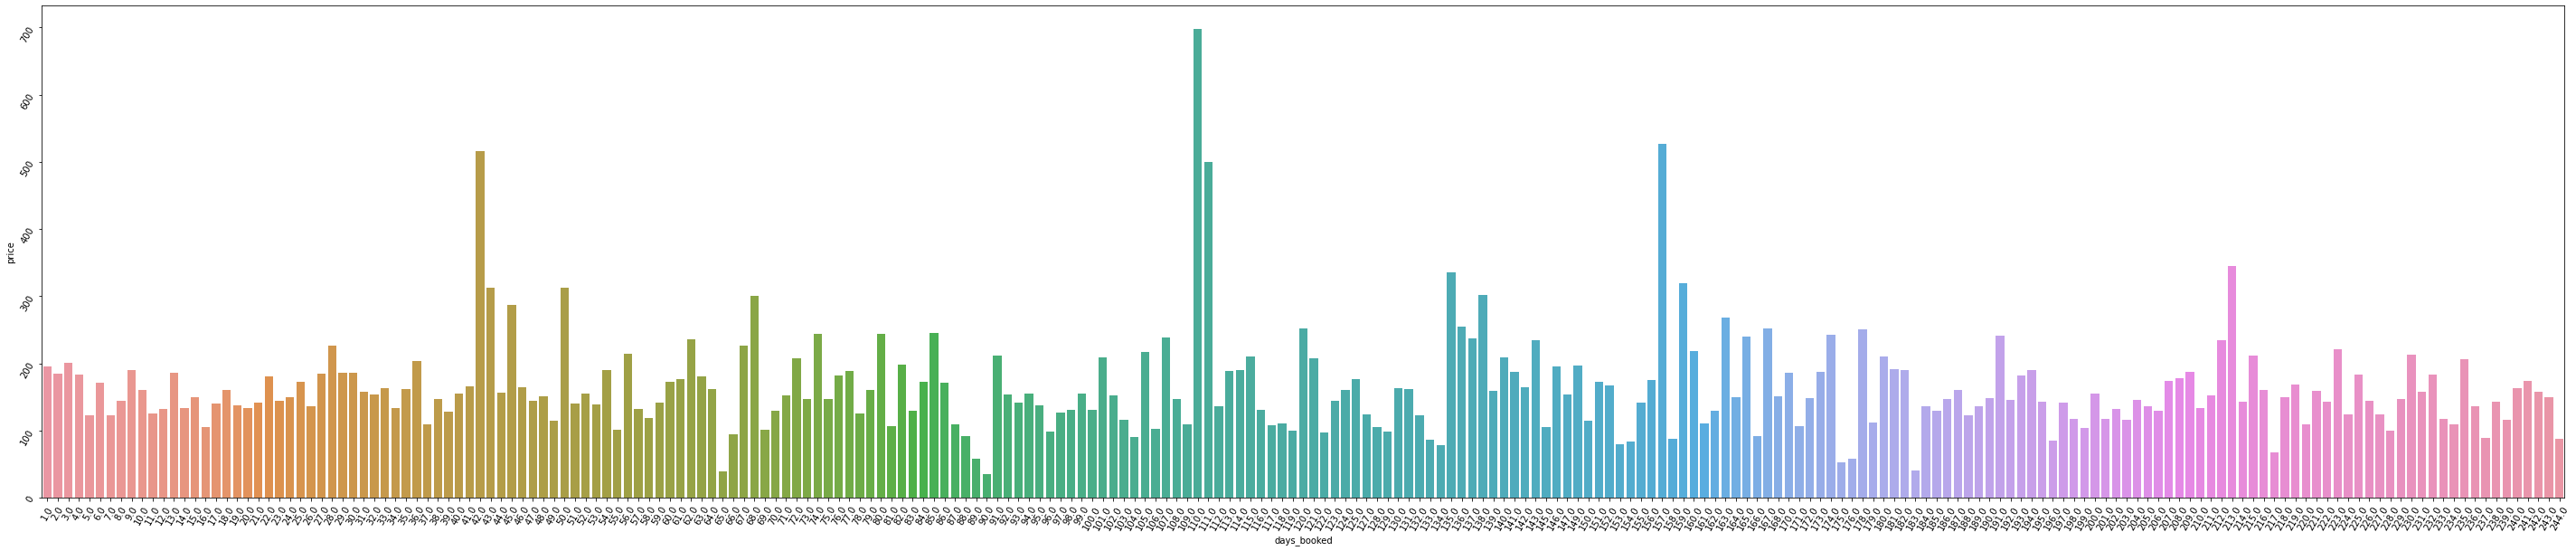

In [130]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=dc_price_booking_df_1, x="days_booked", y="price", ci=None, ax = ax)
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

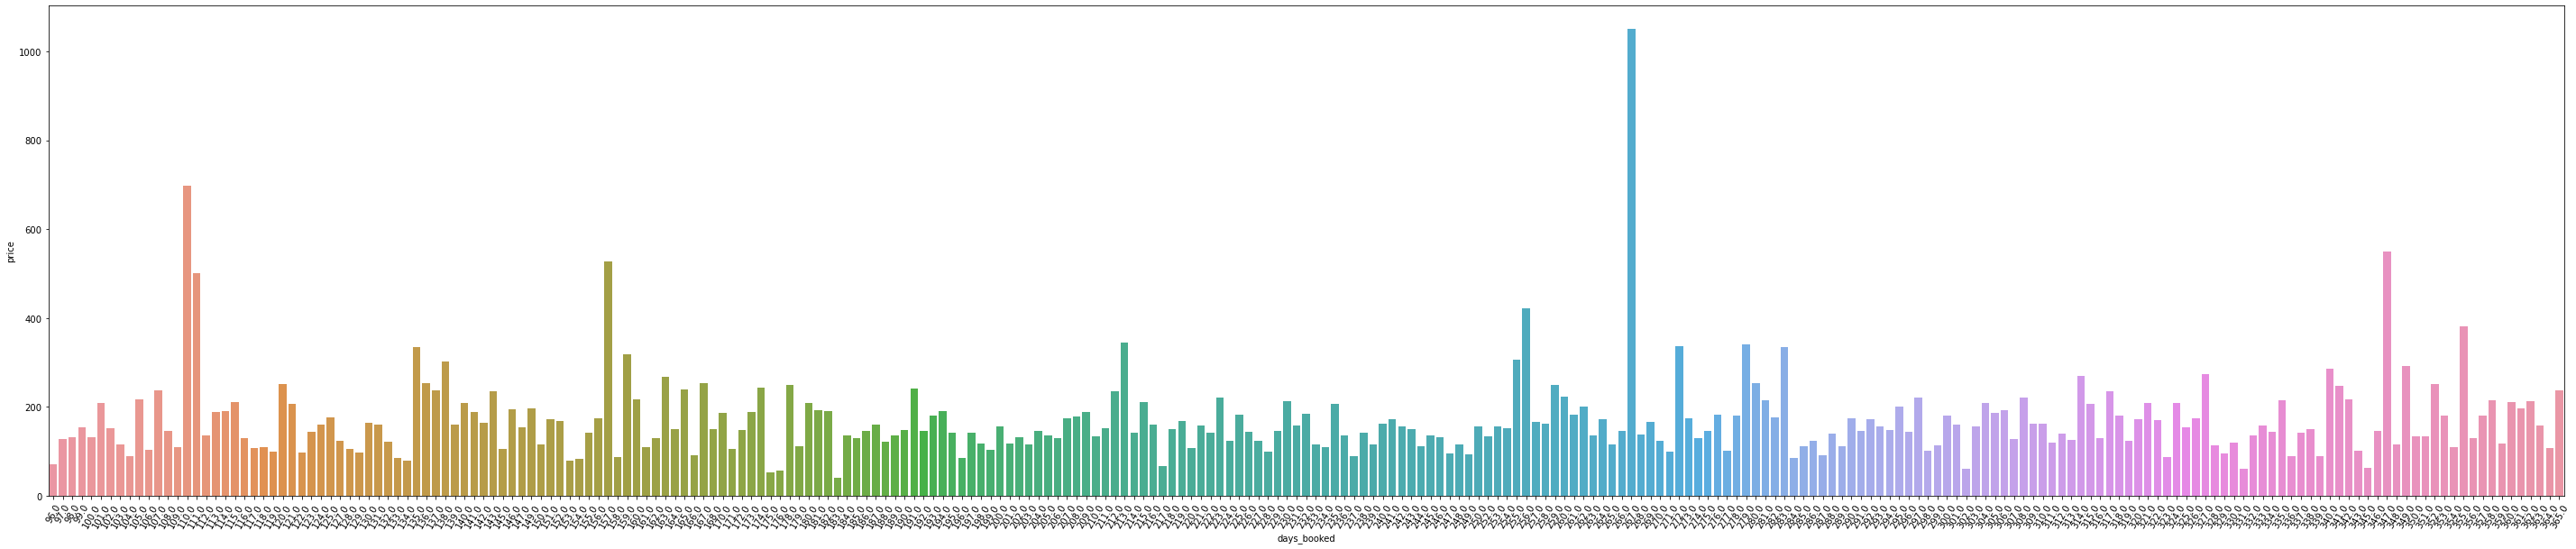

In [131]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=dc_price_booking_df_2, x="days_booked", y="price", ci = None, ax = ax)
plt.xticks(rotation=60)
plt.show()

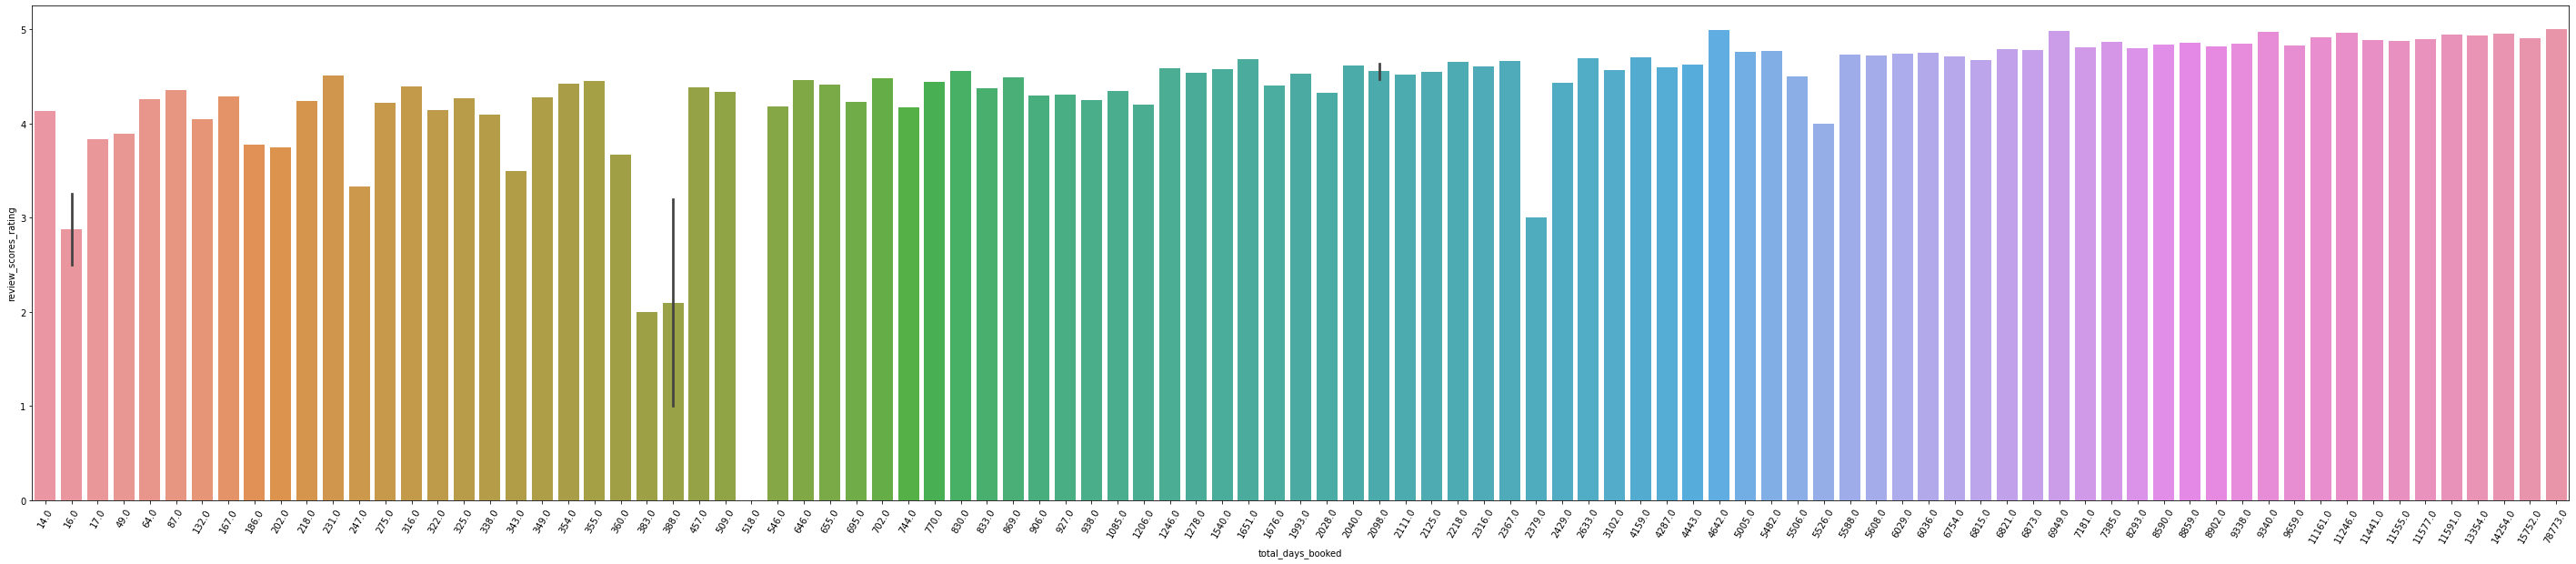

In [132]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=dc_review_booking_df, x="total_days_booked", y="review_scores_rating", ax = ax)
plt.xticks(rotation=60)
plt.show()

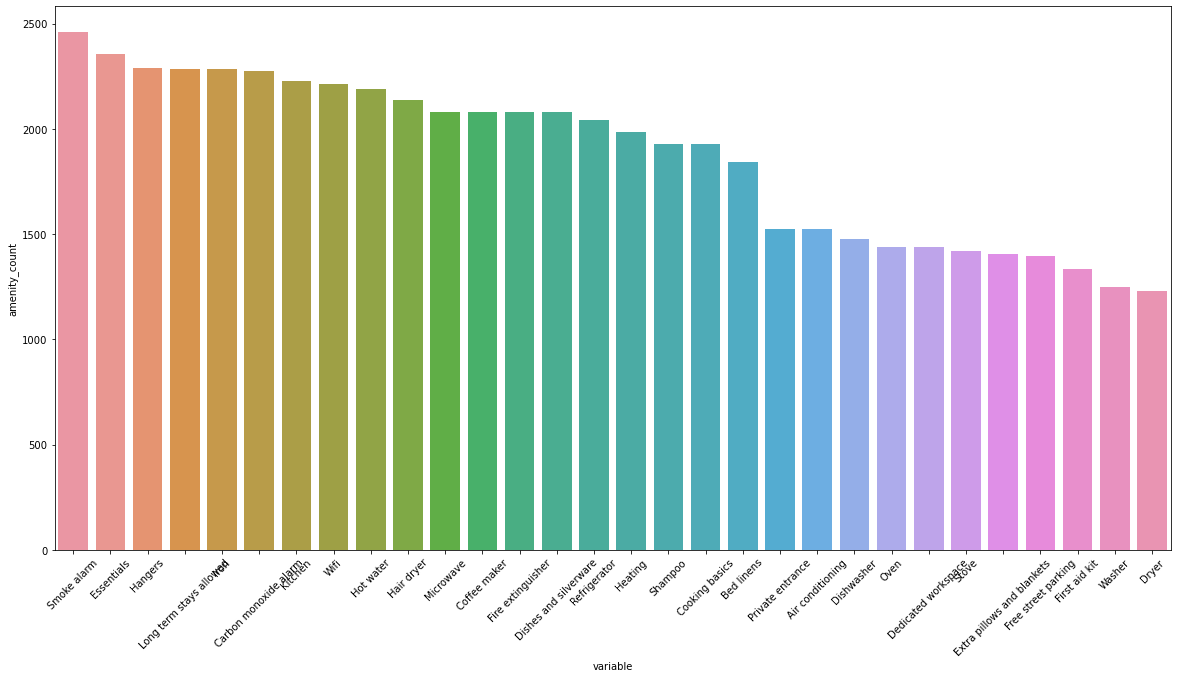

In [133]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=dc_amenities_df, x="variable", y="amenity_count", ax = ax)
plt.xticks(rotation=45)
plt.show()

Listings in DC are significantly cheaper compared to Chicago, Boston, and New York City as the average price with high reviews is around 150-175 dollars a night while scores between to lower at around 200+ dollars a night. Listings at the price of 150 dollars a night tend to have the highest amount of days booked, while the number of bookings lowers at prices of 200 or more. There is a positive relationship between bookings and ratings again as the number of bookings in a listing increases, the higher the rating that listing receives. Smoke alarms, essentials, handers, long term stays allowed, and carbon monoxide alarms are most common in listing while washer, dryer, first aid, free parking, and extra pillows and blankets are less common. 

#### DAL GRAPHS

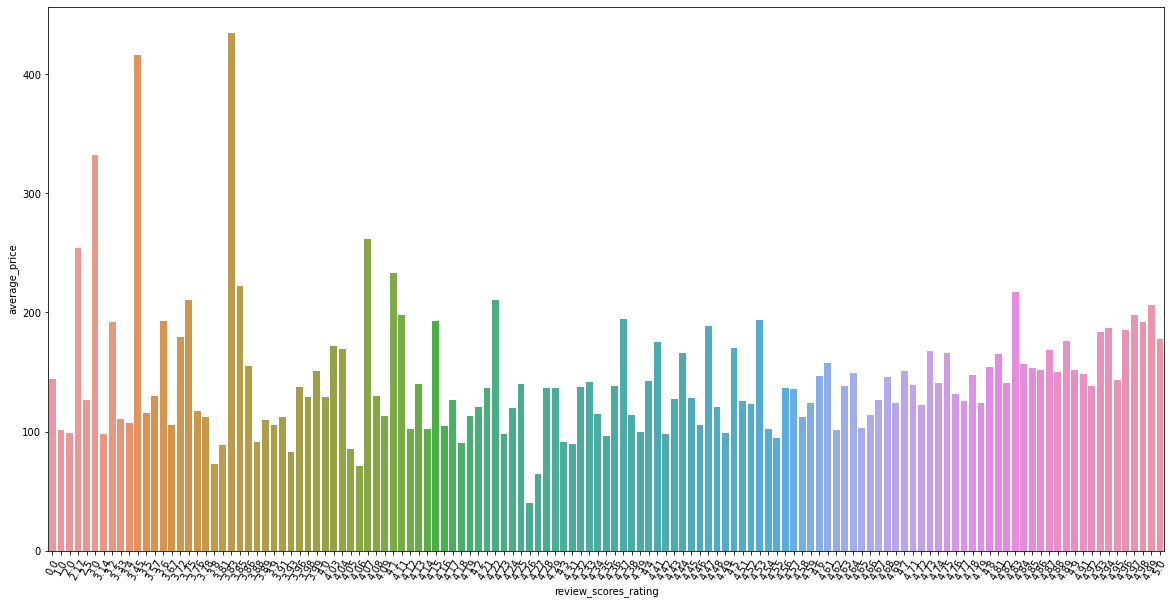

In [134]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=dal_price_reviews_df, x="review_scores_rating", y="average_price", ax = ax)
plt.xticks(rotation=60)
plt.show()

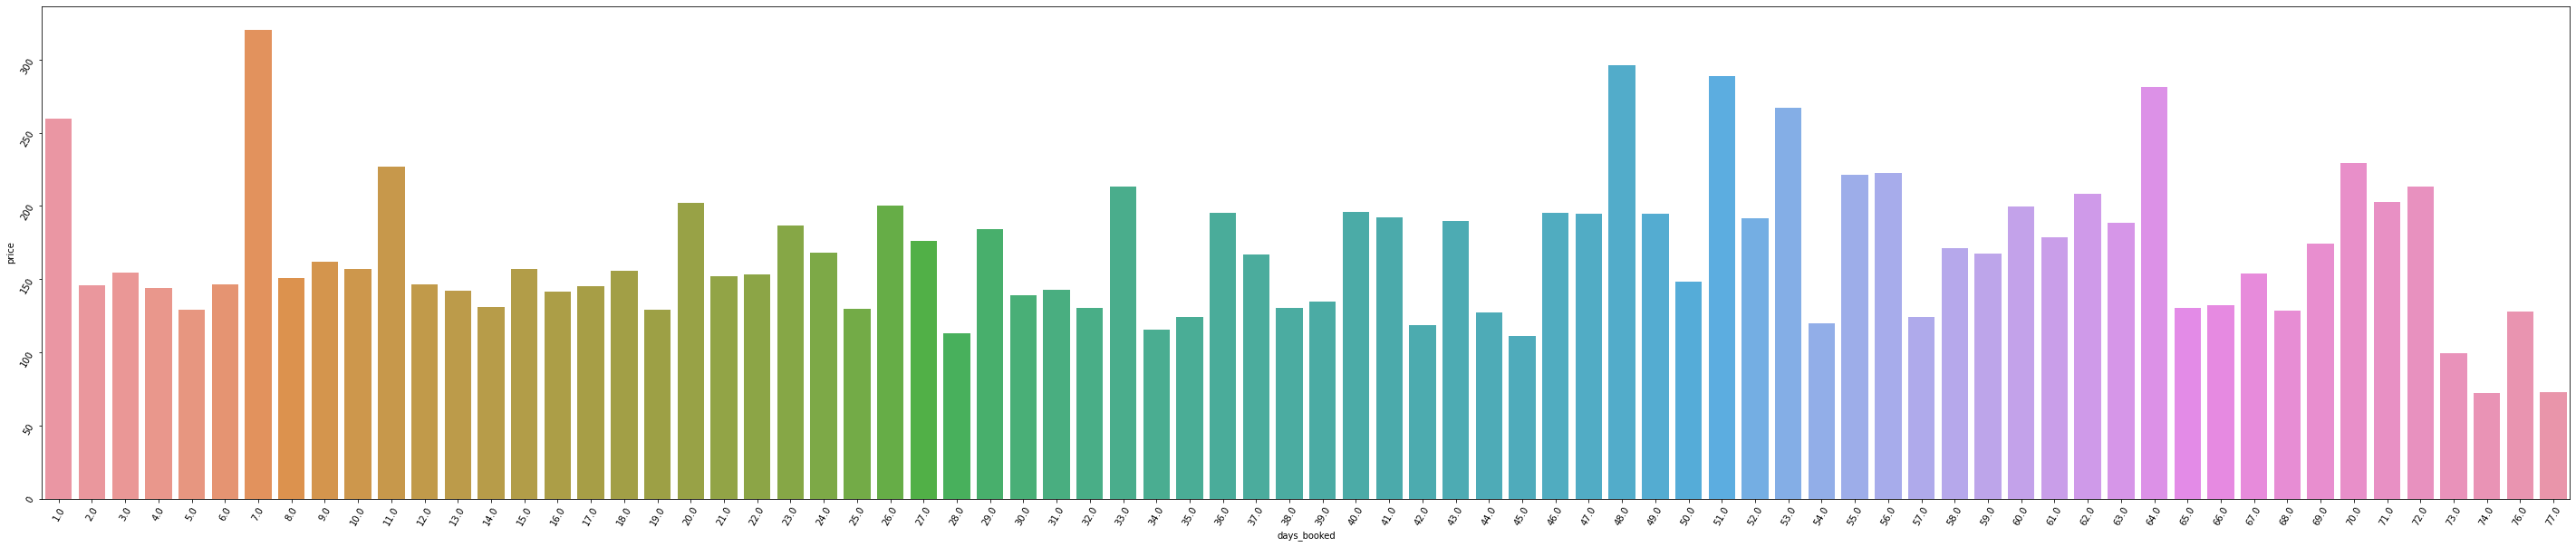

In [135]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=dal_price_booking_df_1, x="days_booked", y="price", ci=None, ax = ax)
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

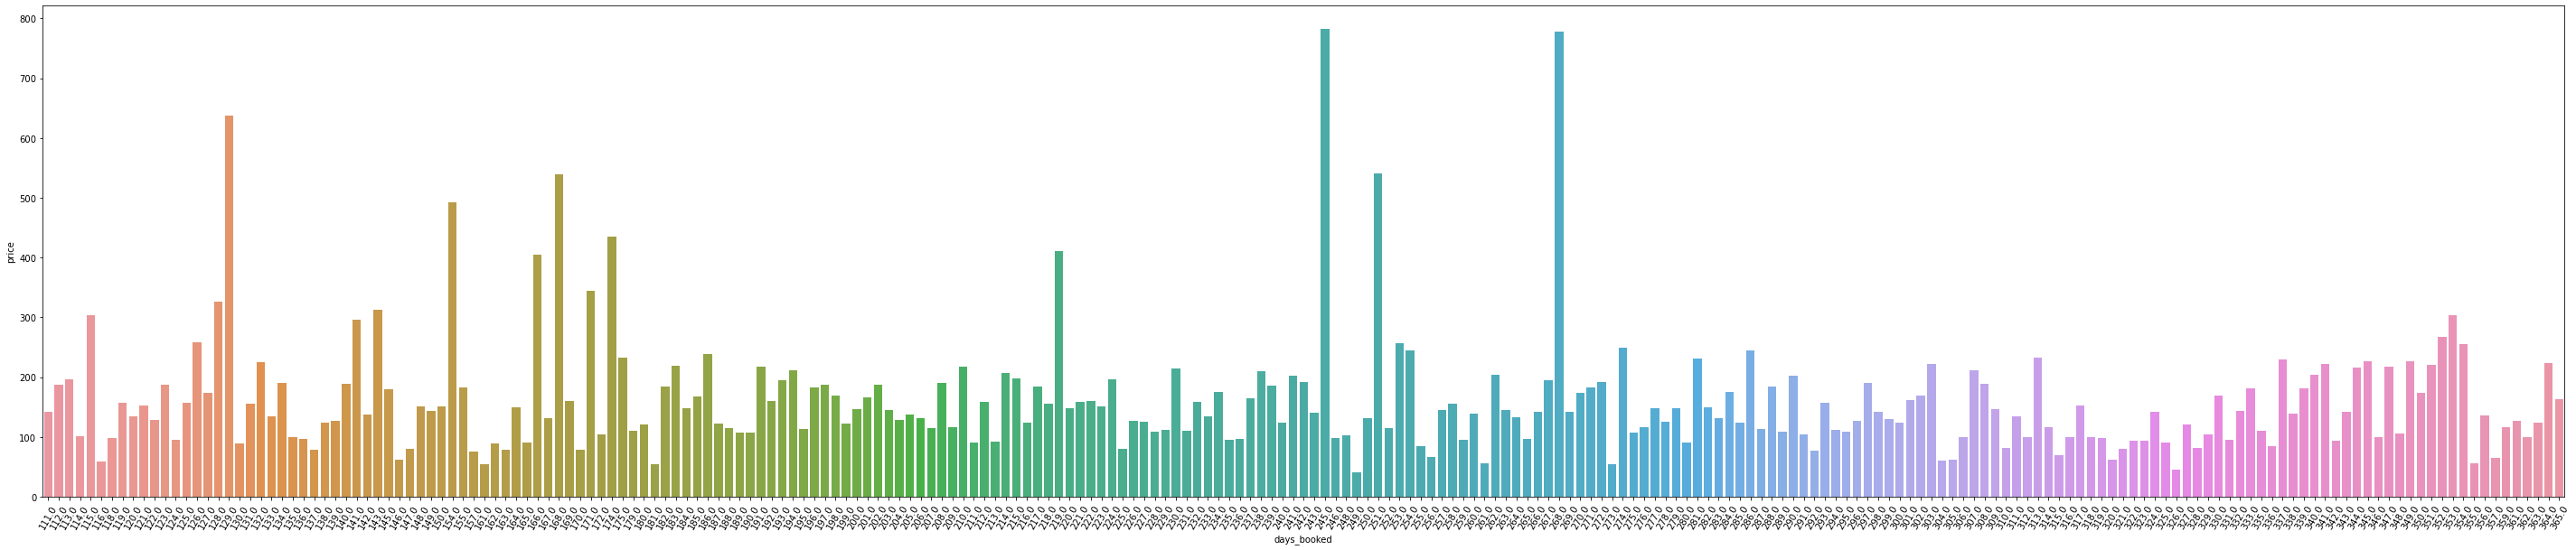

In [136]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=dal_price_booking_df_2, x="days_booked", y="price", ci = None, ax = ax)
plt.xticks(rotation=60)
plt.show()

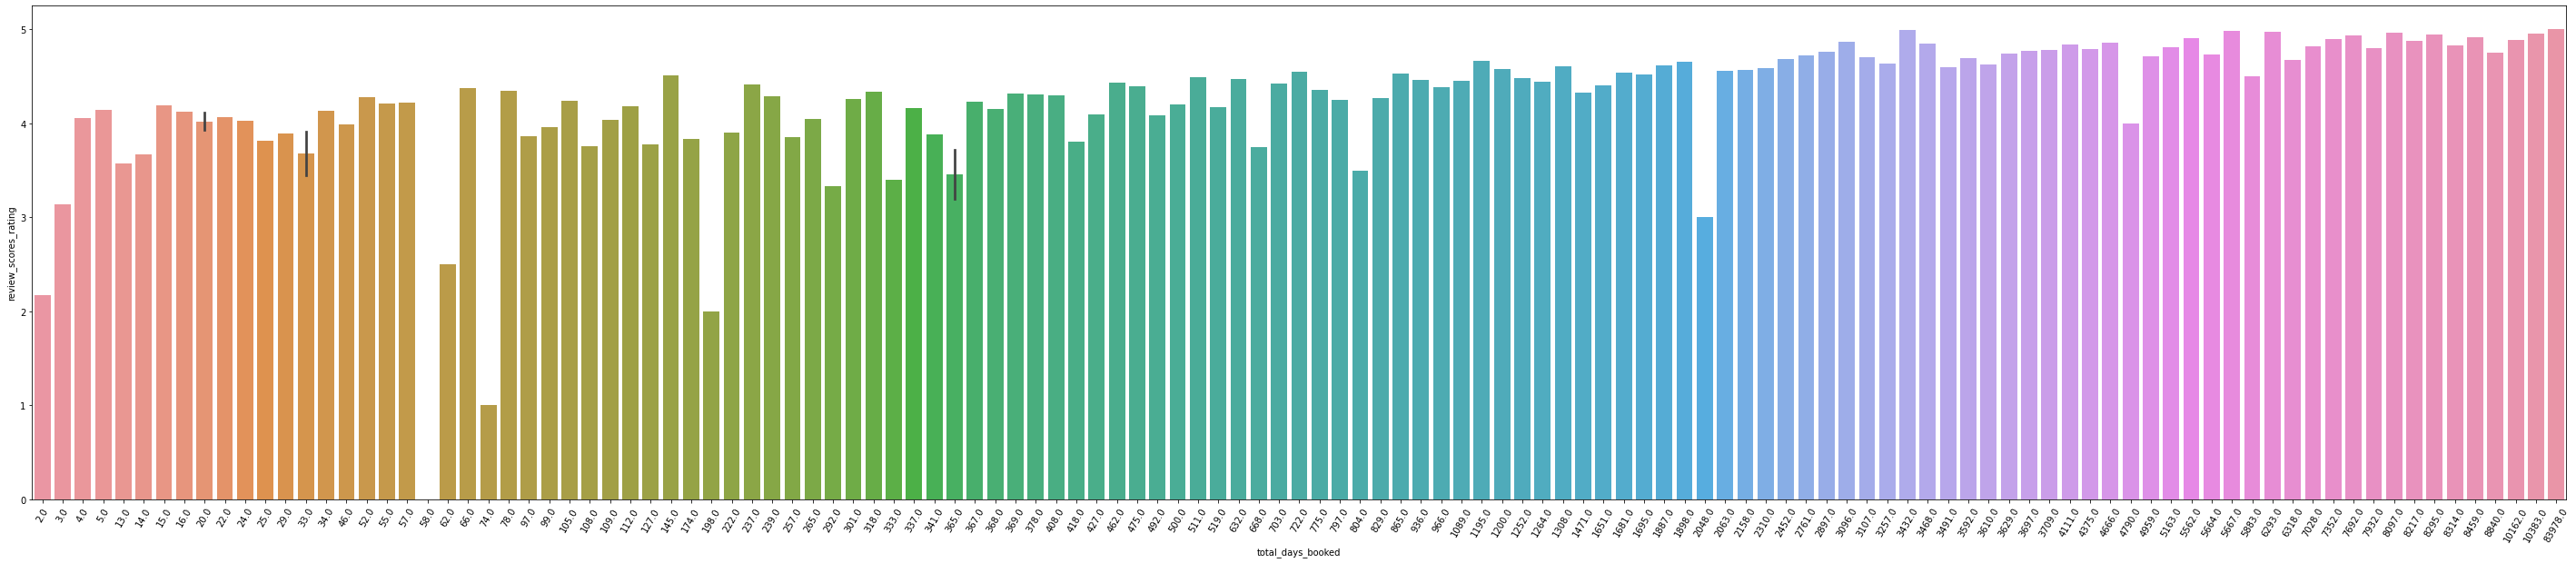

In [137]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=dal_review_booking_df, x="total_days_booked", y="review_scores_rating", ax = ax)
plt.xticks(rotation=60)
plt.show()

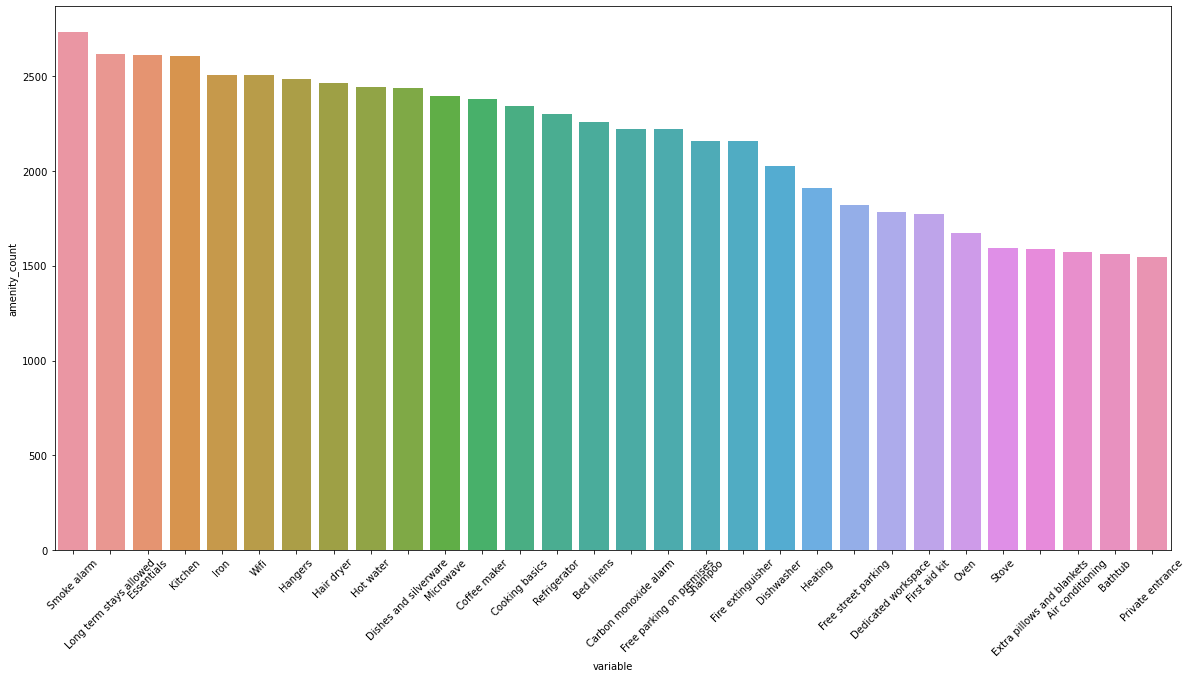

In [138]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=dal_amenities_df, x="variable", y="amenity_count", ax = ax)
plt.xticks(rotation=45)
plt.show()

Listings with higher prices tended to have lower ratings and there was no distinct correlaion between price and booking. However, there was a positive relationship between days booked and the ratings and number of reviews a listing received. Additionally, the top amenities included a coffee maker, dishes and silverware, cooking basics, and microwaves. This suggests that people who book or live in the area value being able to cook for themselves as many listings include amenities related to cooking. 

#### LV GRAPHS

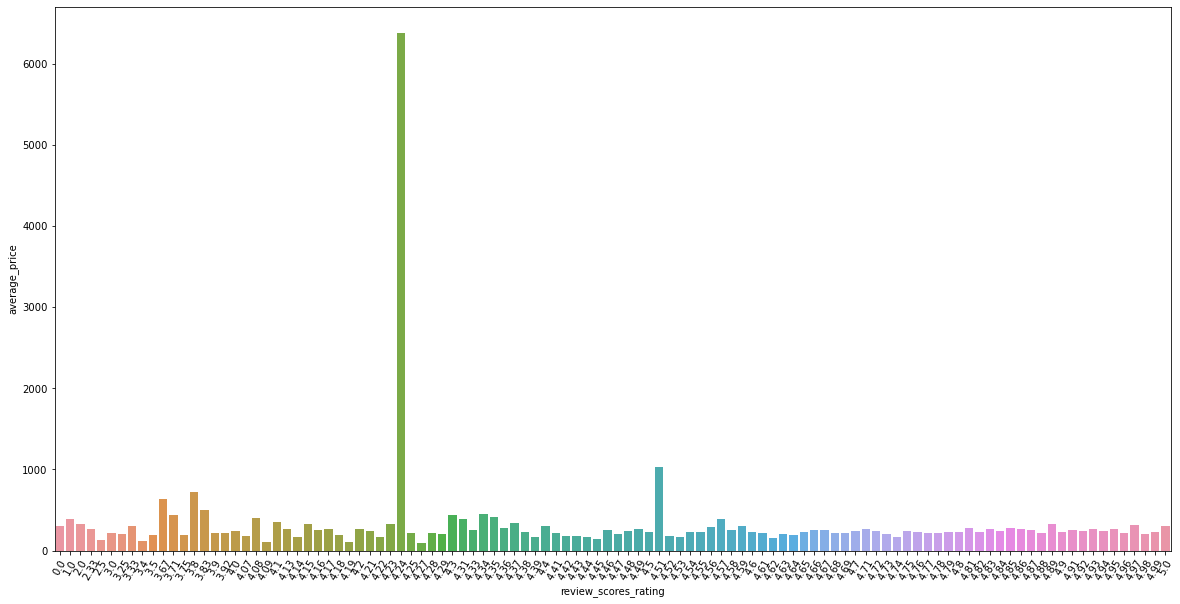

In [139]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=lv_price_reviews_df, x="review_scores_rating", y="average_price", ax = ax)
plt.xticks(rotation=60)
plt.show()

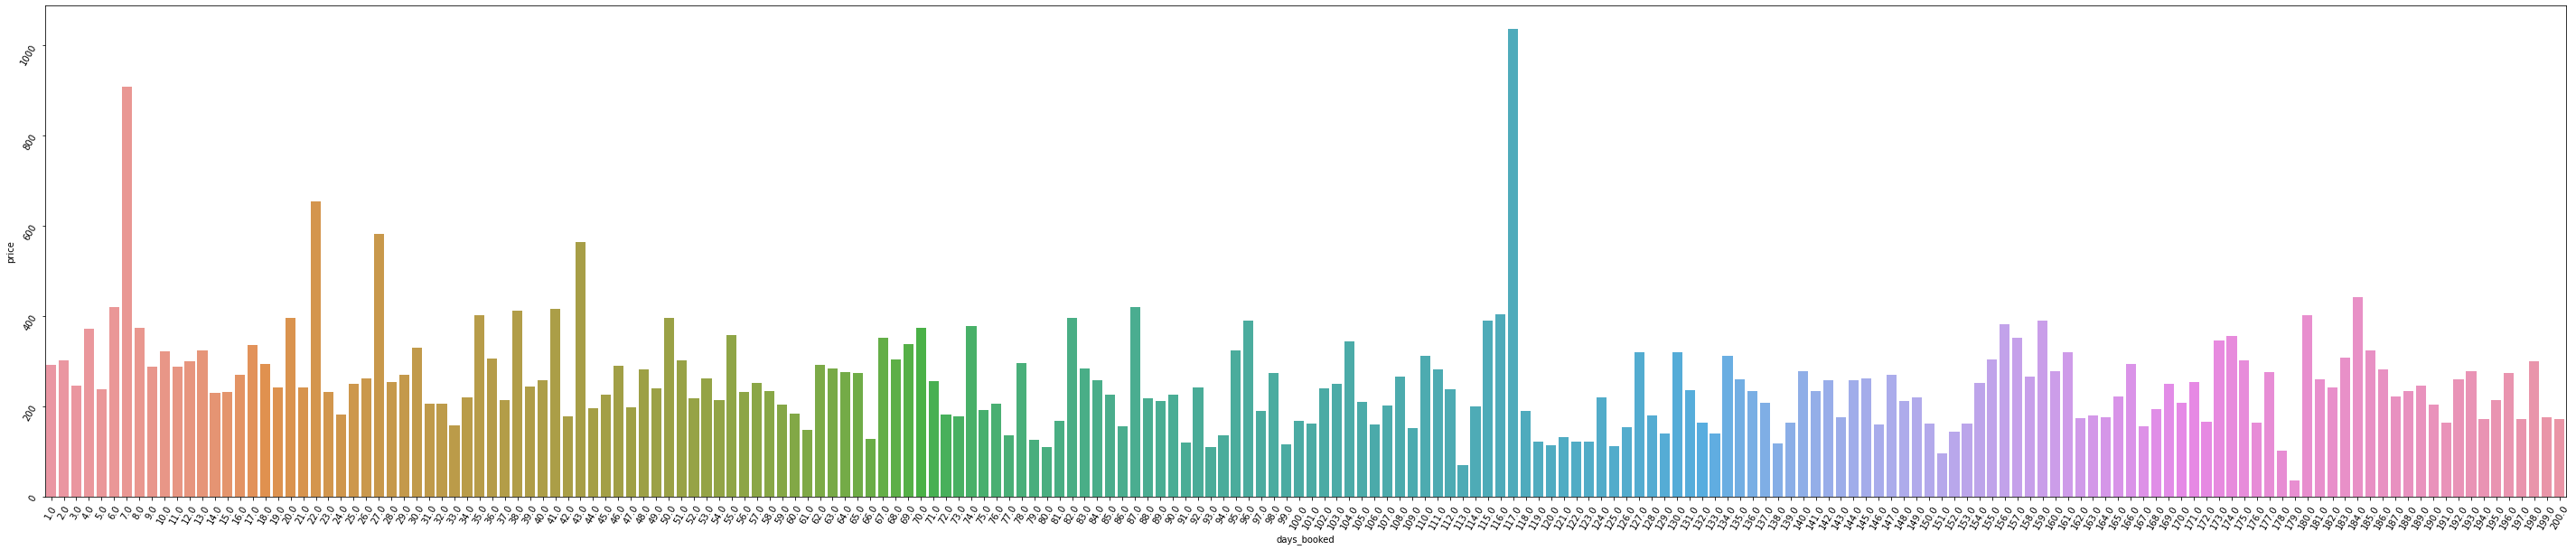

In [140]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=lv_price_booking_df_1, x="days_booked", y="price", ci=None, ax = ax)
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

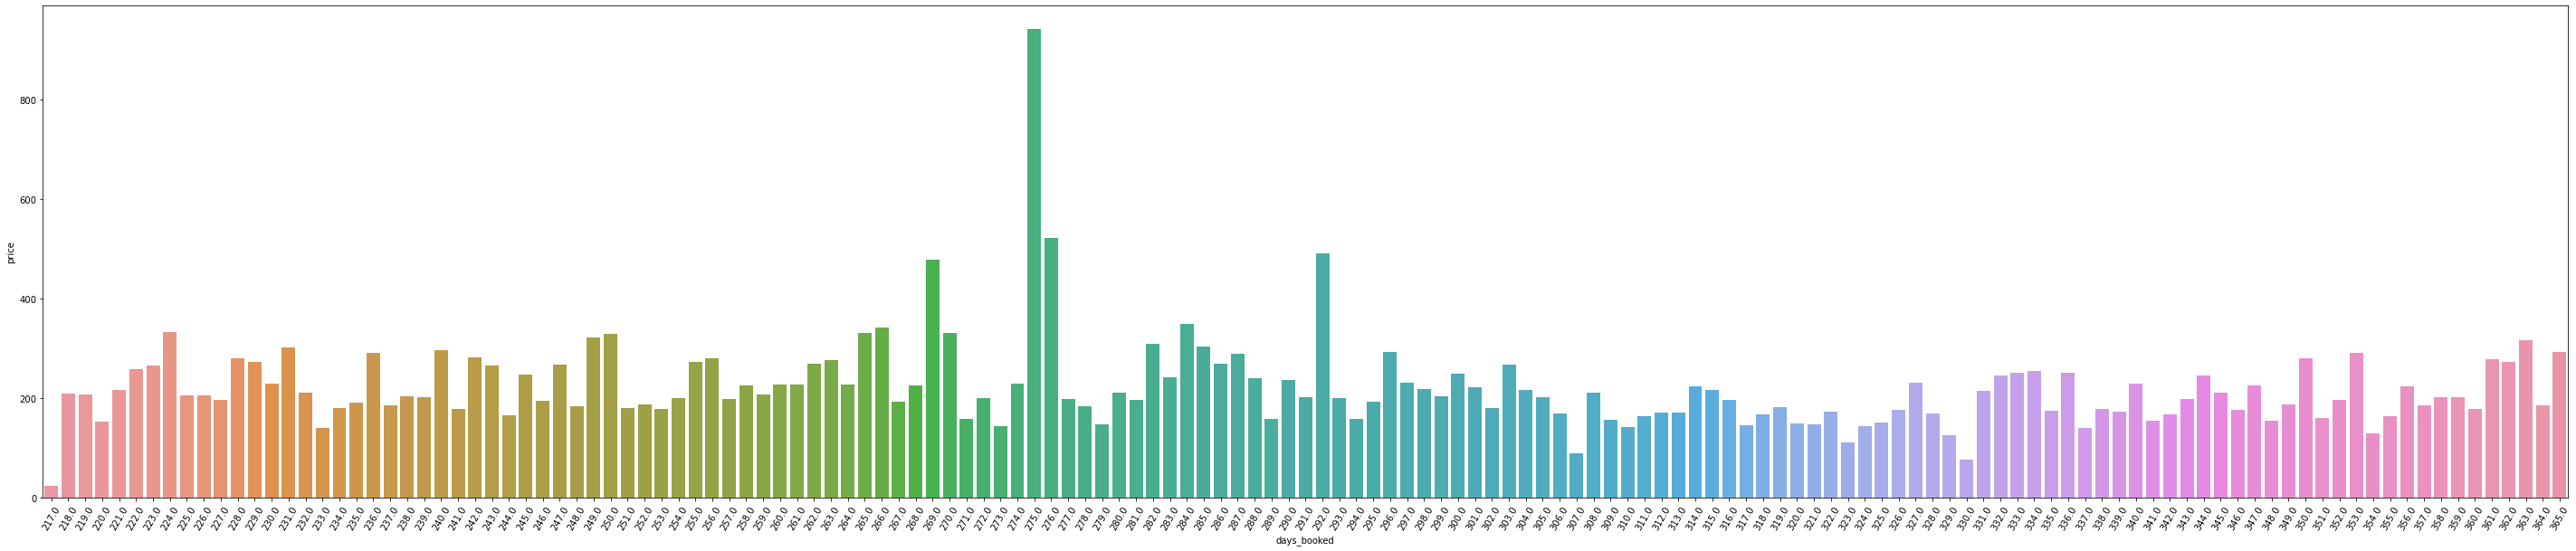

In [141]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=lv_price_booking_df_2, x="days_booked", y="price", ci = None, ax = ax)
plt.xticks(rotation=60)
plt.show()

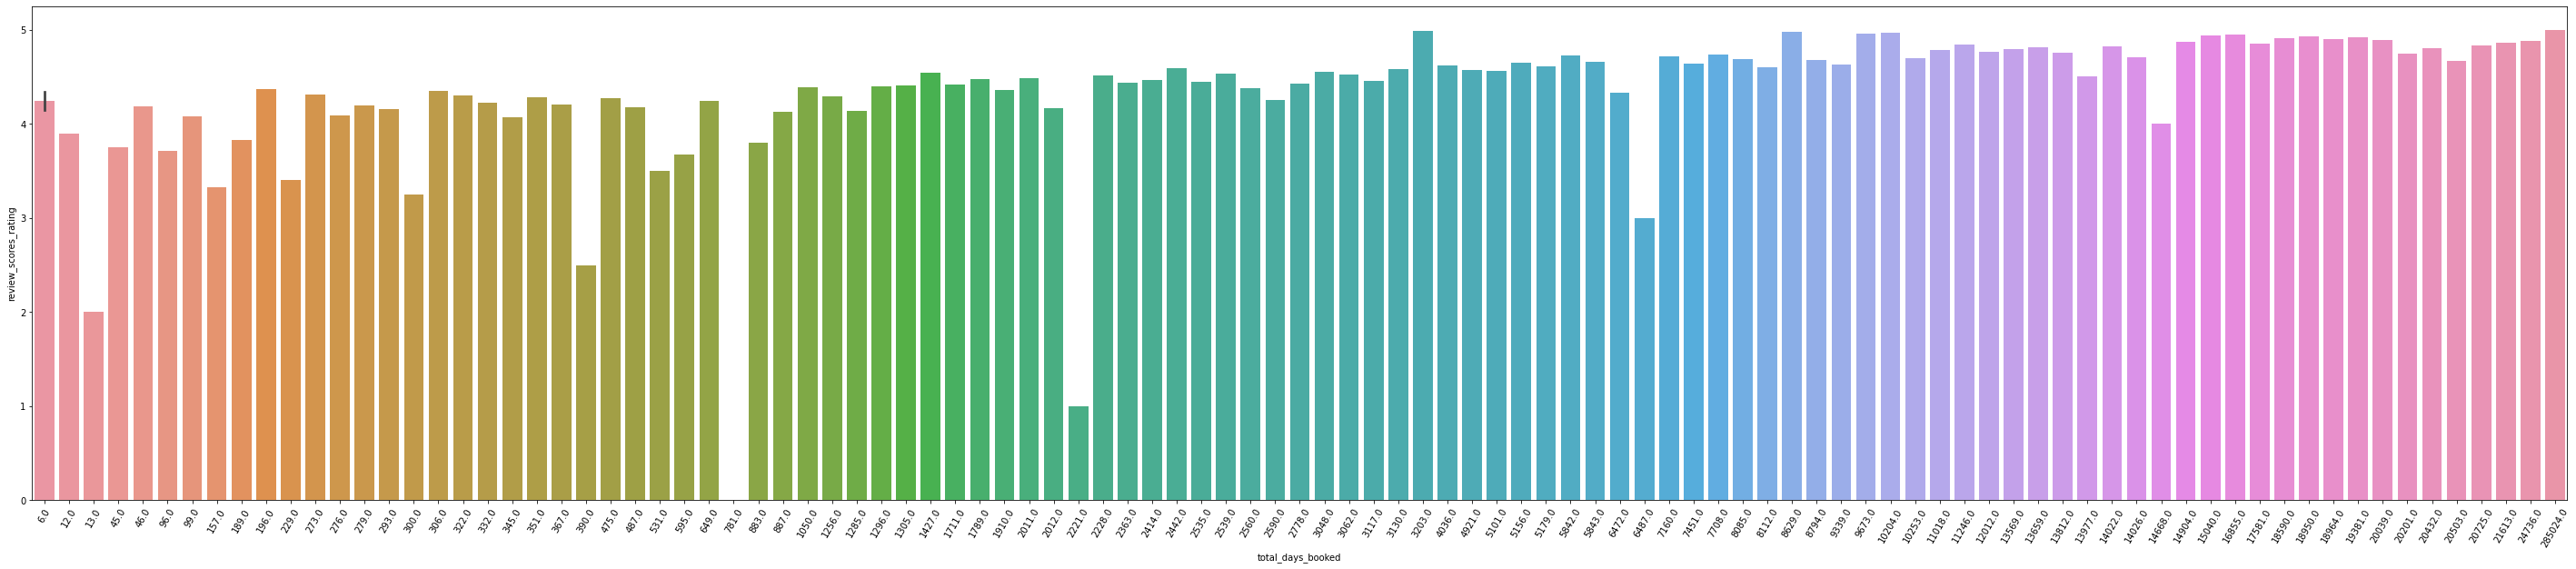

In [142]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=lv_review_booking_df, x="total_days_booked", y="review_scores_rating", ax = ax)
plt.xticks(rotation=60)
plt.show()

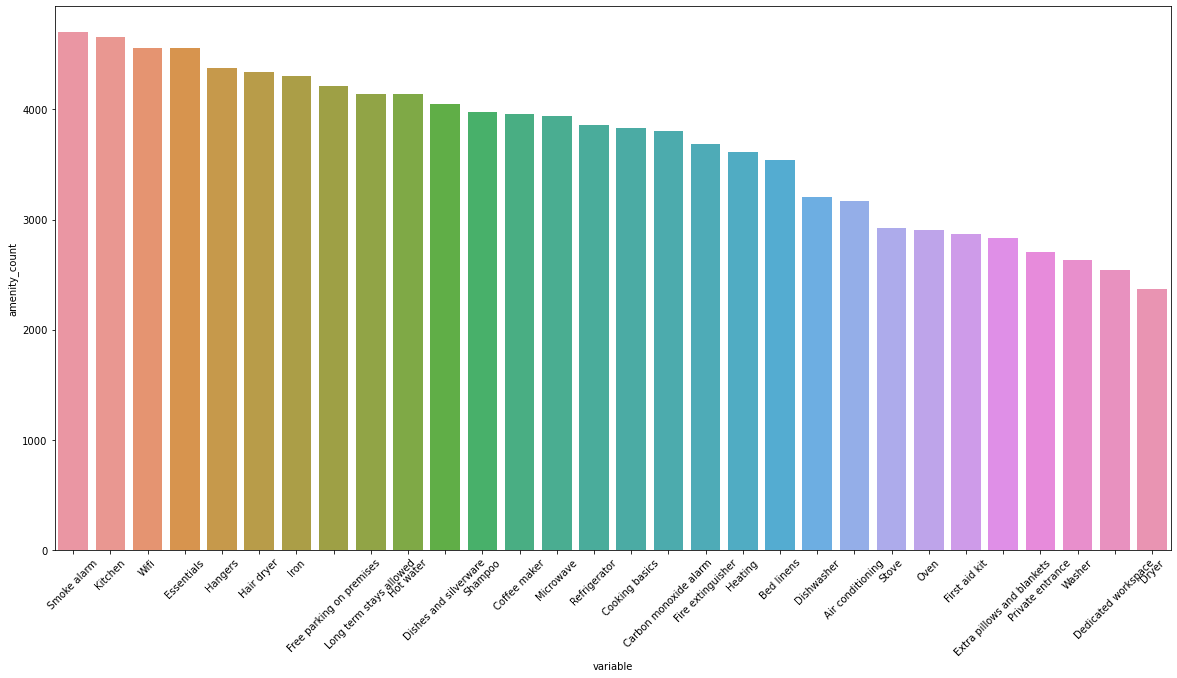

In [143]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=lv_amenities_df, x="variable", y="amenity_count", ax = ax)
plt.xticks(rotation=45)
plt.show()

There are higher ratings when the price is around 300 dollars a night. This pricing is higher than other city we have seen so far, suggesting that the people traveling to Las Vegas tend to have higher expendible income. There is a higher number of bookings when the listing is priced at 200-300 dollars and lower amounts of bookings when priced around 600 dollars a night. There is a positive relationship between booking and ratings so the higher number of bookings a listing has, the higher the ratings it receives. This correlation is less strong compared to the other cities we've examined. The top amenities are smoke alarms, essentials, hangers and kitchen. These top amenities are similar to the ones we've seen in DC. 

#### LA GRAPHS

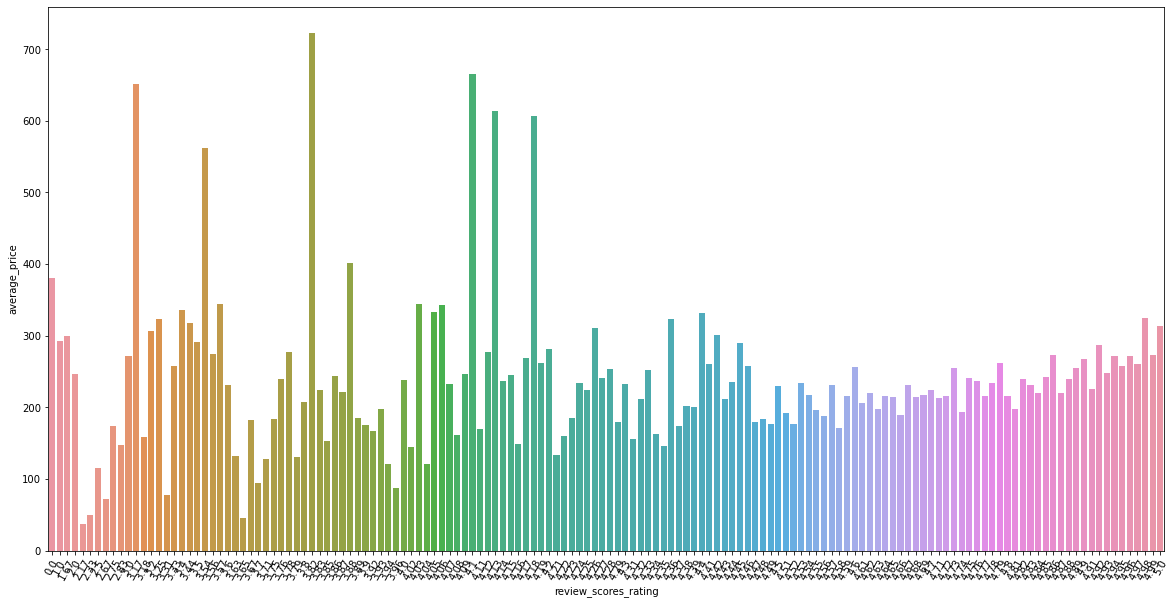

In [144]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=la_price_reviews_df, x="review_scores_rating", y="average_price", ax = ax)
plt.xticks(rotation=60)
plt.show()

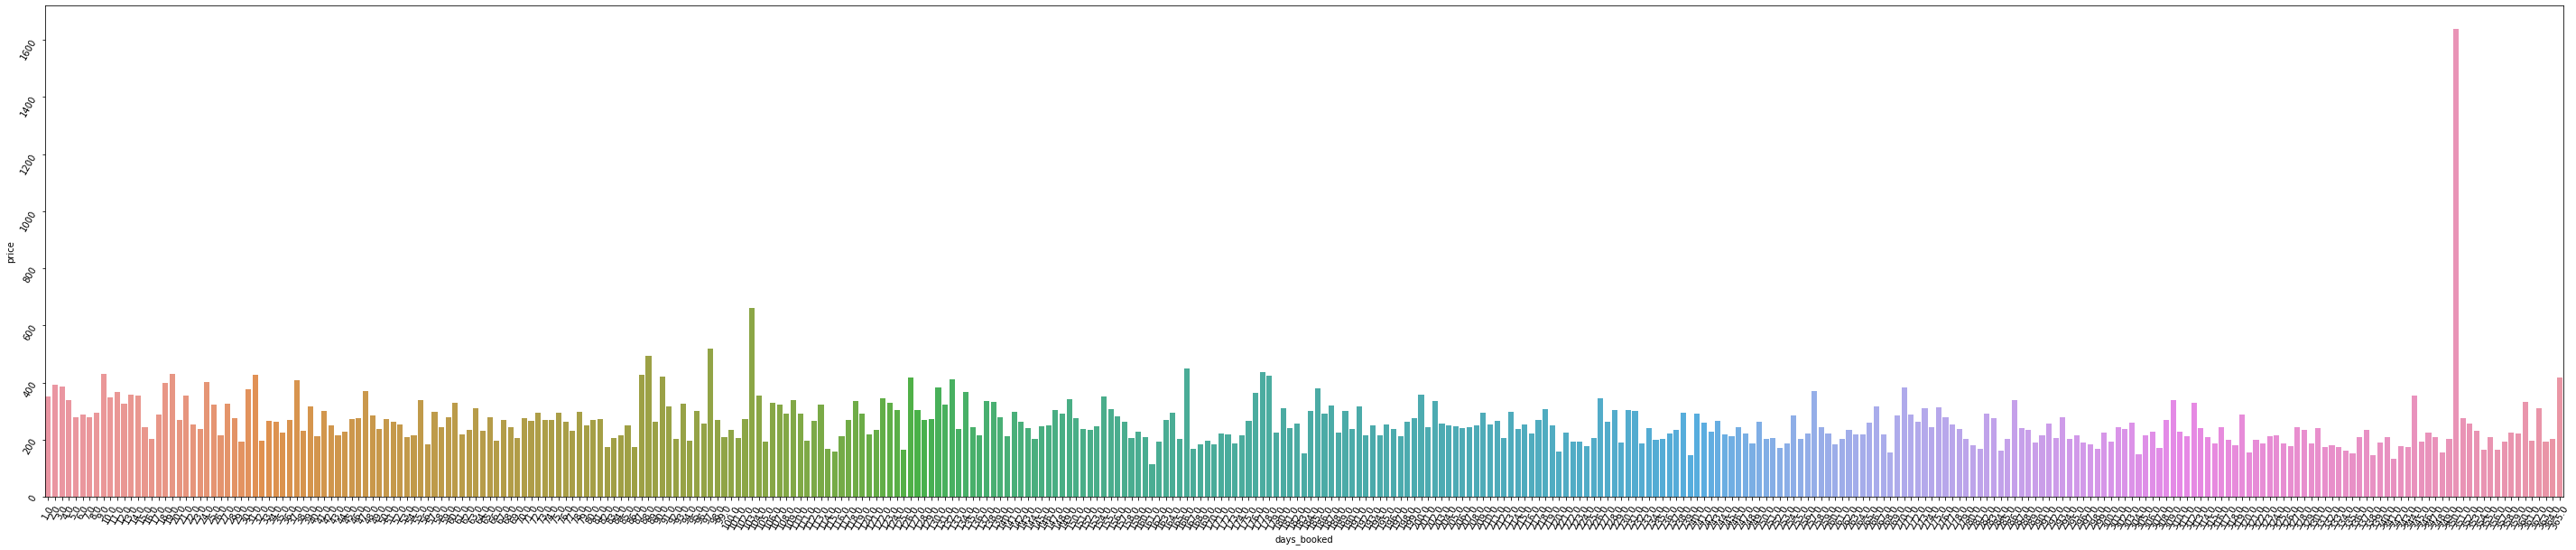

In [145]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=la_price_booking_df_1, x="days_booked", y="price", ci=None, ax = ax)
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

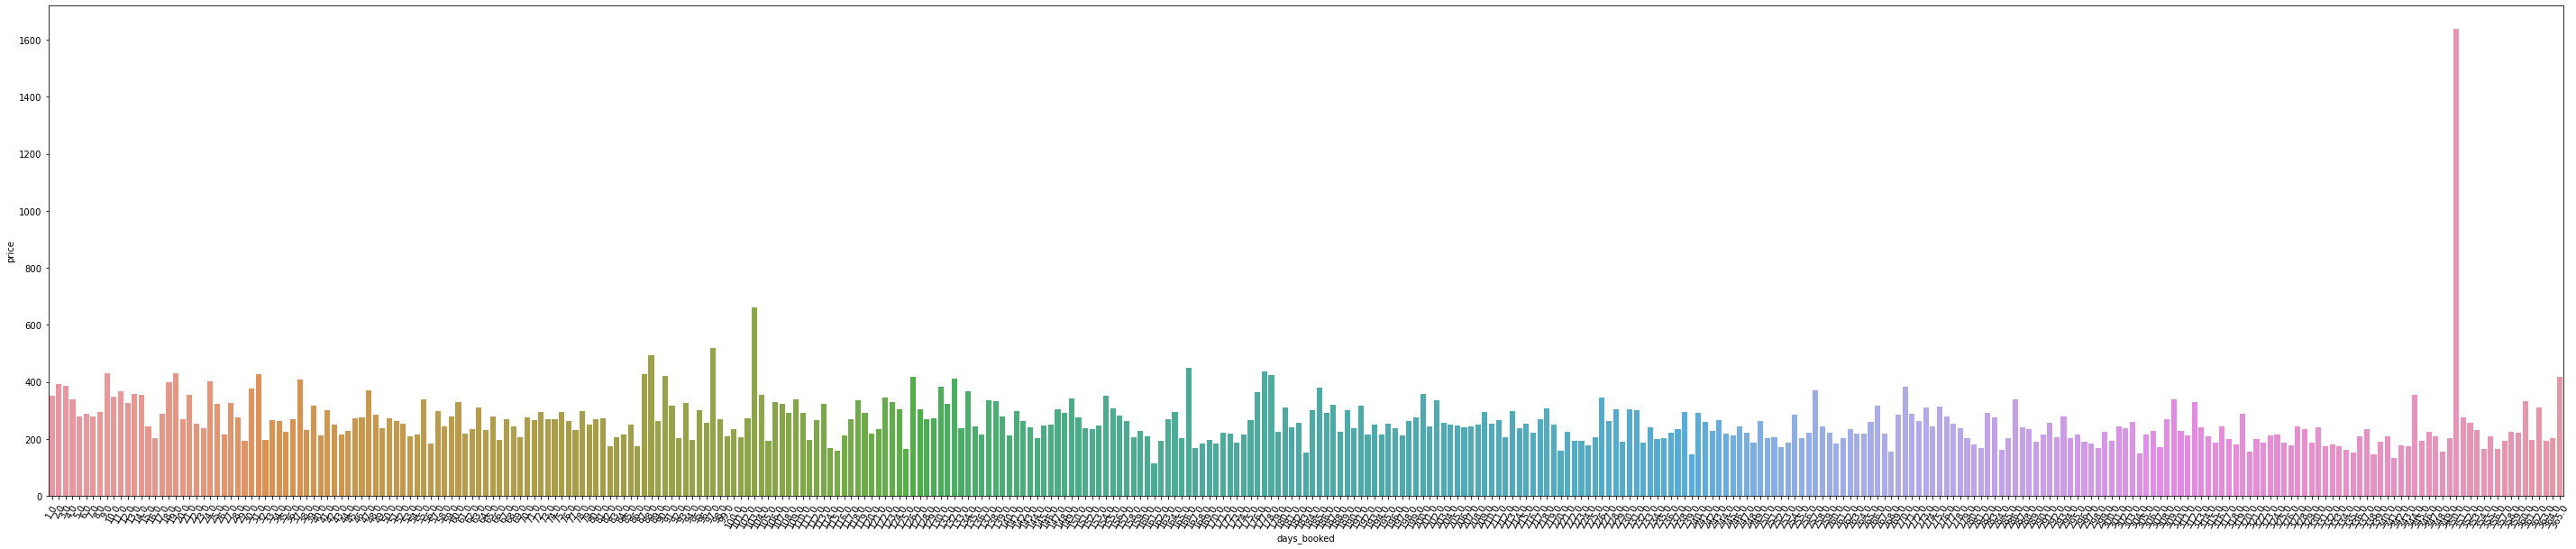

In [146]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=la_price_booking_df_2, x="days_booked", y="price", ci = None, ax = ax)
plt.xticks(rotation=60)
plt.show()

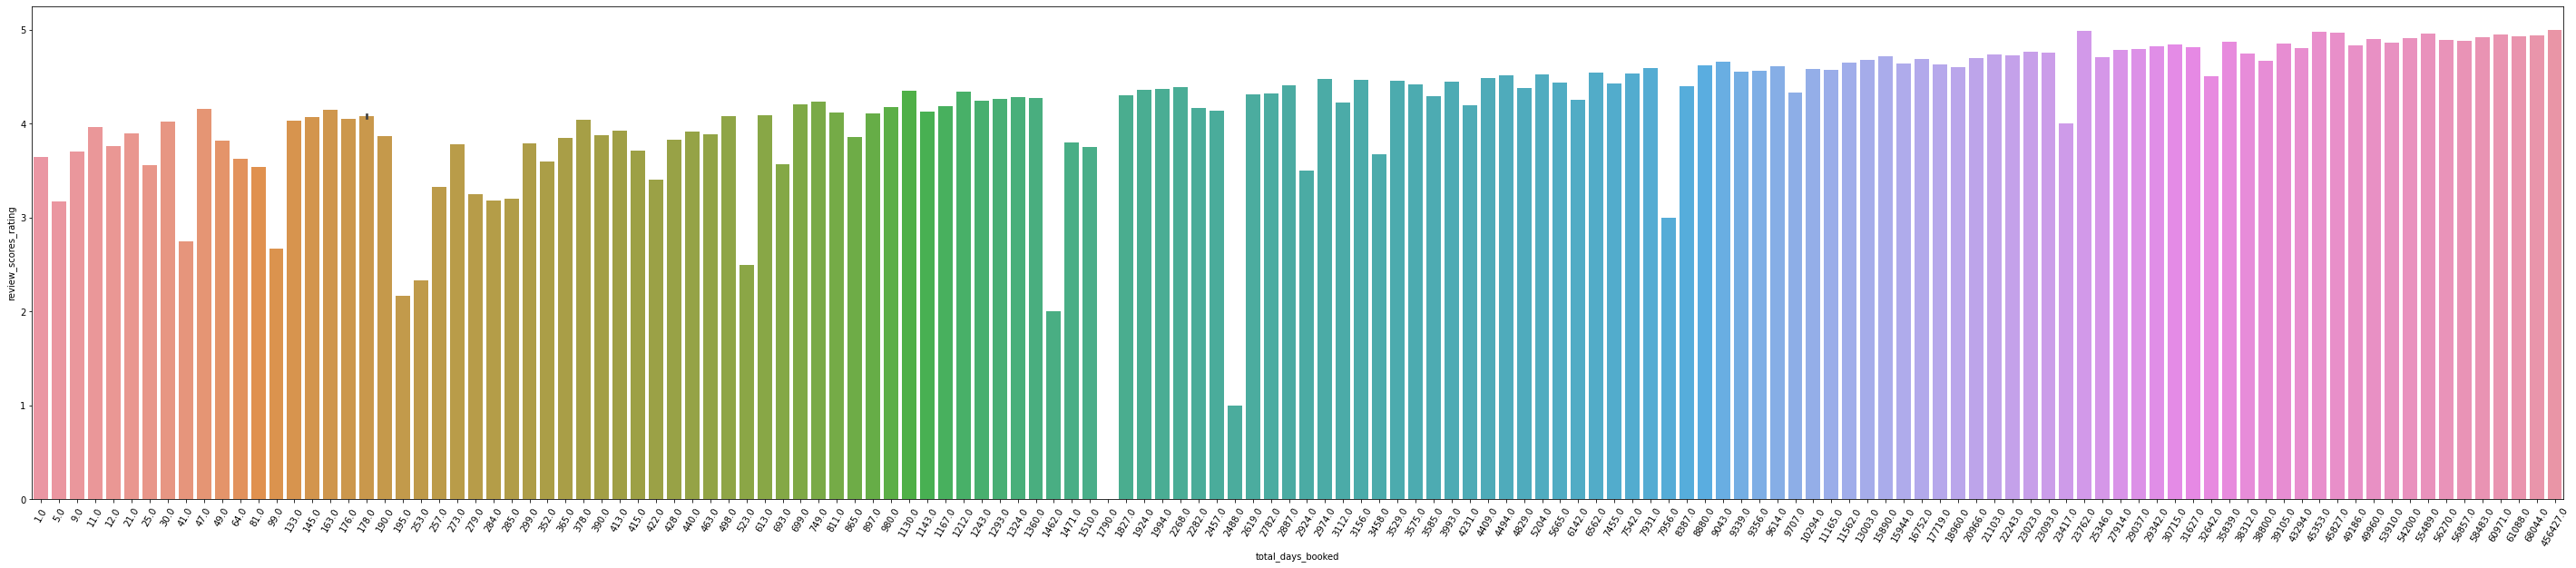

In [147]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=la_review_booking_df, x="total_days_booked", y="review_scores_rating", ax = ax)
plt.xticks(rotation=60)
plt.show()

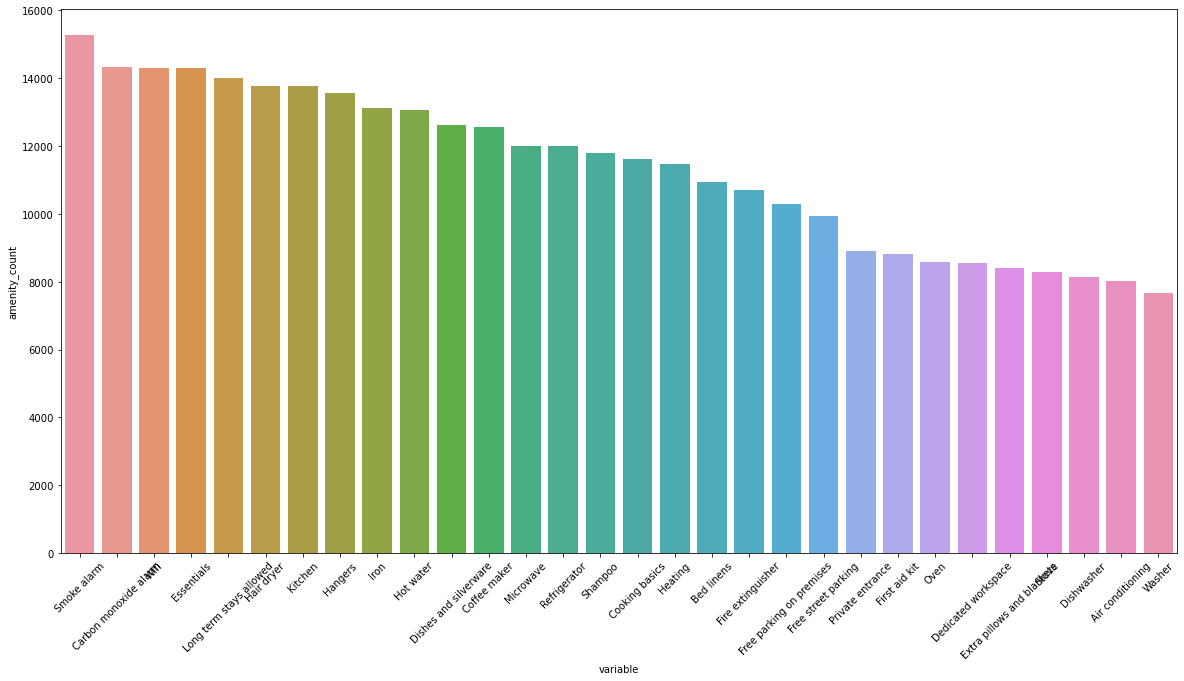

In [148]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=la_amenities_df, x="variable", y="amenity_count", ax = ax)
plt.xticks(rotation=45)
plt.show()

There are higher ratings when the price is at 250 dollars at night and lower when the price is above 300 dollars. There is a higher number of days booked when the listing is around 200-300 dollars a night. Again, these prices are higher than the listings on east coast, suggesting that people traveling to Los Angeles have a higher expendible income. There is again a positive relationship again between bookings and ratings, so more bookings for a listing have higher ratings. The more valuable amenities in LA are smoke alarms, essentials, hangers, and kitchen whie wash and dryer, extra pillows and blankets, and workspace are less essential in LA. Therefore, since workspace is less common in LA, this could suggest that most people traveling to LA may not traveling there for work related reasons and are mostly traveling there for more personal reasons. 

#### NSH GRAPHS

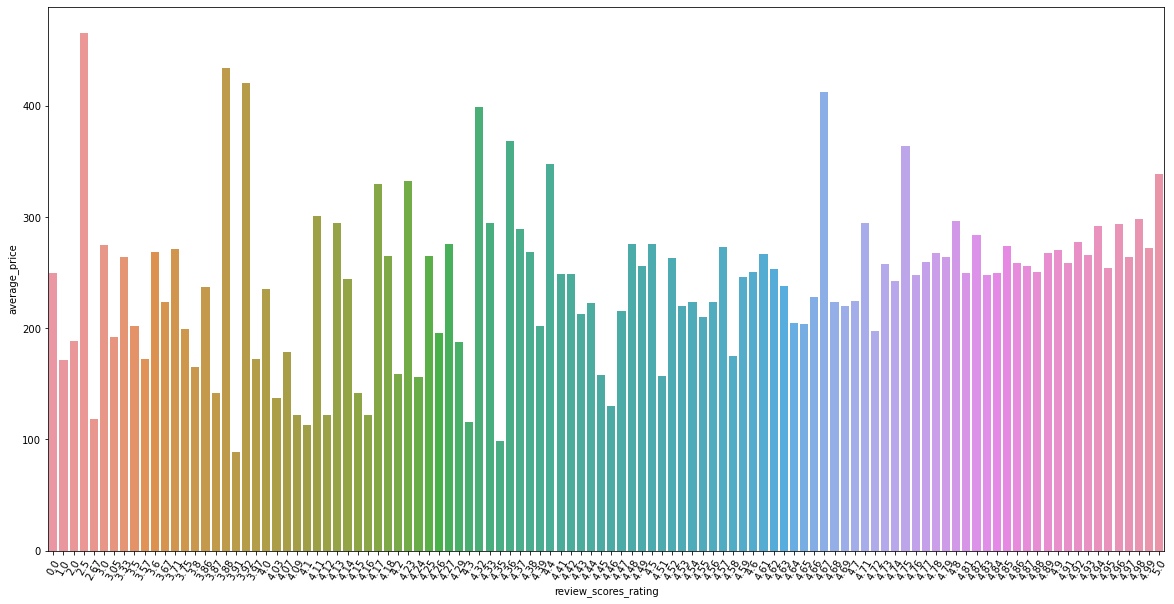

In [149]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=nsh_price_reviews_df, x="review_scores_rating", y="average_price", ax = ax)
plt.xticks(rotation=60)
plt.show()

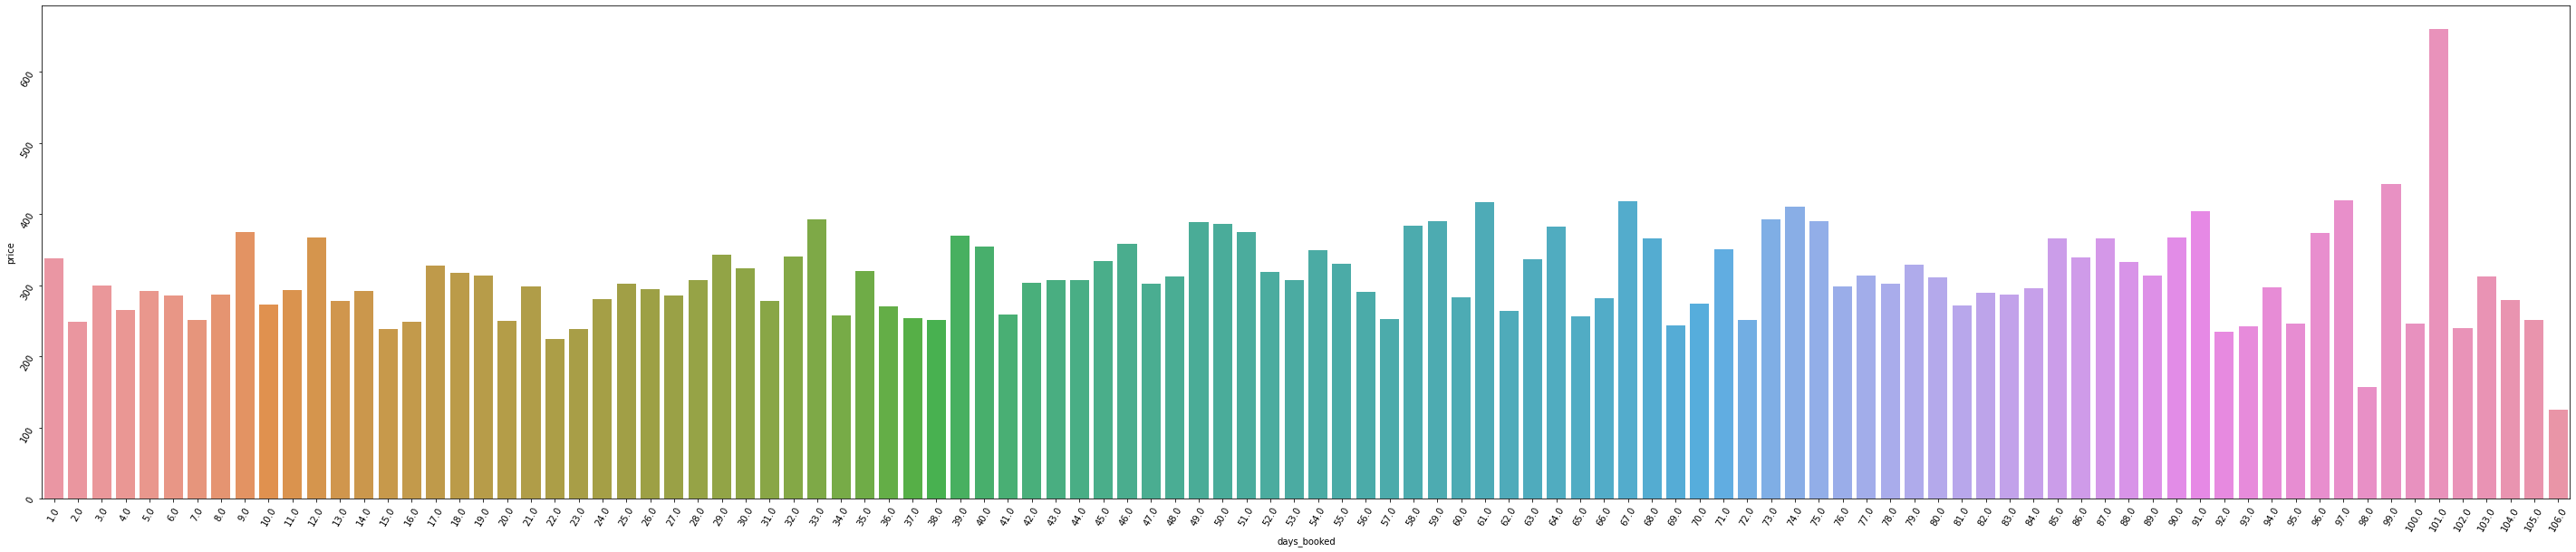

In [150]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=nsh_price_booking_df_1, x="days_booked", y="price", ci=None, ax = ax)
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

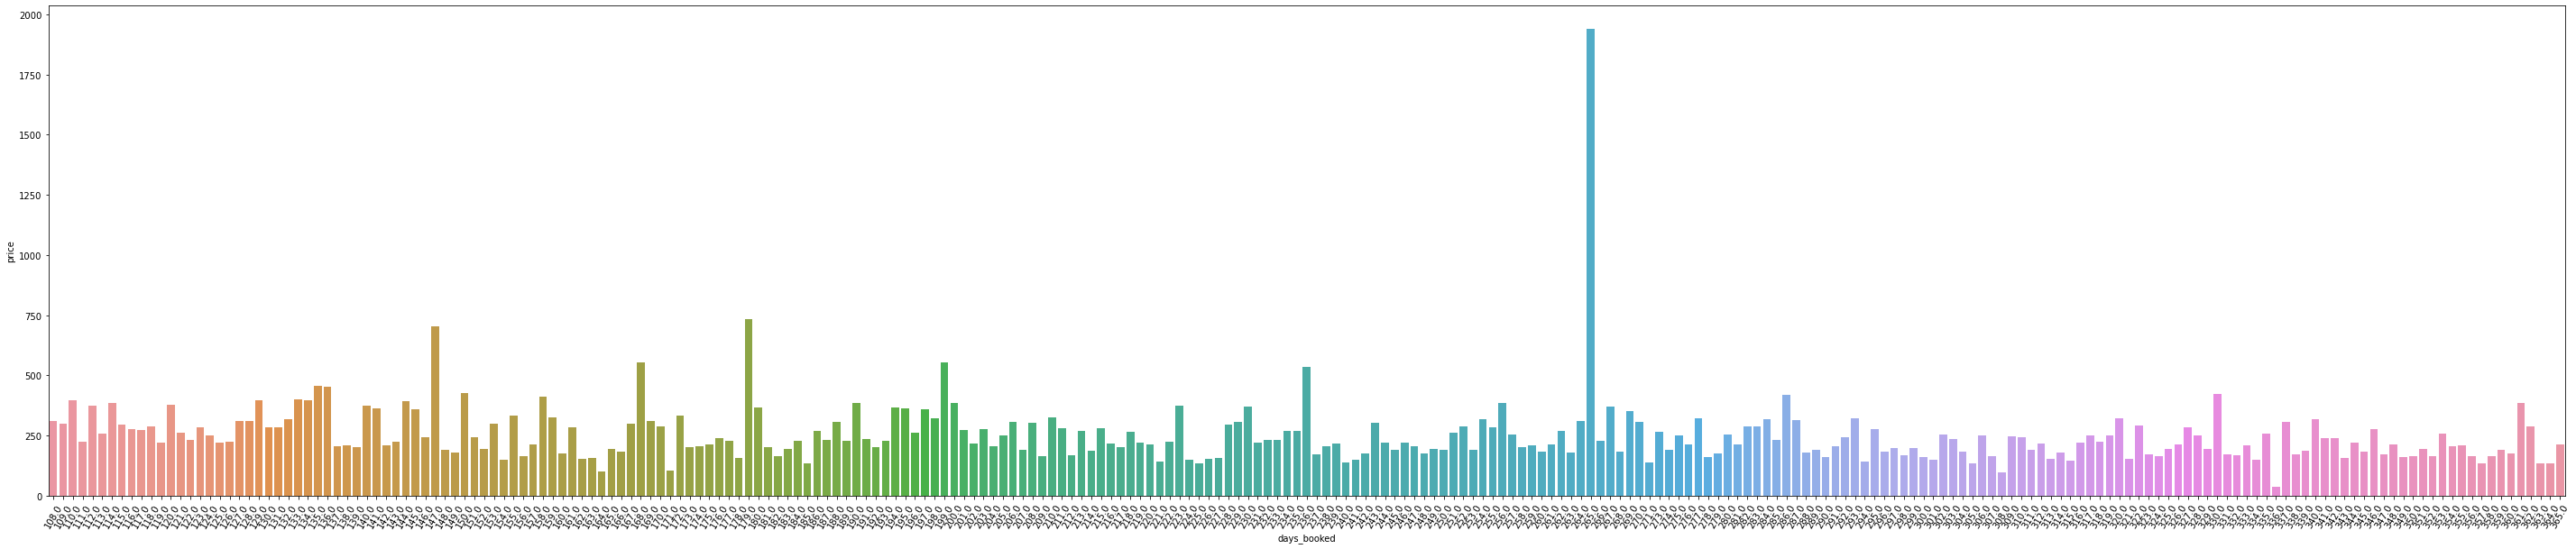

In [151]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=nsh_price_booking_df_2, x="days_booked", y="price", ci = None, ax = ax)
plt.xticks(rotation=60)
plt.show()

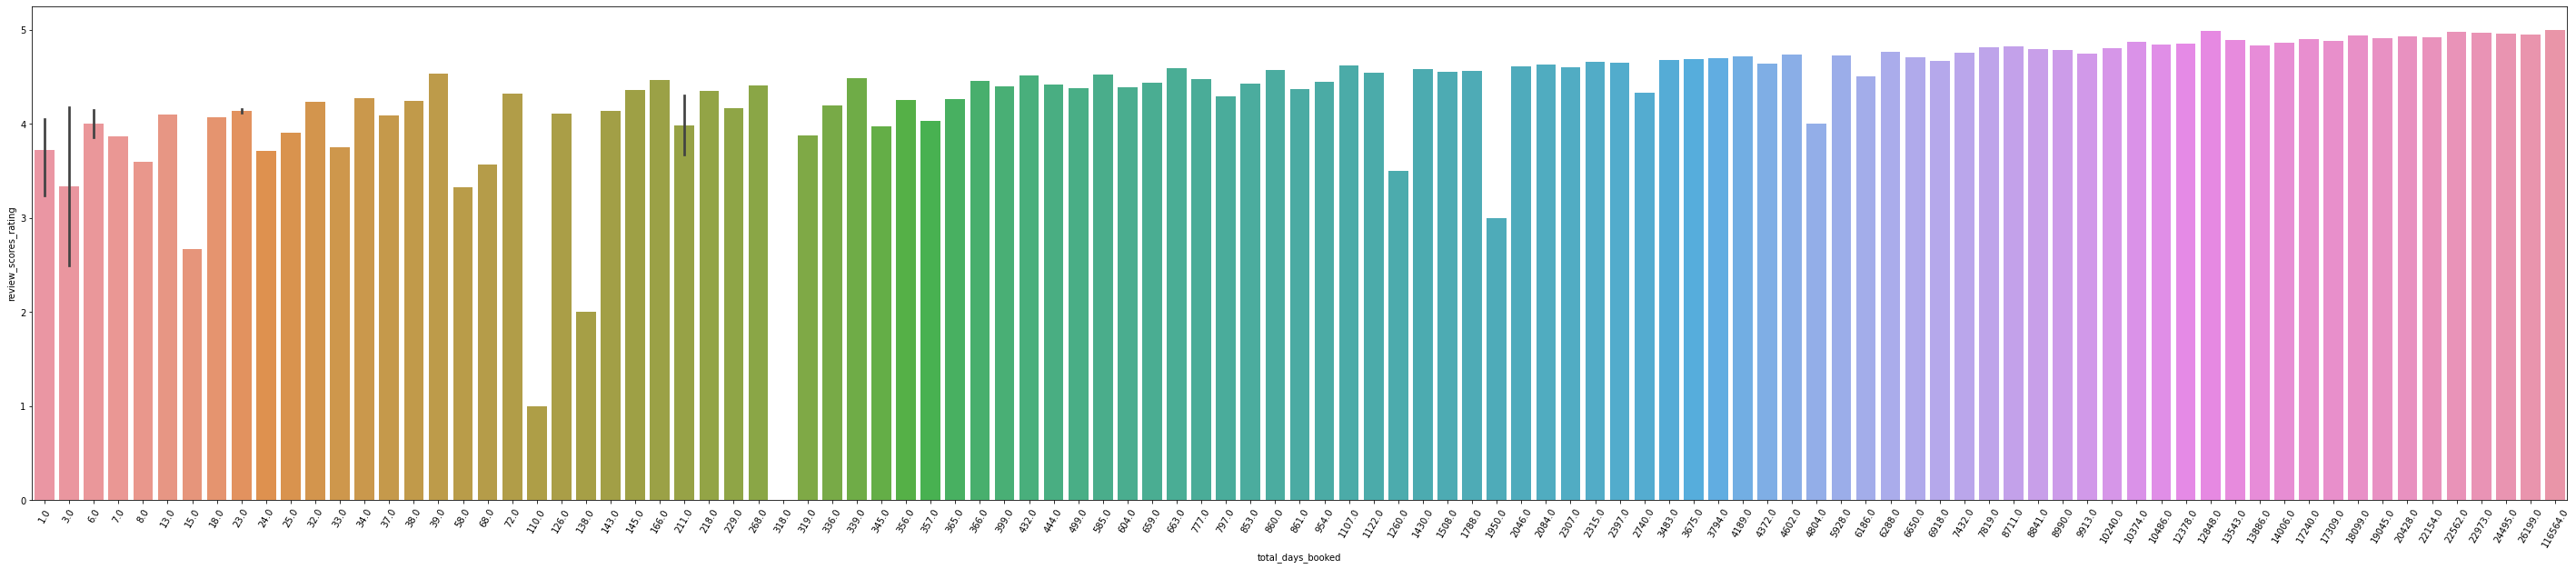

In [152]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=nsh_review_booking_df, x="total_days_booked", y="review_scores_rating", ax = ax)
plt.xticks(rotation=60)
plt.show()

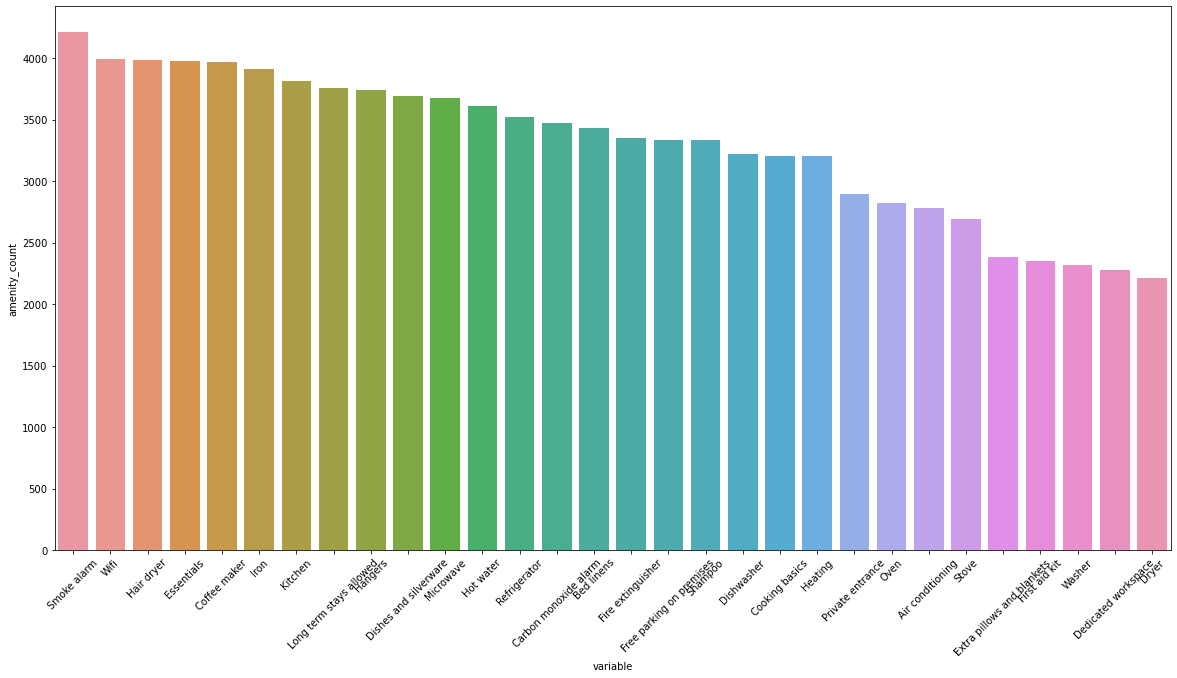

In [153]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=nsh_amenities_df, x="variable", y="amenity_count", ax = ax)
plt.xticks(rotation=45)
plt.show()

Consumers in Nashville tend to have a relatively higher attraction towards pricier Airbnbs compared to northern cities, shown by the highly rated reviews associated with listings priced at around $250 a night. Additionally, one of the highest numbers of amenities amongst Nashville listings are coffee makers, kitchens, and dishware, which is similar to Dallas. This points towards similarities between the two consumers of valuing cooking for themselves in their Airbnbs. 

#### MSP GRAPHS

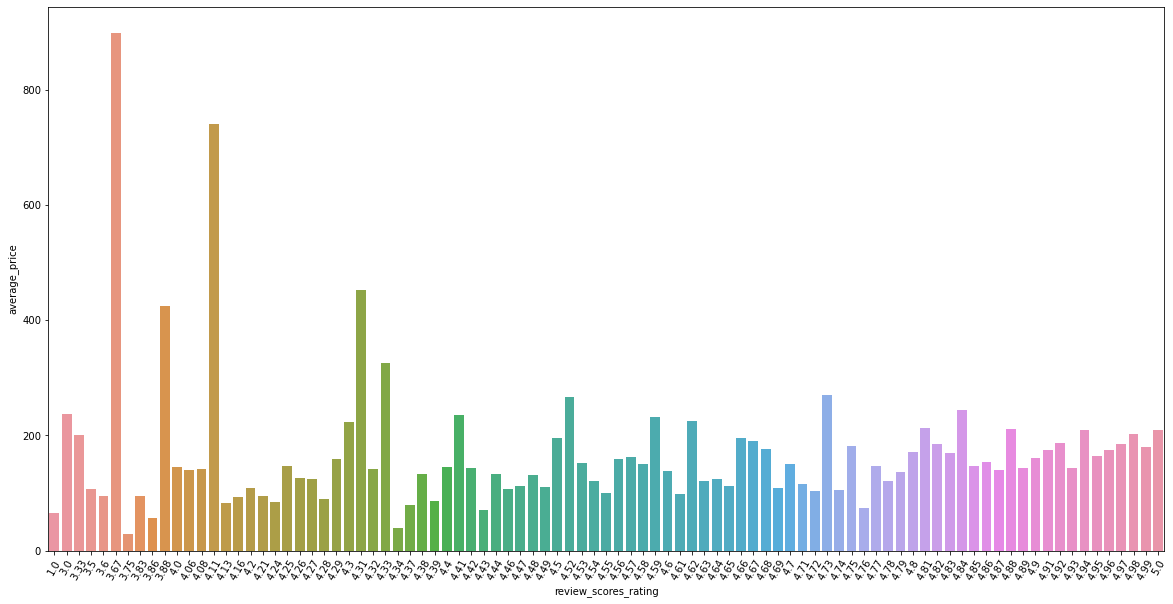

In [154]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=msp_price_reviews_df, x="review_scores_rating", y="average_price", ax = ax)
plt.xticks(rotation=60)
plt.show()

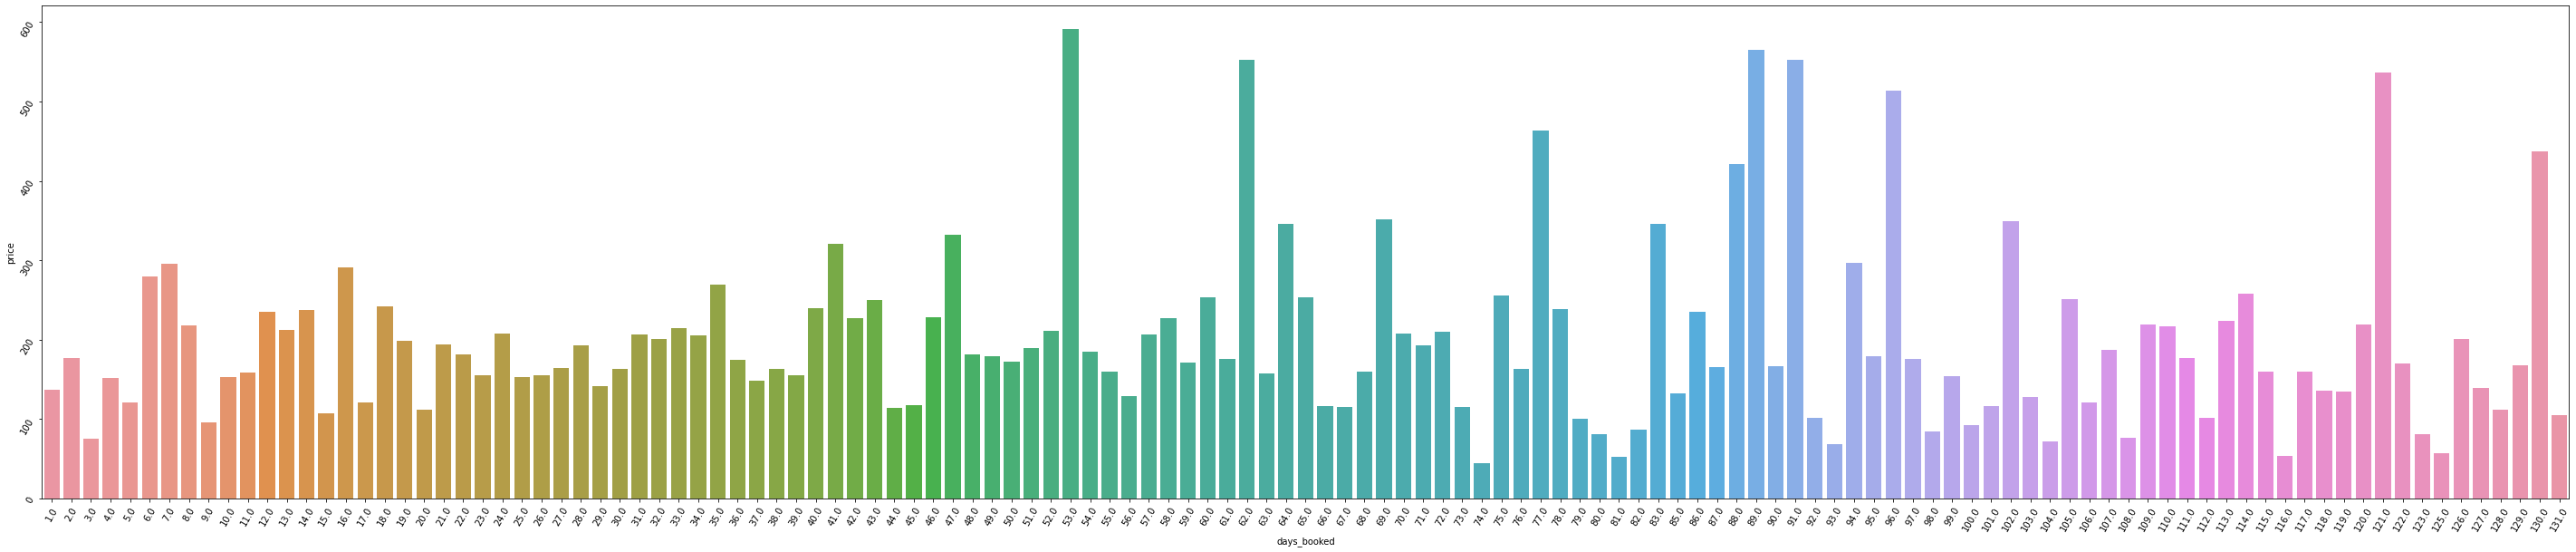

In [155]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=msp_price_booking_df_1, x="days_booked", y="price", ci=None, ax = ax)
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()

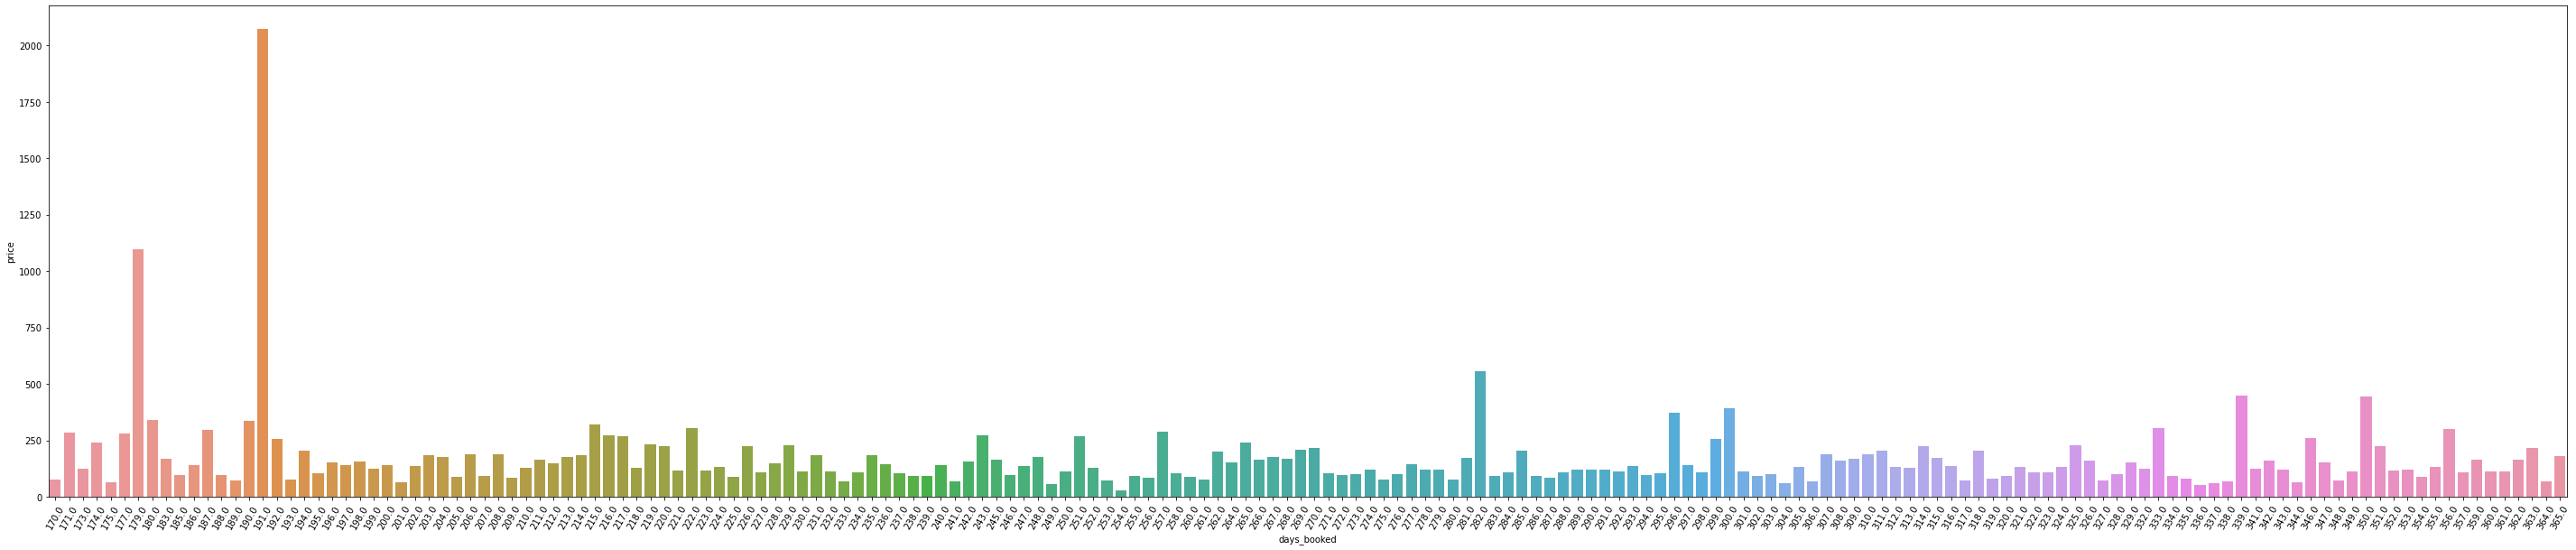

In [156]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=msp_price_booking_df_2, x="days_booked", y="price", ci = None, ax = ax)
plt.xticks(rotation=60)
plt.show()

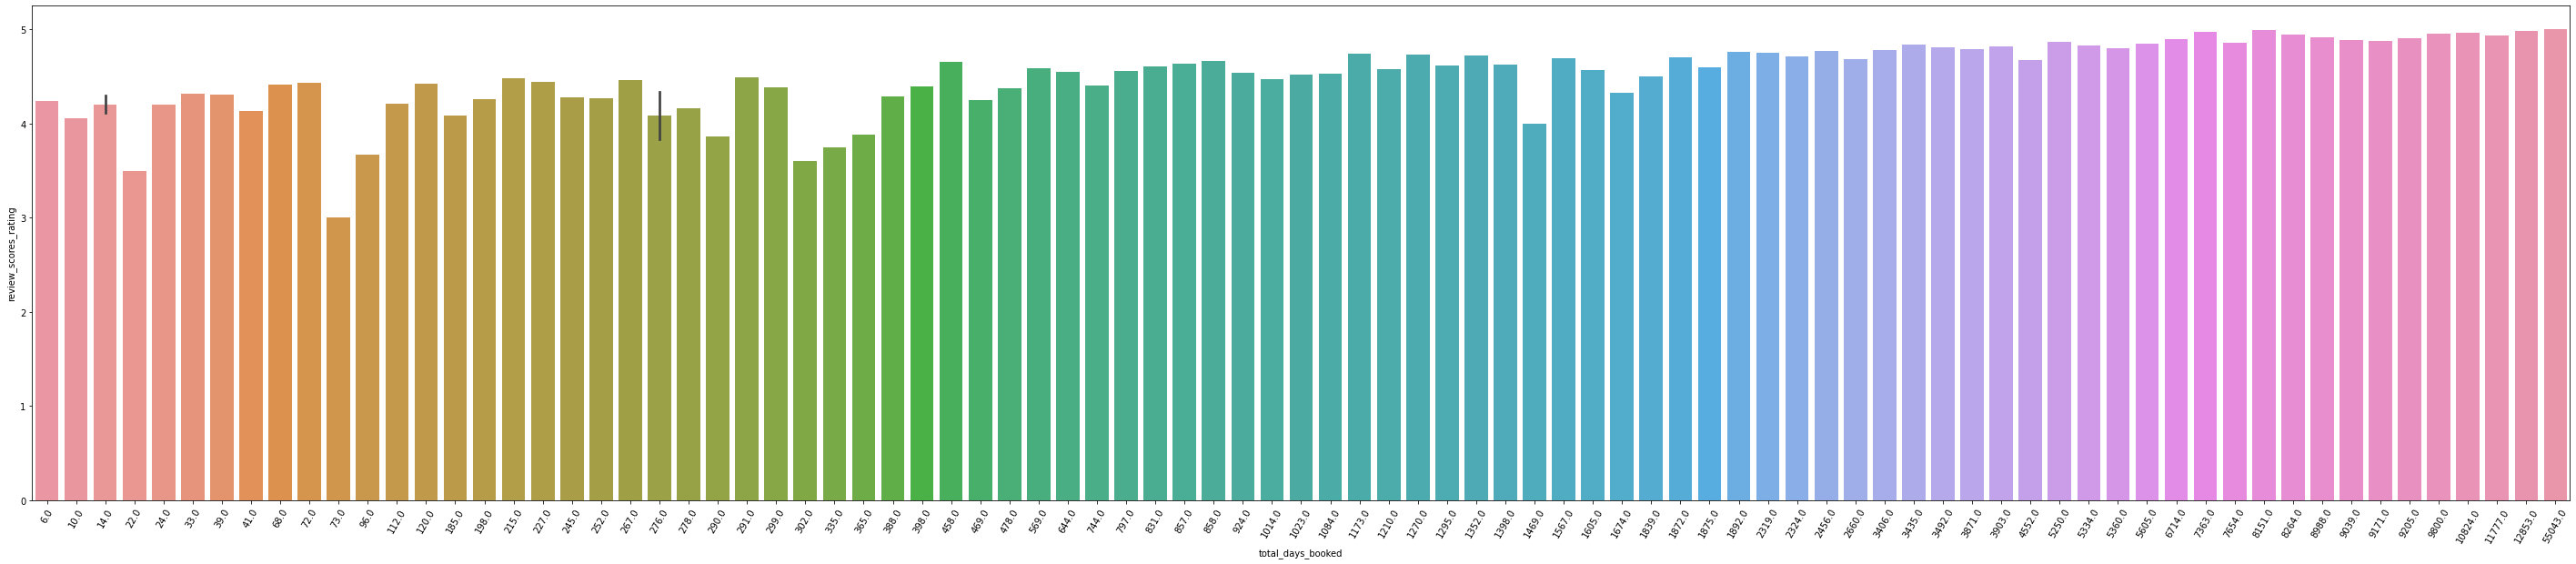

In [157]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.barplot(data=msp_review_booking_df, x="total_days_booked", y="review_scores_rating", ax = ax)
plt.xticks(rotation=60)
plt.show()

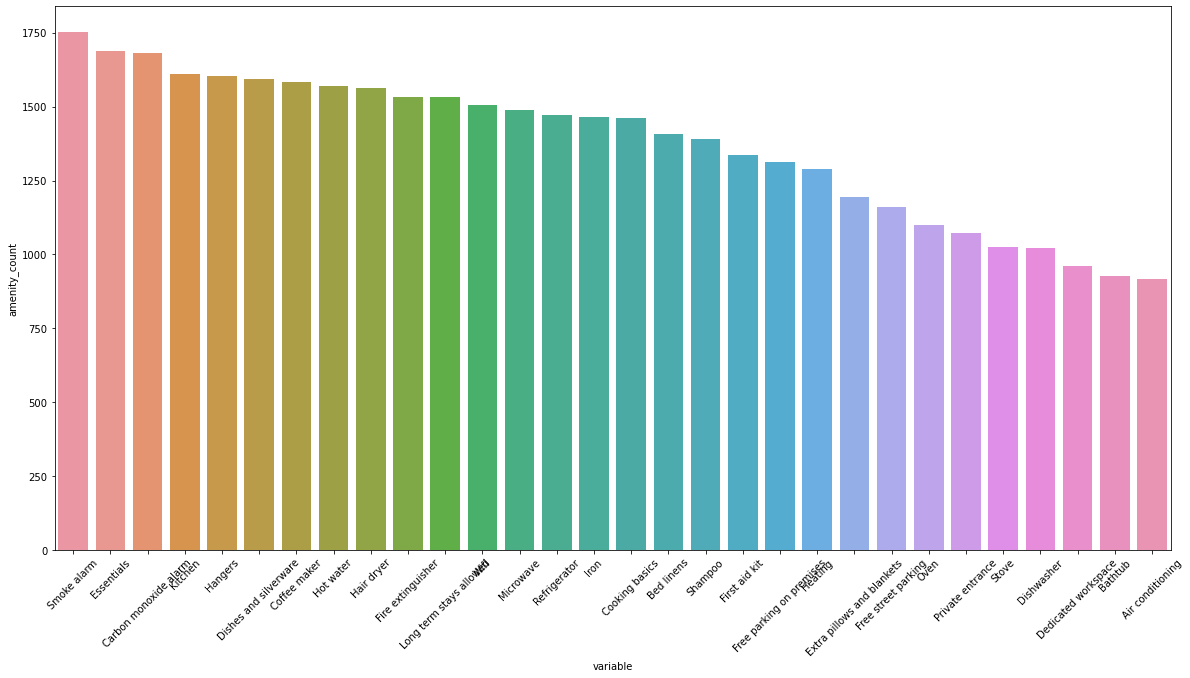

In [158]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=msp_amenities_df, x="variable", y="amenity_count", ax = ax)
plt.xticks(rotation=45)
plt.show()

The Twin Cities consumers have a relatively lower attraction to pricier Airbnbs, shown by the highest rated reviews associated with listings prices that are just under $200. Moreover, the least frequent amenity in the Twin Cities listings is air conditioning, potentially pointing towards the older qualities of the listings and that consumers are likely to be accustomed to colder weather.  

<AxesSubplot:xlabel='price', ylabel='City'>

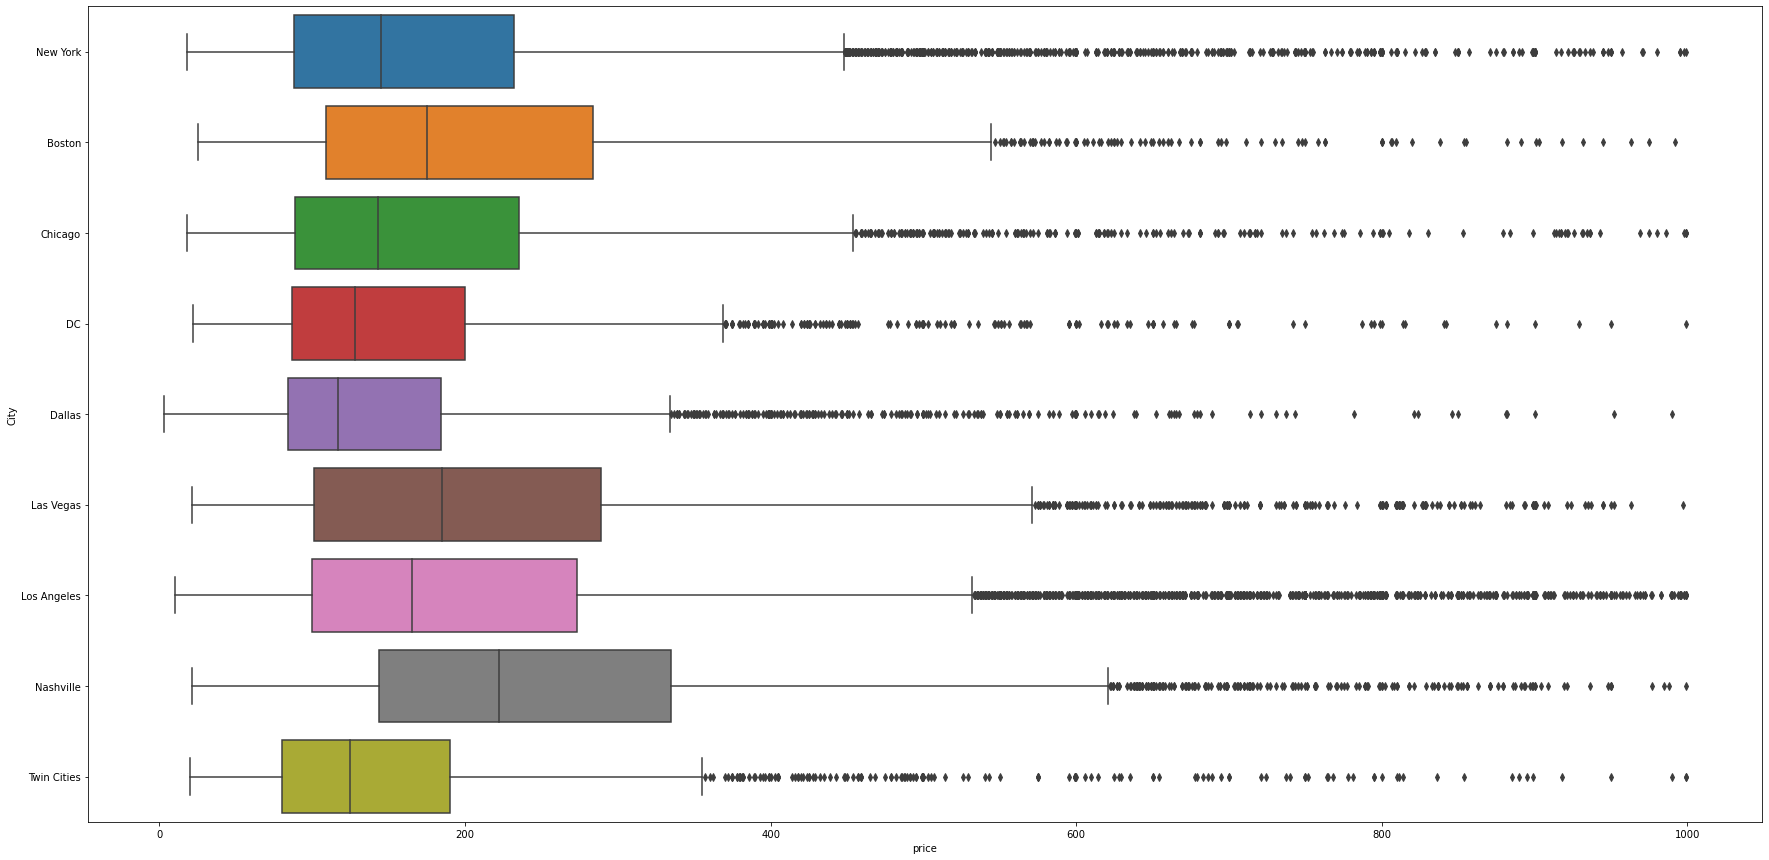

In [162]:
# PRICE ANALYSIS FOR ALL CITIES

# nyc prices mini df
nyc_price_df = pd.DataFrame(nyc_listings_df["price"]).sort_values(by="price", ascending=True)
nyc_list = ['New York'] * len(nyc_listings_df["price"])
nyc_price_df['City'] = nyc_list
nyc_price_df.drop(nyc_price_df[nyc_price_df['price'] >= 1000].index, inplace = True)

# bos prices mini df
bos_price_df = pd.DataFrame(bos_listings_df["price"]).sort_values(by="price", ascending=True)
bos_list = ['Boston'] * len(bos_listings_df["price"])
bos_price_df['City'] = bos_list
bos_price_df.drop(bos_price_df[bos_price_df['price'] >= 1000].index, inplace = True)

# chi prices mini df
chi_price_df = pd.DataFrame(chi_listings_df["price"]).sort_values(by="price", ascending=True)
chi_list = ['Chicago'] * len(chi_listings_df["price"])
chi_price_df['City'] = chi_list
chi_price_df.drop(chi_price_df[chi_price_df['price'] >= 1000].index, inplace = True)

# dc prices mini df
dc_price_df = pd.DataFrame(dc_listings_df["price"]).sort_values(by="price", ascending=True)
dc_list = ['DC'] * len(dc_listings_df["price"])
dc_price_df['City'] = dc_list
dc_price_df.drop(dc_price_df[dc_price_df['price'] >= 1000].index, inplace = True)

# dal prices mini df
dal_price_df = pd.DataFrame(dal_listings_df["price"]).sort_values(by="price", ascending=True)
dal_list = ['Dallas'] * len(dal_listings_df["price"])
dal_price_df['City'] = dal_list
dal_price_df.drop(dal_price_df[dal_price_df['price'] >= 1000].index, inplace = True)

# lv prices mini df
lv_price_df = pd.DataFrame(lv_listings_df["price"]).sort_values(by="price", ascending=True)
lv_list = ['Las Vegas'] * len(lv_listings_df["price"])
lv_price_df['City'] = lv_list
lv_price_df.drop(lv_price_df[lv_price_df['price'] >= 1000].index, inplace = True)

# la prices mini df
la_price_df = pd.DataFrame(la_listings_df["price"]).sort_values(by="price", ascending=True)
la_list = ['Los Angeles'] * len(la_listings_df["price"])
la_price_df['City'] = la_list
la_price_df.drop(la_price_df[la_price_df['price'] >= 1000].index, inplace = True)

# nsh prices mini df
nsh_price_df = pd.DataFrame(nsh_listings_df["price"]).sort_values(by="price", ascending=True)
nsh_list = ['Nashville'] * len(nsh_listings_df["price"])
nsh_price_df['City'] = nsh_list
nsh_price_df.drop(nsh_price_df[nsh_price_df['price'] >= 1000].index, inplace = True)

# msp prices mini df
msp_price_df = pd.DataFrame(msp_listings_df["price"]).sort_values(by="price", ascending=True)
msp_list = ['Twin Cities'] * len(msp_listings_df["price"])
msp_price_df['City'] = msp_list
msp_price_df.drop(msp_price_df[msp_price_df['price'] >= 1000].index, inplace = True)

# melt mini dfs together
minis = [nyc_price_df, bos_price_df, chi_price_df, dc_price_df, dal_price_df, \
        lv_price_df, la_price_df, nsh_price_df, msp_price_df]
all_price_df = pd.concat(minis)

# boxplot
fig, ax = plt.subplots(figsize=(30, 15))
sns.boxplot(data=all_price_df, x="price", y="City")

The boxplot shows that there are large differences in the median Airbnb listing price in different cities. The median price is highest in Nashville and Las Vegas at around $200. 
The lowest median prices are in Dallas and the Twin Cities. These findings are somewhat shocking, because we would expect prices to be more expensive in larger metropolitan areas, like New York City and Los Angeles. This could be because Nashville listings are for larger parties (e.g. 5-6 people instead of 1-2), which we can explore further later on. 

The boxplot also shows that the variance of Airbnb listing prices differs between cities. The IQR is very large for cities like Boston, Las Vegas, and Nashville. For DC and Dallas, the range is much smaller. The larger IQR could indicate that a more diverse range of income demographics travel that city; travelers could include upper income vacationers, willing to spend more on a listing, in addition to middle income business people, traveling on a budget. Smaller IQRs indicate a more consistent traveler income demographic. 


### Questions for Reviewers

* Is our research question adequate for the scope of this class (too broad? too narrow?)
* How can we frame our graphs so they are more telling of demographics/lifestyle?
* Can we keep all city datasets separate